<a href="https://www.kaggle.com/code/maximilianlindner/data-analytics?scriptVersionId=101077265" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Individual Stocks
files = os.listdir('/kaggle/input/stock-market-data/stock_market_data/sp500/csv')


Start auf Unternehmensebene:

In [2]:
#Helping methods to sum up data

def lowest_in_intervall_list(low_list, intervall):
    return_list = []
    i = 1
    lowest_value = 0
    float_values = list(map(float, low_list))
    for value in float_values:
        if(i == 1):
            lowest_value = value
            i+= 1
        elif(i < intervall):
            if(value < lowest_value):
                lowest_value = value
            i+=1
        elif(i == intervall):
            if(value < lowest_value):
                lowest_value = value
            return_list.append(lowest_value)
            i = 1
            lowest_value = 0
    return return_list

def highest_in_intervall_list(high_list, intervall):
    return_list = []
    i = 1
    highest_value = 0
    float_values = list(map(float, high_list))
    for value in float_values:
        if(i < intervall):
            if(value > highest_value):
                highest_value = value
            i+=1
        elif(i == intervall):
            if(value > highest_value):
                highest_value = value
            return_list.append(highest_value)
            i = 1
            highest_value = 0
    return return_list

def average_in_intervall_list(value_list, intervall):
    return_list = []
    i = 1
    sum = 0
    float_values = list(map(float, value_list))
    for value in float_values:
        if(i < intervall):
            sum += value
            i +=1
        elif(i == intervall):
            sum += value
            return_list.append(sum/intervall)
            i = 1
            sum = 0
    return return_list

def get_time_intervalls(day_list, intervall):
    return_list = []
    i = 1
    day1 = ""
    day_max = ""
    for value in day_list:
        if(i == 1):
            day1 = value
            i += 1
        elif(i < intervall):
            i+=1
        elif(i == intervall):
            day_max = value
            return_list.append(str(day1) + " - "+ str(day_max))
            i = 1
    return return_list

def sum_of_volume_in_intervall(volume_list, intervall):
    return_list = []
    i = 1
    volume_sum = 0
    float_values = list(map(float, volume_list))
    for value in float_values:
        if(i < intervall):
            volume_sum += value
            i += 1
        elif(i == intervall):
            volume_sum += value
            return_list.append(volume_sum)
            i = 1
            volume_sum = 0
    return return_list

def clean_data(uncleaned_list):
    return_list = []
    float_values = list(map(float, uncleaned_list))
    prev_value = float_values[0]
    return_list.append(prev_value)
    for i in range(len(float_values)-1):
        if((float_values[i+1] >= (prev_value*2)) or float_values[i+1] <= (prev_value/2)):
            float_values[i+1] = prev_value
        prev_value = float_values[i+1]
        return_list.append(prev_value)

    return return_list

def fix_tesla_dates(tesla_date_list):
    return_list = []
    for date in tesla_date_list:
        new_date = date[8:10] + date[7:8] + date[5:7] + date[4:5] + date[:4]
        return_list.append(new_date)
        
    return return_list

def get_monthly_average_value(date_list, value_list):
    sum = 0
    values_per_month = 0
    return_list = []
    prev_month = date_list[0][3:5]
    for i in range(len(date_list)-1):
        if(date_list[i][3:5] != prev_month):
            prev_month = date_list[i][3:5]
            return_list.append(sum/values_per_month)
            sum = 0
            values_per_month = 0
        sum += value_list[i]
        values_per_month += 1    
    return_list.append(sum/values_per_month)
    return return_list

def get_monthly_date_intervalls(date_list):
    prev_month = ""
    return_list = []
    for value in date_list:
        if(value[3:5] != prev_month):
            prev_month = value[3:5]
            month = get_month(value[3:5])
            return_list.append(month + value[6:10])        
    return return_list        
          
    
def get_month(month_number):
    if month_number == "01":
        return "Januar "
    elif month_number == "02":
        return "Februar "
    elif month_number == "03":
        return "März "
    elif month_number == "04":
        return "April "
    elif month_number == "05":
        return "Mai "
    elif month_number == "06":
        return "Juni "
    elif month_number == "07":
        return "Juli "
    elif month_number == "08":
        return "August "
    elif month_number == "09":
        return "September "
    elif month_number == "10":
        return "Oktober "
    elif month_number == "11":
        return "November "
    elif month_number == "12":
        return "Dezember "
    
    else:
        return "invalid month"
    

def get_yearly_date_intervalls(date_list):
    return_list = []
    return_list.append(date_list[0][6:10])
    for value in date_list:
        if(value[6:10] != return_list[len(return_list)-1]):
            return_list.append(value[6:10])
    return return_list

def get_yearly_average_value(date_list, value_list):
    sum = 0
    values_per_year = 0
    return_list = []
    prev_year = date_list[0][6:10]
    for i in range(len(date_list)-1):
        if(date_list[i][6:10] != prev_year):
            prev_year = date_list[i][6:10]
            return_list.append(sum/values_per_year)
            sum = 0
            values_per_year = 0
        sum += value_list[i]
        values_per_year += 1    
    return_list.append(sum/values_per_year)
    return return_list

Strukturierung von Daten:
    -Highs und Lows werden pro Woche und pro Monat eingeteilt
    -Hoch und Tiefpunkt vom Open Wert werden pro Woche und Monat ermittelt
    -Es werden Listen mit dem Volumen pro Woche und Monat erstellt
    -Entsprechend dazu werden Wochen und Monatsintervalle erstellt
    -Diese Strukturierung findet für die Unternehmen Apple, Amazon und Tesla statt
   

In [3]:
#Getting some Apple Data

apple_dates, apple_uncleaned_low, apple_uncleaned_high, apple_uncleaned_open, apple_volume = [], [], [], [], []
apple_path = '/kaggle/input/stock-market-data/stock_market_data/sp500/csv/AAPL.csv'

#Werte aus CSV holen  
with open(apple_path) as f:
    reader = csv.reader(f)
    header_row = next(reader)
  
    for row in reader:
        apple_date = row[0]
        apple_dates.append(apple_date)
        
        low_value = row[1]
        apple_uncleaned_low.append(low_value)
        
        open_value = row[2]
        apple_uncleaned_open.append(open_value)
        
        volume_value = row[3]
        apple_volume.append(volume_value)
        
        high_value = row[4]
        apple_uncleaned_high.append(high_value)
        
apple_low = clean_data(apple_uncleaned_low)
apple_high = clean_data(apple_uncleaned_high)
apple_open = clean_data(apple_uncleaned_open)

#lowest low value for 7 days (5days) list of apple
apple_weekly_low = lowest_in_intervall_list(apple_low, 5)

#lowest opening value for 7 days (5days) list of apple
apple_weekly_open_low = lowest_in_intervall_list(apple_open, 5)

#average open value for 7 days (5days) list of apple
apple_weekly_open_average = average_in_intervall_list(apple_open, 5)
    
#highest high value for 7 days (5days) list of apple
apple_weekly_high = highest_in_intervall_list(apple_high, 5)
  
#highest opening value for 7 days (5days) list of apple
apple_weekly_high = highest_in_intervall_list(apple_open, 5)

#apple weekly volume
apple_weekly_volume = sum_of_volume_in_intervall(apple_volume, 5)
        
#apple weekly time ranges
apple_weekly_timeranges = get_time_intervalls(apple_dates, 5)

#apple months
apple_months = get_monthly_date_intervalls(apple_dates) 

#apple average monthly open value list
apple_monthly_open = get_monthly_average_value(apple_dates, apple_open)

#apple years
apple_years = get_yearly_date_intervalls(apple_dates)

#apple average yearly open value list
apple_yearly_open = get_yearly_average_value(apple_dates, apple_open)

In [4]:
#Getting some Amazon Data

amazon_dates, amazon_uncleaned_low, amazon_uncleaned_high, amazon_uncleaned_open, amazon_volume = [], [], [], [], []
amazon_path = '/kaggle/input/stock-market-data/stock_market_data/sp500/csv/AMZN.csv'

#Werte aus CSV holen  
with open(amazon_path) as f:
    reader = csv.reader(f)
    header_row = next(reader)
  
    for row in reader:
        amazon_date = row[0]
        amazon_dates.append(amazon_date)
        
        low_value = row[1]
        amazon_uncleaned_low.append(low_value)
        
        open_value = row[2]
        amazon_uncleaned_open.append(open_value)
        
        volume_value = row[3]
        amazon_volume.append(volume_value)
        
        high_value = row[4]
        amazon_uncleaned_high.append(high_value)

amazon_low = clean_data(amazon_uncleaned_low)
amazon_high = clean_data(amazon_uncleaned_high)
amazon_open = clean_data(amazon_uncleaned_open)

#lowest value for 7 days (5days) list
amazon_weekly_low = lowest_in_intervall_list(amazon_low, 5)

#lowest opening value for 7 days (5days) list of amazon
amazon_weekly_open_low = lowest_in_intervall_list(amazon_open, 5)

#average open value for 7 days (5days) list of amazon
amazon_weekly_open_average = average_in_intervall_list(amazon_open, 5)
    
#highest value for 7 days (5days) list
amazon_weekly_high = highest_in_intervall_list(amazon_high, 5)
  
#highest opening value for 7 days (5days) list of amazon
amazon_weekly_high = highest_in_intervall_list(amazon_open, 5)

#amazon weekly volume
amazon_weekly_volume = sum_of_volume_in_intervall(amazon_volume, 5)
        
#amazon weekly time ranges
amazon_weekly_timeranges = get_time_intervalls(amazon_dates, 5)

#amazon months
amazon_months = get_monthly_date_intervalls(amazon_dates) 

#amazon average monthly open value list
amazon_monthly_open = get_monthly_average_value(amazon_dates, amazon_open)

#amazon years
amazon_years = get_yearly_date_intervalls(amazon_dates)

#amazon average yearly open value list
amazon_yearly_open = get_yearly_average_value(amazon_dates, amazon_open)

In [5]:
#Getting some Johnson & Johnson Data

jnj_dates, jnj_uncleaned_low, jnj_uncleaned_high, jnj_uncleaned_open, jnj_volume = [], [], [], [], []
jnj_path = '/kaggle/input/stock-market-data/stock_market_data/sp500/csv/JNJ.csv'

#Werte aus CSV holen  
with open(jnj_path) as f:
    reader = csv.reader(f)
    header_row = next(reader)
  
    for row in reader:
        jnj_date = row[0]
        jnj_dates.append(jnj_date)
        
        low_value = row[1]
        jnj_uncleaned_low.append(low_value)
        
        open_value = row[2]
        jnj_uncleaned_open.append(open_value)
        
        volume_value = row[3]
        jnj_volume.append(volume_value)
        
        high_value = row[4]
        jnj_uncleaned_high.append(high_value)
        
jnj_low = clean_data(jnj_uncleaned_low)
jnj_high = clean_data(jnj_uncleaned_high)
jnj_open = clean_data(jnj_uncleaned_open)

#lowest low value for 7 days (5days) list of johnson & johnson
jnj_weekly_low = lowest_in_intervall_list(jnj_low, 5)

#lowest opening value for 7 days (5days) list of johnson & johnson
jnj_weekly_open_low = lowest_in_intervall_list(jnj_open, 5)

#average open value for 7 days (5days) list of johnson & johnson
jnj_weekly_open_average = average_in_intervall_list(jnj_open, 5)

#highest high value for 7 days (5days) list of johnson & johnson
jnj_weekly_high = highest_in_intervall_list(jnj_high, 5)

#highest opening value for 7 days (5days) list of apple
jnj_weekly_high = highest_in_intervall_list(jnj_open, 5)

#johnson & johnson weekly volume
jnj_weekly_volume = sum_of_volume_in_intervall(jnj_volume, 5)
        
#johnson & johnson weekly time ranges
jnj_weekly_timeranges = get_time_intervalls(jnj_dates, 5)

#johnson & johnson months
jnj_months = get_monthly_date_intervalls(jnj_dates) 

#johnson & johnson average monthly open value list
jnj_monthly_open = get_monthly_average_value(jnj_dates, jnj_open)

#johnson & johnson years
jnj_years = get_yearly_date_intervalls(jnj_dates)

#johnson & johnson average yearly open value list
jnj_yearly_open = get_yearly_average_value(jnj_dates, jnj_open)

In [6]:
#Splitting some Tesla Data

unfixed_tesla_dates, tesla_uncleaned_low, tesla_uncleaned_high, tesla_uncleaned_open, tesla_volume = [], [], [], [], []
tesla_path = '/kaggle/input/tesla-stock-data-updated-till-28jun2021/TSLA.csv'

#Werte aus CSV holen  
with open(tesla_path) as f:
    reader = csv.reader(f)
    header_row = next(reader)
  
    for row in reader:
        tesla_date = row[0]
        unfixed_tesla_dates.append(tesla_date)
        
        low_value = row[3]
        tesla_uncleaned_low.append(low_value)
        
        open_value = row[1]
        tesla_uncleaned_open.append(open_value)
        
        volume_value = row[6]
        tesla_volume.append(volume_value)
        
        high_value = row[2]
        tesla_uncleaned_high.append(high_value)

tesla_low = clean_data(tesla_uncleaned_low)
tesla_high = clean_data(tesla_uncleaned_high)
tesla_open = clean_data(tesla_uncleaned_open)
tesla_dates = fix_tesla_dates(unfixed_tesla_dates)

#lowest value for 7 days (5days) list
tesla_weekly_low = lowest_in_intervall_list(tesla_low, 5)

#lowest opening value for 7 days (5days) list of tesla
tesla_weekly_open_low = lowest_in_intervall_list(tesla_open, 5)

#average open value for 7 days (5days) list of tesla
tesla_weekly_open_average = average_in_intervall_list(tesla_open, 5)
    
#highest value for 7 days (5days) list
tesla_weekly_high = highest_in_intervall_list(tesla_high, 5)
  
#highest opening value for 7 days (5days) list of amazon
tesla_weekly_high = highest_in_intervall_list(tesla_open, 5)

#tesla weekly volume
tesla_weekly_volume = sum_of_volume_in_intervall(tesla_volume, 5)
        
#tesla weekly time ranges
tesla_weekly_timeranges = get_time_intervalls(tesla_dates, 5)

#tesla months
tesla_months = get_monthly_date_intervalls(tesla_dates) 

#tesla average monthly open value list
tesla_monthly_open = get_monthly_average_value(tesla_dates, tesla_open)

#tesla years
tesla_years = get_yearly_date_intervalls(tesla_dates)

#tesla average yearly open value list
tesla_yearly_open = get_yearly_average_value(tesla_dates, tesla_open)

In [7]:
#Hilfsmethoden für Extrem Punkte

def get_highest_value_index_in_intervall(start_index, end_index, value_list):
    highest_value_index = 0
    for i in range(start_index, end_index):
        if value_list[highest_value_index] < value_list[i]:
            highest_value_index = i 
    return highest_value_index


def get_back_to_value(highest_value_index, end_index, value_list):
    counter = end_index +1

    while counter < len(value_list):
        if value_list[counter] > value_list[highest_value_index]:
            return counter
        counter += 1
    return 0


def extreme_diff(values, amount_of_returned_indexes):
    return_indexes = []
    value_list = []
    float_values = list(map(float, values))
    if(len(values)<2):
        return values
    
    for i in range(0, len(float_values)-1):
        diff = abs(float_values[i]-float_values[i+1])
        if(len(return_indexes)<amount_of_returned_indexes):
            return_indexes.append(i)
            value_list.append(diff)
            
        elif(min(value_list)<diff):
            index = value_list.index(min(value_list))
            value_list[index] = diff
            return_indexes[index] = i
            
    return return_indexes

def extreme_increase(values, amount_of_returned_indexes):
    return_indexes = []
    value_list = []
    float_values = list(map(float, values))
    if(len(values)<2):
        return values
    
    for i in range(0, len(float_values)-1):
        diff = float_values[i+1]-float_values[i]
        if(len(return_indexes)<amount_of_returned_indexes):
            return_indexes.append(i)
            value_list.append(diff)
            
        elif(min(value_list)<diff):
            index = value_list.index(min(value_list))
            value_list[index] = diff
            return_indexes[index] = i
            
    return return_indexes

def extreme_decrease(values, amount_of_returned_indexes):
    return_indexes = []
    value_list = []
    float_values = list(map(float, values))
    if(len(values)<2):
        return values
    
    for i in range(0, len(float_values)-1):
        diff = float_values[i]-float_values[i+1]
        if(len(return_indexes)<amount_of_returned_indexes):
            return_indexes.append(i)
            value_list.append(diff)
            
        elif(min(value_list)<diff):
            index = value_list.index(min(value_list))
            value_list[index] = diff
            return_indexes[index] = i
            
    return return_indexes

def extreme_percentage_increase(values, amount_of_returned_indexes):
    return_indexes = []
    value_list = []
    float_values = list(map(float, values))
    if(len(values)<2):
        return values
    
    for i in range(0, len(float_values)-1):
        #Prozentualer Unterschied
        diff = float_values[i+1]/float_values[i]
        if(len(return_indexes)<amount_of_returned_indexes):
            return_indexes.append(i)
            value_list.append(diff)
            
        elif(min(value_list)<diff):
            index = value_list.index(min(value_list))
            value_list[index] = diff
            return_indexes[index] = i
            
    return return_indexes

def extreme_percentage_decrease(values, amount_of_returned_indexes):
    return_indexes = []
    value_list = []
    float_values = list(map(float, values))
    if(len(values)<2):
        return values
    
    for i in range(0, len(float_values)-1):
        #Prozentualer Unterschied
        diff = float_values[i]/float_values[i+1]
        if(len(return_indexes)<amount_of_returned_indexes):
            return_indexes.append(i)
            value_list.append(diff)
            
        elif(min(value_list)<diff):
            index = value_list.index(min(value_list))
            value_list[index] = diff
            return_indexes[index] = i
            
    return return_indexes

def get_dates_by_index(date_list, index_list):
    return_list = []
    index_list.sort()
    for value in index_list:
        date = date_list[value]
        return_string = f'Der Index {value} ist der {date}'
        return_list.append(return_string)
    return return_list

def biggest_high_low_diff(high_list, low_list, amount_of_returned_indexes):
    return_indexes = []
    value_list = []
    float_lows = list(map(float, low_list))
    float_highs = list(map(float, high_list))
    
    if(len(high_list) != len(low_list)):
        print("Fehler!")
        return []
    
    elif((len( float_lows) == 1) and (len(float_highs) == 1)):
        return float_highs[0] - float_lows[0]
    
    elif((len(float_highs) < 1) or (len(float_lows) < 1)):
        print("Fehler bei den Listen!")
        return []
        
    for i in range(0, len(float_highs)):
        
        diff = float_highs[i] / float_lows[i]
        if(diff > 2):
            diff = 0
            
        if(len(return_indexes)<amount_of_returned_indexes):
            return_indexes.append(i)
            value_list.append(diff)
            
        elif(min(value_list) < diff):
            index_in_value_list = value_list.index(min(value_list))
            value_list[index_in_value_list] = diff
            return_indexes[index_in_value_list] = i
    
    for value in return_indexes:
        diff = (float_highs[value] / float_lows[value])-1
        print(f'Der Index {value} hat einen prozentualen Unterschied von {diff} zwischen dem High und dem Low Wert')
    
    return return_indexes

def get_index_by_date(date_list, date):
    for i in range(0, (len(date_list)-1)):
        if(date_list[i] == date):
            return i
    print(f'Datum: {date} konnte nicht in der Liste gefunden werden')
    return ""



def get_weekly_timerange_index_by_date(date, weekly_timerange_list):
    return_value = 0
    for i in range(0, (len(weekly_timerange_list)-1)):
        week = weekly_timerange_list[i]
        
        if(week[3:10] == date[3:] ):
            if(date[:2] >= week[:2]):
                return_value = i
            
        if(week[16:23] == date[3:]):
            if(date[:2] <= week[16:17]):
                return_value = i
            
    return return_value


def get_ca_index_by_date(date_list, date, is_start_index):
    return_value = 0
    for i in range(0, (len(date_list)-1)):
        day = date_list[i]
        if(day[3:] == date[3:]):
            if(int(date[:2]) == int(day[:2])):
                return i
            elif(return_value == 0 or (not is_start_index)):
                return_value = i
                
    return return_value


def print_list(printed_list):
    for value in printed_list:
        print(value)
        
    
def get_daily_diff_list(value_list):
    return_list = []
    return_list.append(0)
    for i in range(len(value_list)-1):
        diff = value_list[i+1]/value_list[i]
        return_list.append((diff-1)*100)
    return return_list


def print_waggle_values(apple_waggle_list, apple_dates, min_percentage_diff):
    print(f'Prozentuale Unterschiede mit mindestens {min_percentage_diff} zum Vortag:')
    for i in range(len(apple_waggle_list)-1):
        if(abs(apple_waggle_list[i])>min_percentage_diff):
            print(f'Prozentualer Unterschied von {round(apple_waggle_list[i],2)} am {apple_dates[i]}')

            
            
def print_average_diff_per_year(apple_waggle_list, apple_dates,start_year, end_year):
    print()
    print(f"Entwicklung von {start_year} bis {end_year}")
    print()
    
    sum_of_increase = 0
    sum_of_decrease = 0
    values_of_increase = 0
    values_of_decrease = 0
    prev_year = apple_dates[0][6:10]
    
    start_index = 0
    if(apple_dates[0][6:10] < start_year):
        while(apple_dates[start_index][6:10] != start_year):
            start_index += 1

    
    if(apple_dates[len(apple_dates)-1][6:10] > end_year):
        end_index = start_index
        while(apple_dates[end_index][6:10] != end_year):
            end_index += 1
    
        while(apple_dates[end_index][6:10] == end_year):
            end_index += 1
    else:
        end_index = len(apple_dates)-1
        
    prev_year = apple_dates[start_index][6:10]
    for i in range(start_index,end_index):
        if apple_dates[i][6:10] != prev_year:
            print(f'Werte für das Jahr: {prev_year}')
            print(f'Tage mit Anstieg: {values_of_increase}')
            avg_increase_value = sum_of_increase/values_of_increase
            print(f'Durchschnittlicher Anstieg pro Tag: {round(avg_increase_value,2)}')
            print(f'Tage mit Abfall: {values_of_decrease}')
            avg_decrease_value = sum_of_decrease/values_of_decrease
            print(f'Durchschnittlicher Abfall pro Tag: {round(avg_decrease_value,2)}')

            print()
            sum_of_increase = 0
            sum_of_decrease = 0
            values_of_increase = 0
            values_of_decrease = 0
            prev_year = apple_dates[i][6:10]
            
        if apple_waggle_list[i]>= 0:
            sum_of_increase += apple_waggle_list[i]
            values_of_increase += 1
            
        elif apple_waggle_list[i]< 0:
            sum_of_decrease -= apple_waggle_list[i]
            values_of_decrease += 1
            
    print(f'Werte für das Jahr: {prev_year}')
    print(f'Tage mit Anstieg: {values_of_increase}')
    avg_increase_value = sum_of_increase/values_of_increase
    print(f'Durchschnittlicher Anstieg pro Tag: {round(avg_increase_value,2)}')
    print(f'Tage mit Abfall: {values_of_decrease}')
    avg_decrease_value = sum_of_decrease/values_of_decrease
    print(f'Durchschnittlicher Abfall pro Tag: {round(avg_decrease_value,2)}')
    
    
def decrease_list_from_to(start_year,end_year, time_list, value_list):
    prev_year = time_list[0][6:10]
    
    start_index = 0
    if(time_list[0][6:10] < start_year):
        while(time_list[start_index][6:10] != start_year):
            start_index += 1
  
    if(time_list[len(time_list)-1][6:10] > end_year):
        end_index = start_index
        while(time_list[end_index][6:10] != end_year):
            end_index += 1
    
        while(time_list[end_index][6:10] == end_year):
            end_index += 1
    else:
        end_index = len(time_list)-1
        
    return_list = []
    if(len(value_list) != len(time_list)):
        value_list = time_list
    for i in range(start_index,end_index):
        return_list.append(value_list[i])
        
    return return_list    


def get_highest_value_in_intervall(start_date, end_date, time_list, value_list):
    
    start_index = get_ca_index_by_date(time_list, start_date, True) if start_date[6:10] > time_list[0][6:10] else 0
    end_index = get_ca_index_by_date(time_list, end_date, False) if int(end_date[6:10]) < int((time_list[len(time_list)-1][6:10])) else len(time_list)-1
    
    highest_value_index = get_highest_value_index_in_intervall(start_index, end_index, value_list)
    
    print (f'Der höchste Wert zwischen dem {start_date} und dem {end_date} ist {value_list[highest_value_index]} am {time_list[highest_value_index]}.')
    
    comeback_index = get_back_to_value(highest_value_index, end_index, value_list)

    if(comeback_index == 0):
        print (f'Danach wurde der Wert nie wieder erreicht!')
    else:
        print (f'Der Wert wurde am {time_list[comeback_index]} mit {value_list[comeback_index]} übertroffen.')
        
        
def get_how_far_ago(time_list, value_list, multiplicator):
    index = len(value_list)-1
    float_values = list(map(float, value_list))
    
    while ((float_values[index]*multiplicator) > float_values[len(value_list)-1] or index < 0):
           index -= 1
    
    if (float_values[index]*multiplicator) < float_values[len(value_list)-1]:

        output_string = (f'Um den Wert seiner Aktie um den Faktor {multiplicator} zu erhöhen, müsste man die Aktie am {time_list[index]} zum Wert {value_list[index]} kaufen. Nun liegt der Wert am {time_list[len(value_list)-1]} beim Wert {value_list[len(value_list)-1]}')
        print (output_string)
        return
    else:
        print("Fehler")
        
        
def procentual_diff_from_to(start_date, end_date, time_list, value_list):
    start_index = get_ca_index_by_date(time_list, start_date, True) if start_date[6:10] > time_list[0][6:10] else 0
    end_index = get_ca_index_by_date(time_list, end_date, False) if int(end_date[6:10]) < int((time_list[len(time_list)-1][6:10])) else len(time_list)-1
    diff = round((value_list[end_index]/value_list[start_index])*100)
    
        
    print(f'Preis am {start_date}: {value_list[start_index]}')
    print(f'Preis am {end_date}: {value_list[end_index]}')
    print(f'Preisentwicklung von {diff}%.')
            

In [8]:
def show_lines(list_one, list_two, dates, value_amount, desc_x,desc_y, title, ticks):
    
    print()
    list1 = list_one[(len(list_one)-value_amount):]
    list_dates = dates[(len(dates)-value_amount):]
    float_list_one = list(map(float, list1))
    
    plt.figure(figsize=(30,8))
    
    '''
    if(len(list_two) == len(list_one)):
        list2 = list_two[(len(list_two)-value_amount):]
        float_list_two = list(map(float, list2))
        plt.plot(list_dates,float_list_two, color = "blue")
    '''
    ax = plt.gca()  
    if(ticks != 1):

        tick_list = []
        for i in range(len(dates)-1):
            if(i%ticks == 0):
                tick_list.append(i)
        
        ax.set_xticks(tick_list)
        minor_ticks = np.arange(0, len(dates), (ticks/5))
        ax.set_xticks(minor_ticks, minor=True)
        
    plt.xticks(fontsize= 18)
    plt.yticks(fontsize= 20)
    
    ax.set_xlabel(desc_x, fontsize=30)
    ax.set_ylabel(desc_y, fontsize=30)
    
    plt.plot(list_dates,float_list_one, color = "red")
    plt.title(title, fontsize = 35)

    plt.show()
     
    
def show_values_around_date(date_index, value_list, date_list, values_around_day, desc_x, desc_y, title, ticks):
    craziest_one_day_diff = extreme_percentage_increase(apple_open, 1)
    
    values_after_day = values_around_day +1
    if((len(date_list)-date_index-1) < values_after_day):
        values_after_day = (len(date_list)-date_index-1)
        
    values_before_day = values_around_day -1
    if(date_index< values_before_day):
        values_before_day = date_index
        
    dates = date_list[(date_index - values_before_day) : (date_index + values_after_day)]
    values = value_list[(date_index - values_before_day) : (date_index + values_after_day)]
    floated_value_list = list(map(float, values))
    
    plt.figure(figsize=(14,6))
    plt.plot(dates,floated_value_list, color = "red")
    
    ax = plt.gca()
    if(ticks != 1):
        tick_list = []
        for i in range(len(dates)-1):
            if(i%ticks == 0):
                tick_list.append(i)
        
        ax.set_xticks(tick_list)
        minor_ticks = np.arange(0, len(dates), (ticks/5))
        ax.set_xticks(minor_ticks, minor=True)
        
    plt.xticks(fontsize= 12)
    plt.yticks(fontsize= 14)
    
    ax.set_xlabel(desc_x, fontsize=20)
    ax.set_ylabel(desc_y, fontsize=20)
 
    plt.title(title)
    plt.xlabel(desc_x)
    plt.ylabel(desc_y)
    plt.show()
    

    
def show_timerange(start_date, end_date, date_list, value_list, desc_x, desc_y, title, ticks):

    start_index = get_ca_index_by_date(date_list, start_date, True)
    end_index = get_ca_index_by_date(date_list, end_date, False)
        
    if(start_index == -1 or end_index == -1):
        print(f'{title} konnte nicht angezeigen werden')
        return ""
    
    plot_dates = []
    plot_values = []
    
    for i in range(start_index, end_index):
        plot_dates.append(date_list[i])
        plot_values.append(value_list[i])
        
    show_lines(plot_values, [], plot_dates, len(plot_values), desc_x, desc_y, title, ticks)
    
    
def overlapping_chart(date_list, list_one, list_two, list_three, list_four, desc_x, desc_y, title, ticks):

    float_list_one = list(map(float, list_one))
    float_list_two = list(map(float, list_two))
    float_list_three = list(map(float, list_three))
    float_list_four = list(map(float, list_four))
    plt.figure(figsize=(30,8))
    
    ax = plt.gca()  
    if(ticks != 1):

        tick_list = []
        for i in range(len(date_list)-1):
            if(i%ticks == 0):
                tick_list.append(i)
        
        ax.set_xticks(tick_list)
        minor_ticks = np.arange(0, len(date_list), (ticks/5))
        ax.set_xticks(minor_ticks, minor=True)
        
    plt.xticks(fontsize= 18)
    plt.yticks(fontsize= 20)
    
    ax.set_xlabel(desc_x, fontsize=30)
    ax.set_ylabel(desc_y, fontsize=30)
    
    if len(date_list) == len(float_list_one):
        plt.plot(date_list,float_list_one, color = "red", label = "Apple") 
    if len(date_list) == len(float_list_two):
        plt.plot(date_list,float_list_two, color = "blue", label = "Johnson & Johnson")
    if len(date_list) == len(float_list_three):
        plt.plot(date_list,float_list_three, color = "green", label = "Amazon")
    if len(date_list) == len(float_list_four):
        plt.plot(date_list,float_list_four, color = "yellow", label = "Tesla")
    ax.legend()
    plt.legend(fontsize=20)
    plt.title(title, fontsize = 35)

    plt.show()
    

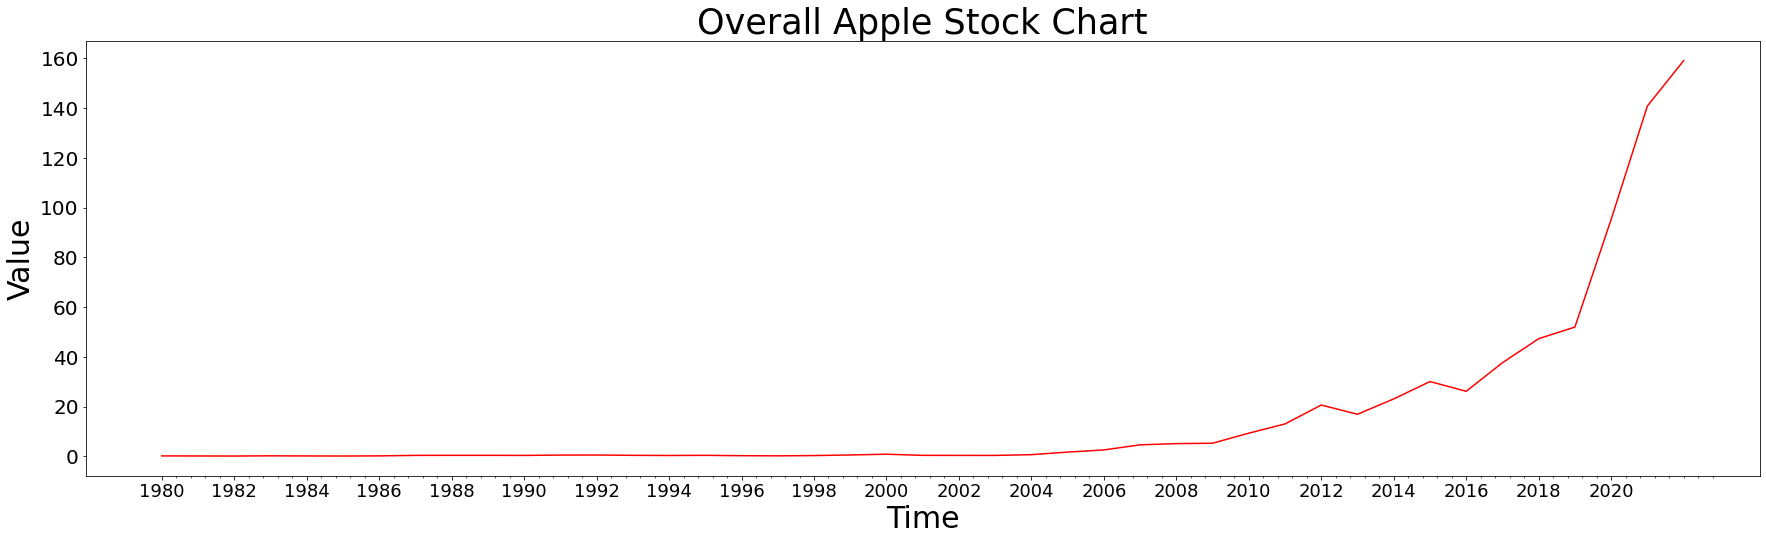

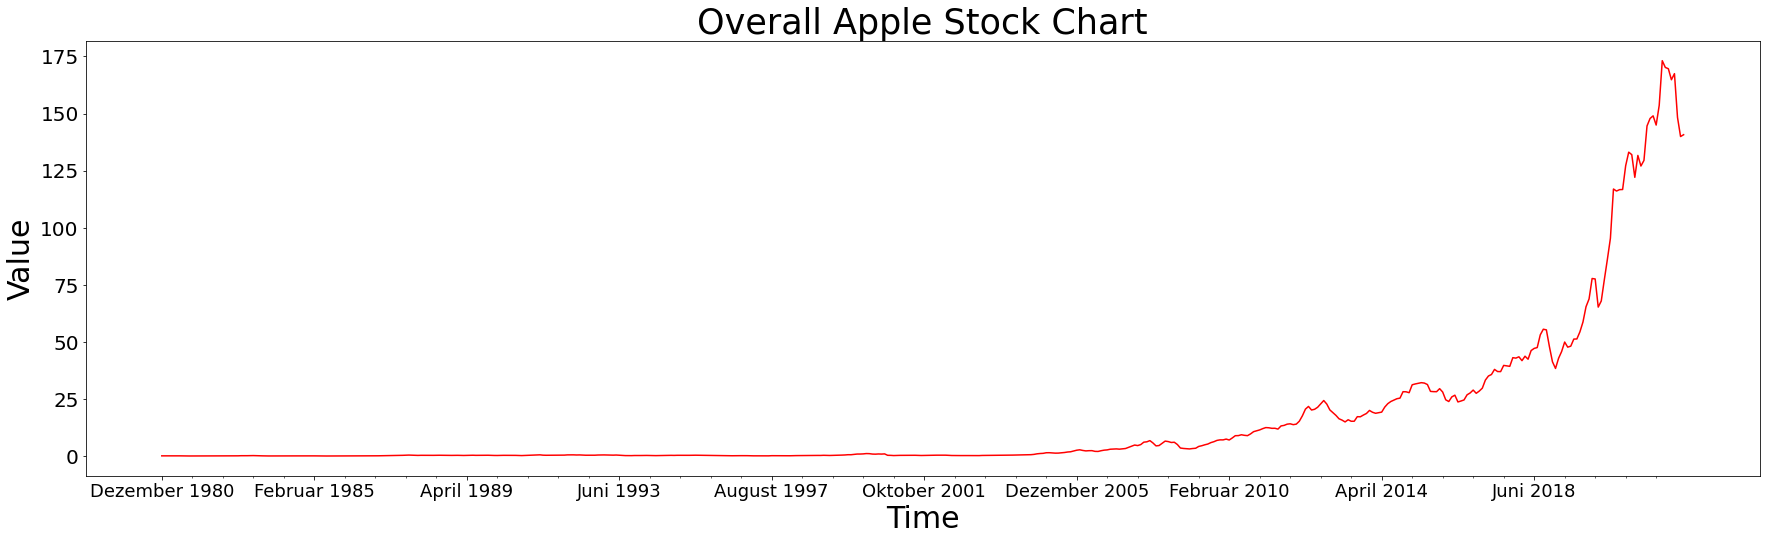

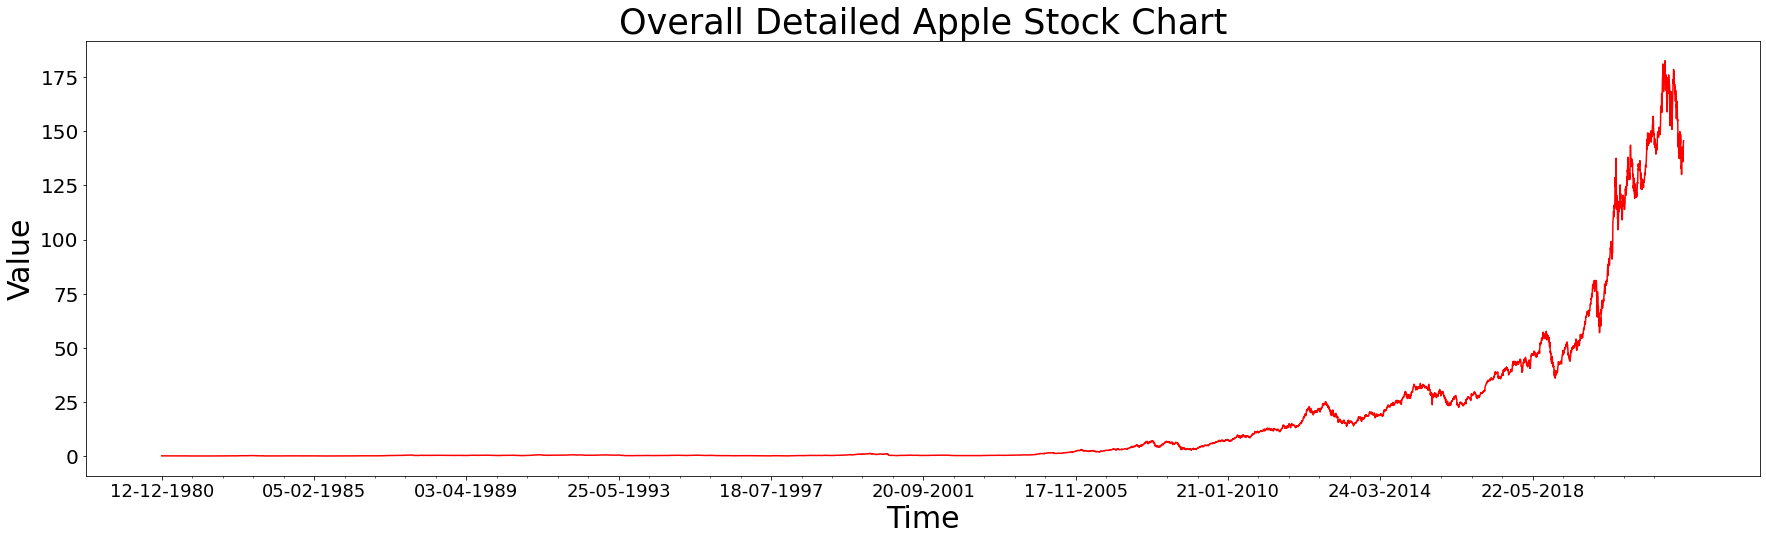

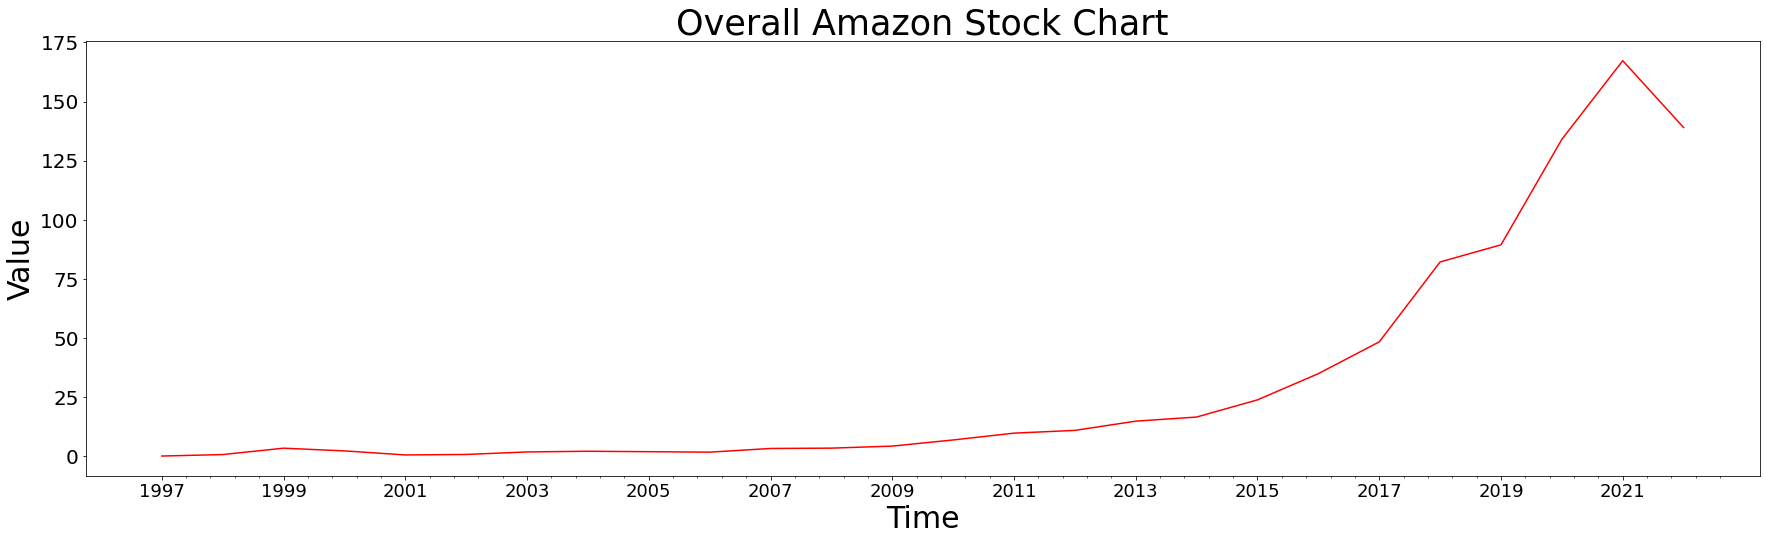

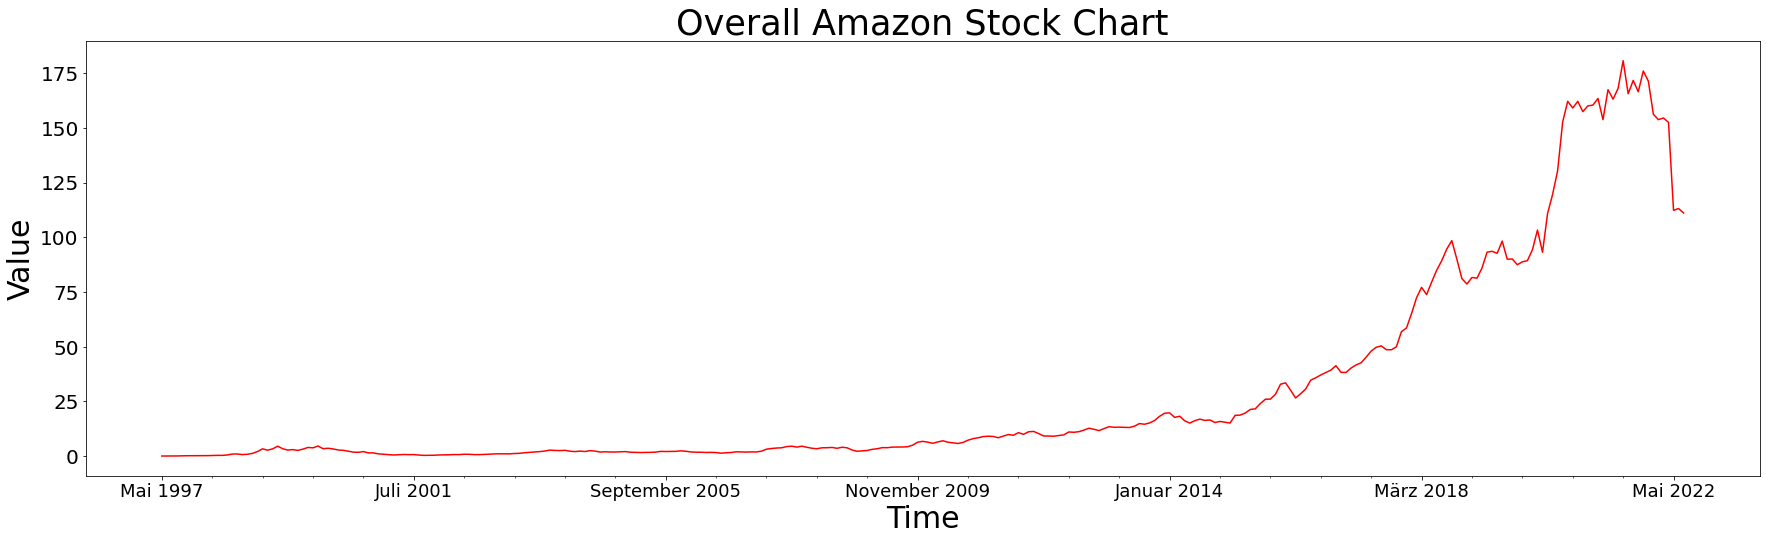

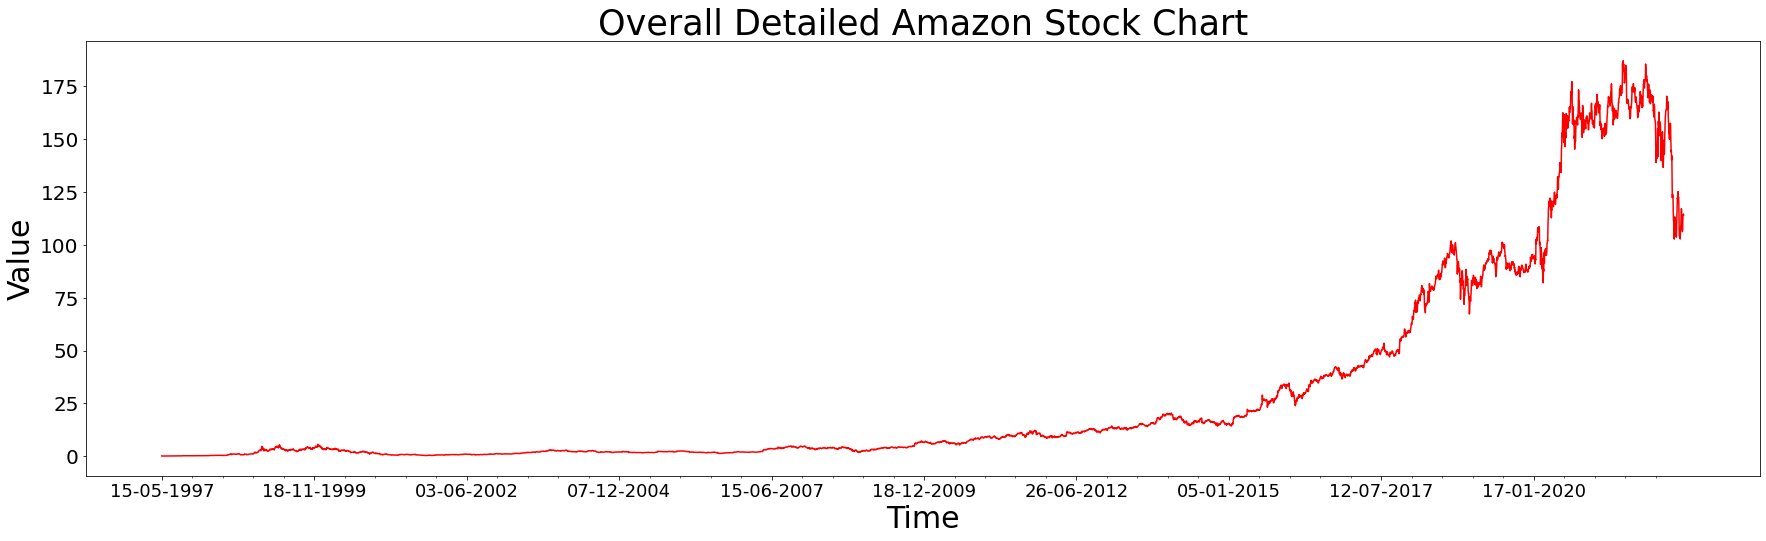

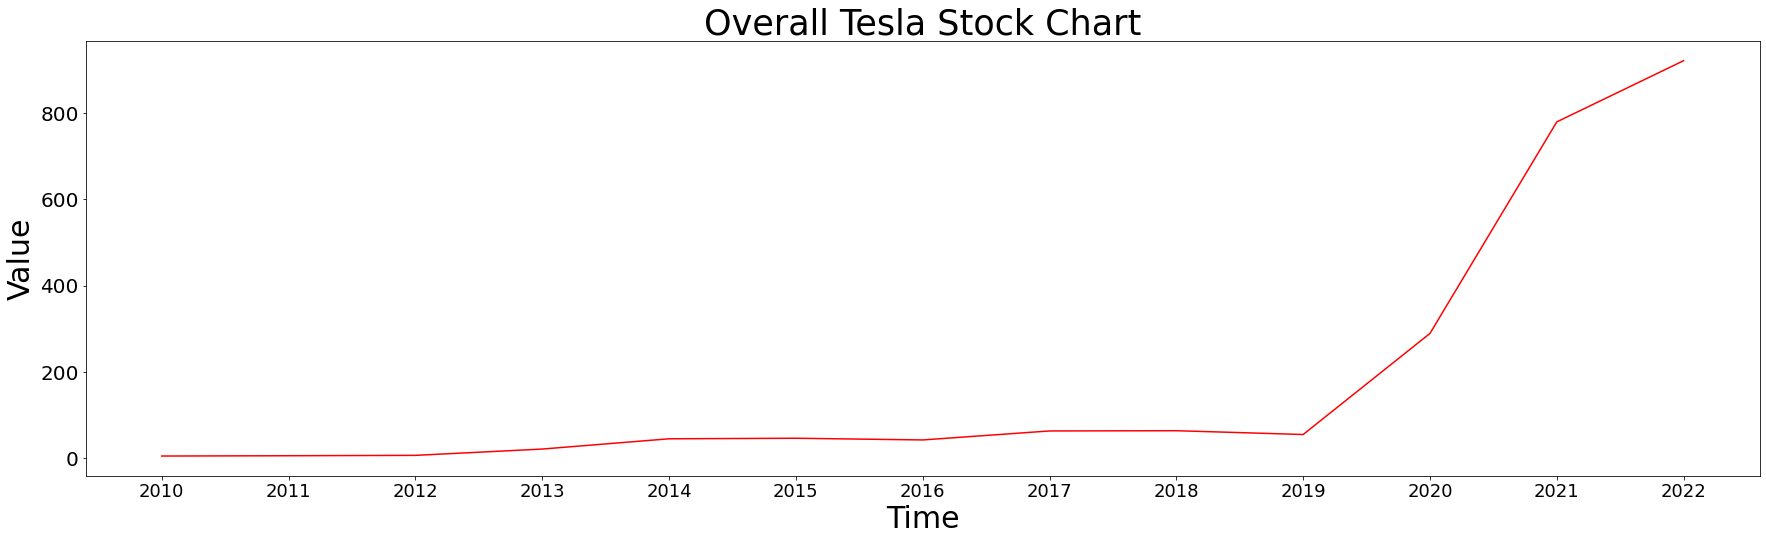

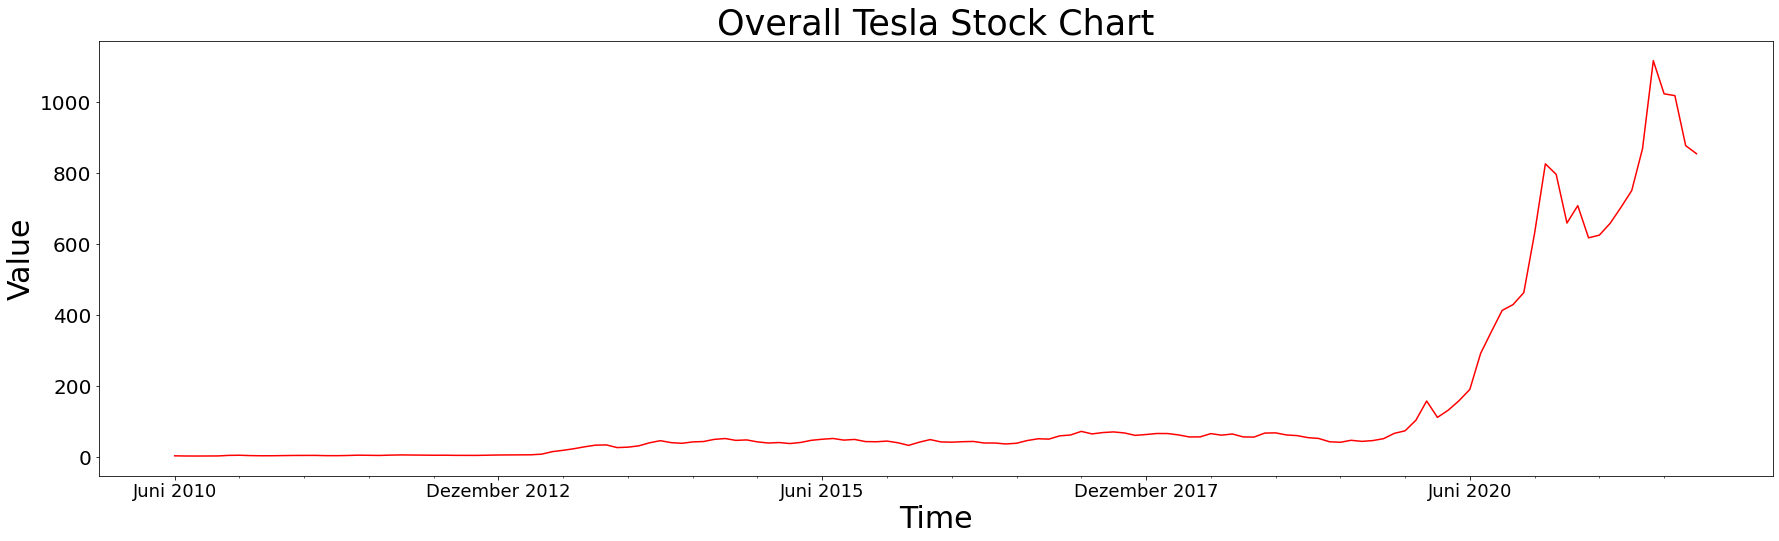

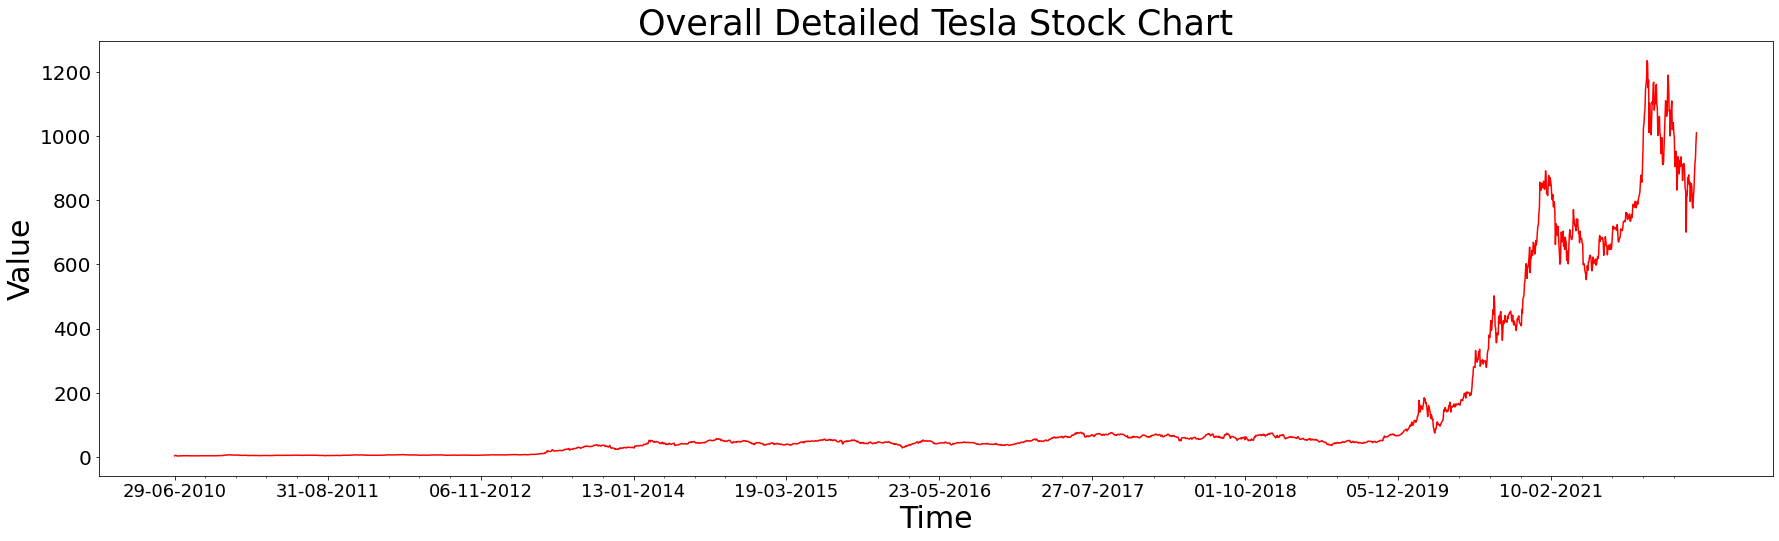

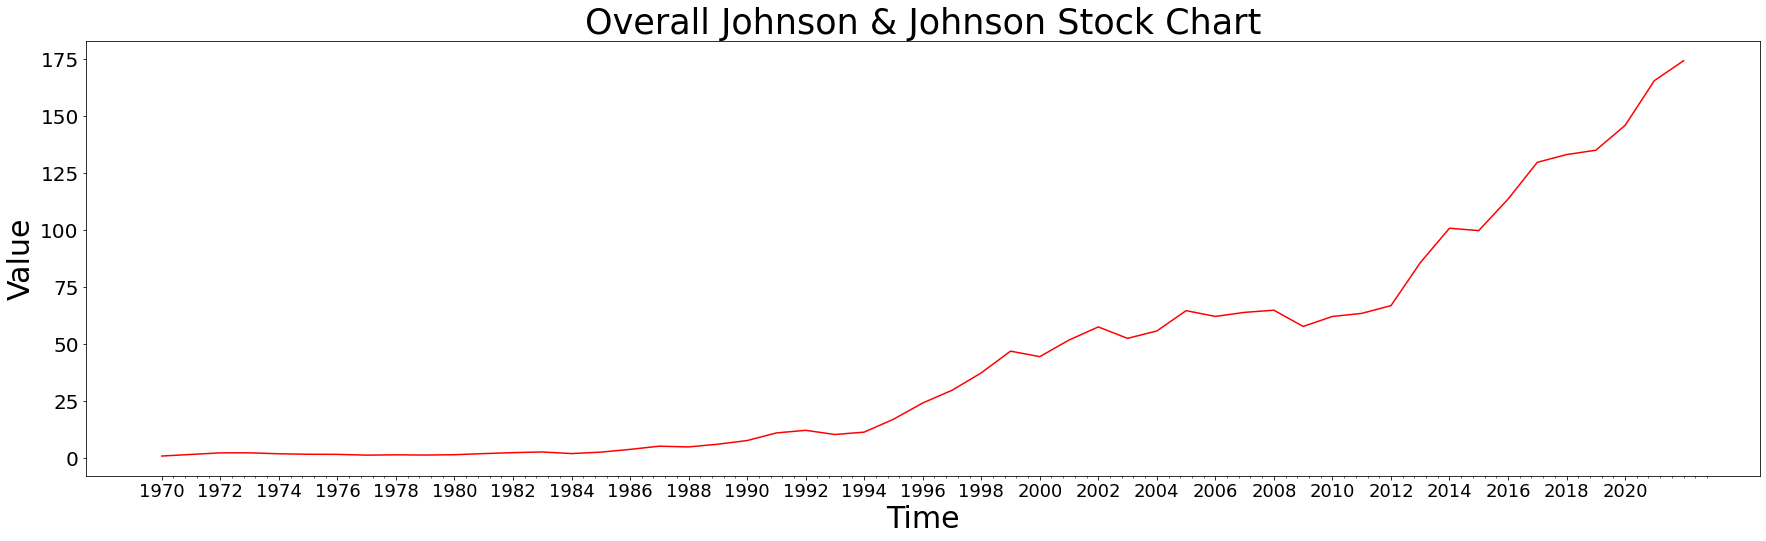

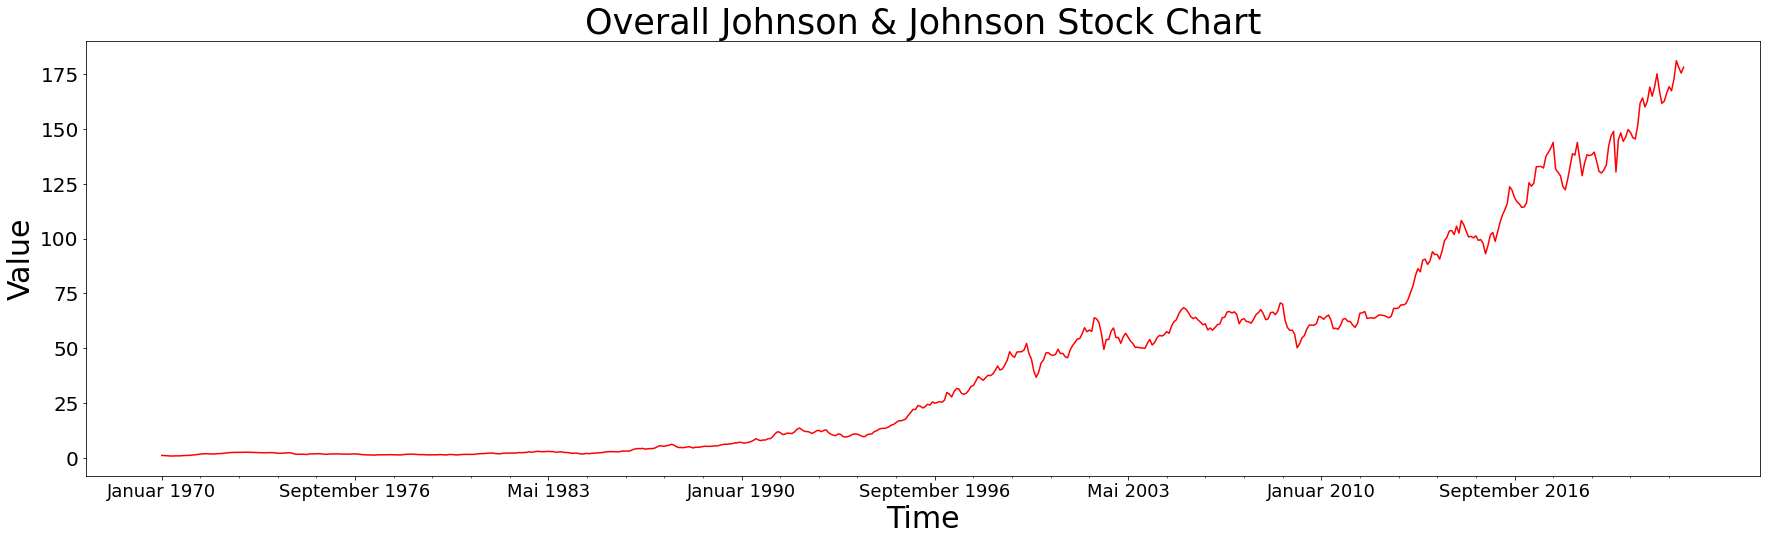

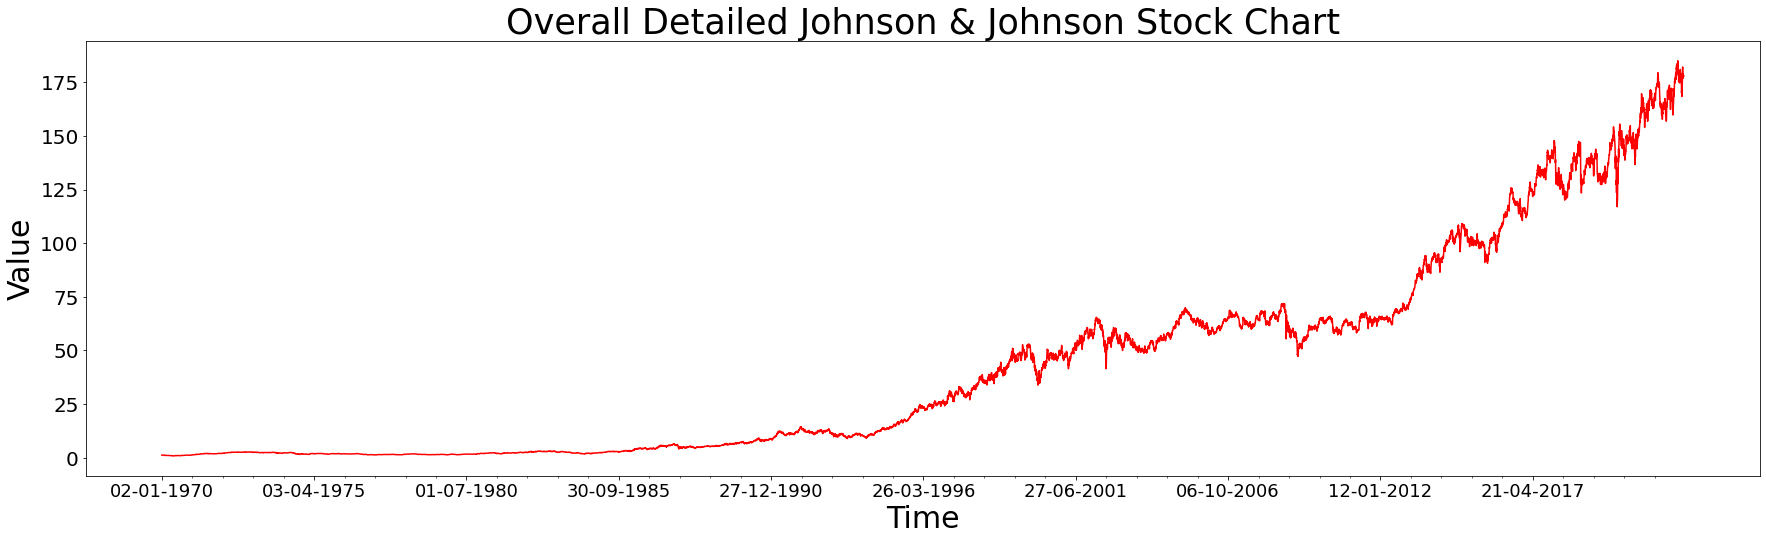

In [9]:
ticks = 10
#Overall Apple Chart

show_lines(apple_yearly_open, [], apple_years, len(apple_years), "Time","Value", "Overall Apple Stock Chart", 2)

show_lines(apple_monthly_open, [], apple_months, len(apple_months), "Time","Value", "Overall Apple Stock Chart", 50)

show_lines(apple_open, [], apple_dates, len(apple_open), "Time","Value", "Overall Detailed Apple Stock Chart", (round(len(apple_open)/ticks)+1))

#Overall Amazon Chart

show_lines(amazon_yearly_open, [], amazon_years, len(amazon_years), "Time","Value", "Overall Amazon Stock Chart", 2)

show_lines(amazon_monthly_open, [], amazon_months, len(amazon_months), "Time","Value", "Overall Amazon Stock Chart", 50)

show_lines(amazon_open, [], amazon_dates, len(amazon_open), "Time","Value", "Overall Detailed Amazon Stock Chart", (round(len(amazon_open)/ticks)+1))

#Overall Tesla Chart

show_lines(tesla_yearly_open, [], tesla_years, len(tesla_years), "Time","Value", "Overall Tesla Stock Chart", 1)

show_lines(tesla_monthly_open, [], tesla_months, len(tesla_months), "Time","Value", "Overall Tesla Stock Chart", 30)

show_lines(tesla_open, [], tesla_dates, len(tesla_open), "Time","Value", "Overall Detailed Tesla Stock Chart", (round(len(tesla_open)/ticks)+1))

#Overall Johnson & Johnson Chart


show_lines(jnj_yearly_open, [], jnj_years, len(jnj_years), "Time","Value", "Overall Johnson & Johnson Stock Chart", 2)

show_lines(jnj_monthly_open, [], jnj_months, len(jnj_months), "Time","Value", "Overall Johnson & Johnson Stock Chart", 80)

show_lines(jnj_open, [], jnj_dates, len(jnj_open), "Time","Value", "Overall Detailed Johnson & Johnson Stock Chart", (round(len(jnj_open)/ticks)+1))



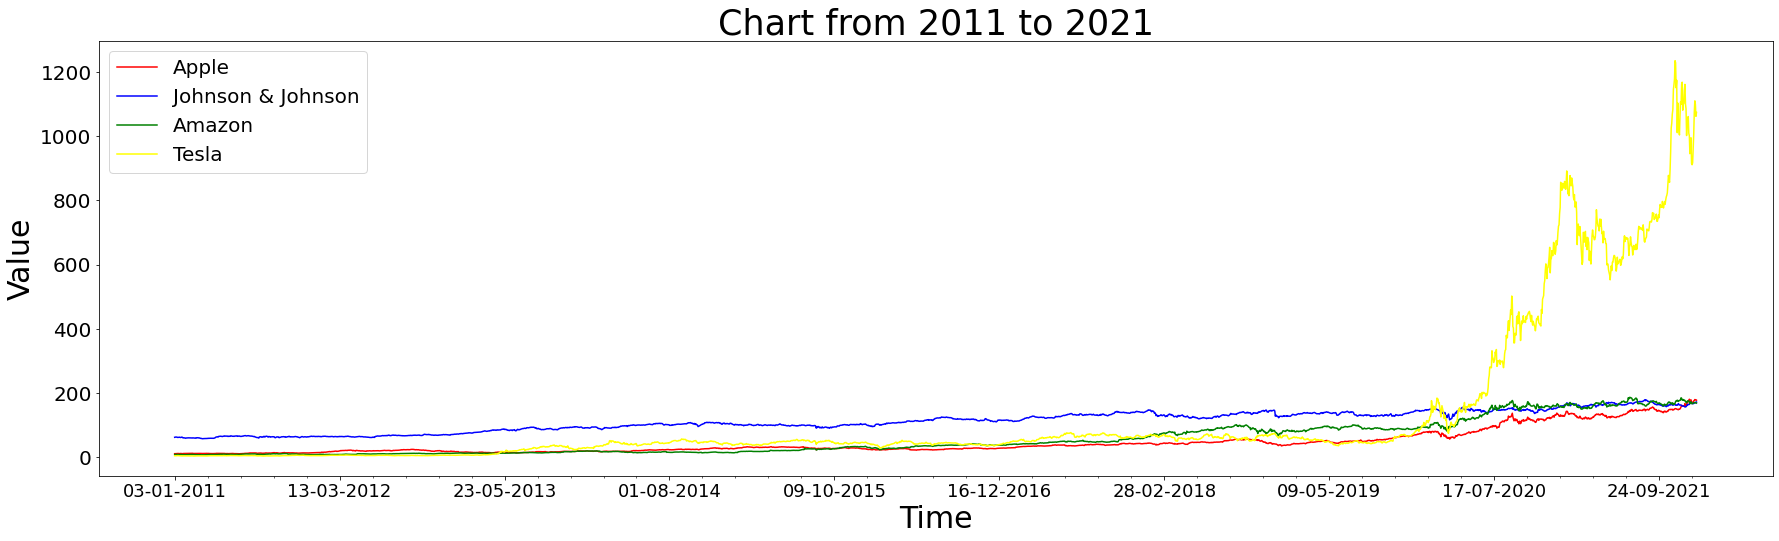

In [10]:
#Combined Charts

start_year = "2011"
end_year = "2021"
ticks = (int(end_year)-int(start_year))*30

time_list = decrease_list_from_to(start_year,end_year, jnj_dates, [])
apple_list = decrease_list_from_to(start_year,end_year, apple_dates, apple_open)
jnj_list = decrease_list_from_to(start_year,end_year, jnj_dates, jnj_open)
amazon_list = decrease_list_from_to(start_year,end_year, amazon_dates, amazon_open)
tesla_list = decrease_list_from_to(start_year,end_year, tesla_dates, tesla_open)

title = f'Chart from {start_year} to {end_year}'
overlapping_chart(time_list, apple_list, jnj_list, amazon_list, tesla_list, "Time","Value", title, ticks)

Die extremste Steigung einer Apple Aktie fand am 05-08-1997 statt


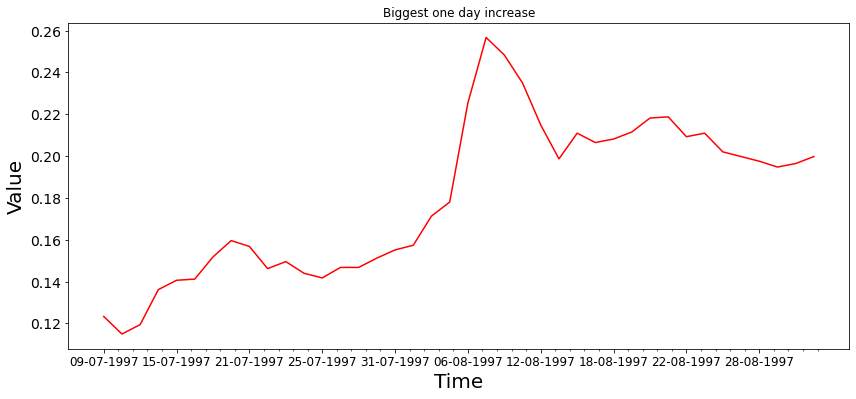

In [11]:
#Highest increase in 1 day of apple

craziest_one_day_diff = extreme_percentage_increase(apple_open, 1)
biggest_daily_increase_index = craziest_one_day_diff[0]
date = apple_dates[biggest_daily_increase_index]
print(f'Die extremste Steigung einer Apple Aktie fand am {apple_dates[biggest_daily_increase_index]} statt')
show_values_around_date(biggest_daily_increase_index, apple_open, apple_dates, 20, "Time", "Value", "Biggest one day increase", 4)


#Check was bei Amazon passiert ist mit get index by date
#Ganze Woche zeigen

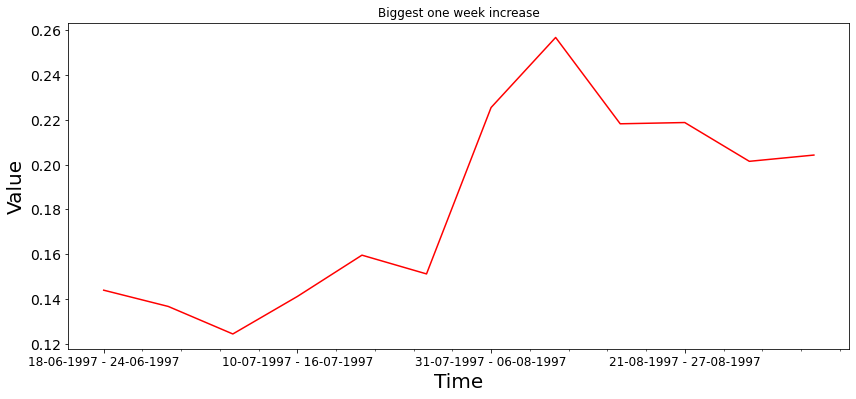

Der Tag: 26-11-1984
200
26-11-1984 - 30-11-1984


In [12]:
#Highest increase in 1 week of apple

craziest_one_week_diff = extreme_percentage_increase(apple_weekly_high, 1)
biggest_increase_index = craziest_one_week_diff[0]
show_values_around_date(biggest_increase_index, apple_weekly_high, apple_weekly_timeranges, 6, "Time", "Value", "Biggest one week increase", 3)

week = apple_weekly_timeranges[biggest_increase_index]

day_index = 1000
day = apple_dates[day_index]
print(f'Der Tag: {day}')
week_index = get_weekly_timerange_index_by_date(day, apple_weekly_timeranges)
print(week_index)
print(apple_weekly_timeranges[week_index])

**Extremfälle der einzelnen Unternehmen**


Betrachtet werden die x extremsten positiven und negativen Veränderungen eines Unternehmens in einem Tag, Woche(Monat, Jahr?)

In [13]:
#Extremfälle Apple
number_of_values_per_company = 5

#apple daily increase 
biggest_daily_increases_apple = extreme_percentage_increase(apple_open, number_of_values_per_company)
print(f'Highest daily apple increases:')
print(get_dates_by_index(apple_dates, biggest_daily_increases_apple))

#apple daily decrease 
biggest_daily_decreases_apple = extreme_percentage_decrease(apple_open, number_of_values_per_company)
print(f'\n\nHighest daily apple decreases:')
print(get_dates_by_index(apple_dates, biggest_daily_decreases_apple))

#apple weekly increase
biggest_weekly_increases_apple = extreme_percentage_increase(apple_weekly_open_average, number_of_values_per_company)
print(f'\n\nHighest weekly apple increases:')
print(get_dates_by_index(apple_weekly_timeranges, biggest_weekly_increases_apple))

#apple weekly decrease
biggest_weekly_decreases_apple = extreme_percentage_decrease(apple_weekly_open_average, number_of_values_per_company)
print(f'\n\nHighest weekly apple decreases:')
print(get_dates_by_index(apple_weekly_timeranges, biggest_weekly_decreases_apple))


Highest daily apple increases:
['Der Index 3942 ist der 17-07-1996', 'Der Index 4208 ist der 05-08-1997', 'Der Index 4312 ist der 02-01-1998', 'Der Index 5069 ist der 03-01-2001', 'Der Index 7022 ist der 10-10-2008']


Highest daily apple decreases:
['Der Index 702 ist der 22-09-1983', 'Der Index 1731 ist der 19-10-1987', 'Der Index 2623 ist der 30-04-1991', 'Der Index 3182 ist der 15-07-1993', 'Der Index 5003 ist der 28-09-2000']


Highest weekly apple increases:
['Der Index 91 ist der 01-10-1982 - 07-10-1982', 'Der Index 840 ist der 24-07-1997 - 30-07-1997', 'Der Index 841 ist der 31-07-1997 - 06-08-1997', 'Der Index 862 ist der 30-12-1997 - 06-01-1998', 'Der Index 1130 ist der 01-05-2003 - 07-05-2003']


Highest weekly apple decreases:
['Der Index 140 ist der 20-09-1983 - 26-09-1983', 'Der Index 345 ist der 09-10-1987 - 15-10-1987', 'Der Index 346 ist der 16-10-1987 - 22-10-1987', 'Der Index 636 ist der 13-07-1993 - 19-07-1993', 'Der Index 1000 ist der 25-09-2000 - 29-09-2000']


In [14]:
#Extremfälle Amazon

#amazon daily increase 
biggest_daily_increases_amazon = extreme_percentage_increase(amazon_open, number_of_values_per_company)
print(f'Highest daily amazon increases:')
print(get_dates_by_index(amazon_dates, biggest_daily_increases_amazon))

#amazon daily decrease 
biggest_daily_decreases_amazon = extreme_percentage_decrease(amazon_open, number_of_values_per_company)
print(f'\n\nHighest daily amazon decreases:')
print(get_dates_by_index(amazon_dates, biggest_daily_decreases_amazon))

#amazon weekly increase
biggest_weekly_increases_amazon = extreme_percentage_increase(amazon_weekly_open_average, number_of_values_per_company)
print(f'\n\nHighest weekly amazon increases:')
print(get_dates_by_index(amazon_weekly_timeranges, biggest_weekly_increases_amazon))

#amazon weekly decrease
biggest_weekly_decreases_amazon = extreme_percentage_decrease(amazon_weekly_open_average, number_of_values_per_company)
print(f'\n\nHighest weekly amazon decreases:')
print(get_dates_by_index(amazon_weekly_timeranges, biggest_weekly_decreases_amazon))

Highest daily amazon increases:
['Der Index 115 ist der 28-10-1997', 'Der Index 415 ist der 07-01-1999', 'Der Index 865 ist der 18-10-2000', 'Der Index 982 ist der 06-04-2001', 'Der Index 1176 ist der 18-01-2002']


Highest daily amazon decreases:
['Der Index 287 ist der 07-07-1998', 'Der Index 326 ist der 31-08-1998', 'Der Index 418 ist der 12-01-1999', 'Der Index 423 ist der 20-01-1999', 'Der Index 783 ist der 22-06-2000']


Highest weekly amazon increases:
['Der Index 6 ist der 27-06-1997 - 03-07-1997', 'Der Index 53 ist der 04-06-1998 - 10-06-1998', 'Der Index 76 ist der 16-11-1998 - 20-11-1998', 'Der Index 82 ist der 30-12-1998 - 06-01-1999', 'Der Index 196 ist der 04-04-2001 - 10-04-2001']


Highest weekly amazon decreases:
['Der Index 0 ist der 15-05-1997 - 21-05-1997', 'Der Index 64 ist der 21-08-1998 - 27-08-1998', 'Der Index 98 ist der 27-04-1999 - 03-05-1999', 'Der Index 146 ist der 06-04-2000 - 12-04-2000', 'Der Index 181 ist der 14-12-2000 - 20-12-2000']


In [15]:
#Extremfälle Tesla

#tesla daily increase 
biggest_daily_increases_tesla = extreme_percentage_increase(tesla_open, number_of_values_per_company)
print(f'Highest daily tesla increases:')
print(get_dates_by_index(tesla_dates, biggest_daily_increases_tesla))

#tesla daily decrease 
biggest_daily_decreases_tesla = extreme_percentage_decrease(tesla_open, number_of_values_per_company)
print(f'\n\nHighest daily tesla decreases:')
print(get_dates_by_index(tesla_dates, biggest_daily_decreases_tesla))

#tesla weekly increase
biggest_weekly_increases_tesla = extreme_percentage_increase(tesla_weekly_open_average, number_of_values_per_company)
print(f'\n\nHighest weekly tesla increases:')
print(get_dates_by_index(tesla_weekly_timeranges, biggest_weekly_increases_tesla))

#tesla weekly decrease
biggest_weekly_decreases_tesla = extreme_percentage_decrease(tesla_weekly_open_average, number_of_values_per_company)
print(f'\n\nHighest weekly tesla decreases:')
print(get_dates_by_index(tesla_weekly_timeranges, biggest_weekly_decreases_tesla))

Highest daily tesla increases:
['Der Index 0 ist der 29-06-2010', 'Der Index 719 ist der 08-05-2013', 'Der Index 892 ist der 14-01-2014', 'Der Index 2415 ist der 03-02-2020', 'Der Index 2525 ist der 10-07-2020']


Highest daily tesla decreases:
['Der Index 4 ist der 06-07-2010', 'Der Index 766 ist der 16-07-2013', 'Der Index 2443 ist der 13-03-2020', 'Der Index 2534 ist der 23-07-2020', 'Der Index 2934 ist der 23-02-2022']


Highest weekly tesla increases:
['Der Index 143 ist der 02-05-2013 - 08-05-2013', 'Der Index 482 ist der 27-01-2020 - 31-01-2020', 'Der Index 489 ist der 17-03-2020 - 23-03-2020', 'Der Index 492 ist der 07-04-2020 - 14-04-2020', 'Der Index 503 ist der 25-06-2020 - 01-07-2020']


Highest weekly tesla decreases:
['Der Index 0 ist der 29-06-2010 - 06-07-2010', 'Der Index 485 ist der 18-02-2020 - 24-02-2020', 'Der Index 487 ist der 03-03-2020 - 09-03-2020', 'Der Index 488 ist der 10-03-2020 - 16-03-2020', 'Der Index 512 ist der 28-08-2020 - 03-09-2020']


In [16]:
#Extremfälle Johnson & Johnson

#jnj daily increase 
biggest_daily_increases_jnj = extreme_percentage_increase(jnj_open, number_of_values_per_company)
print(f'Highest daily Johnson & Johnson increases:')
print(get_dates_by_index(jnj_dates, biggest_daily_increases_jnj))

#jnj daily decrease 
biggest_daily_decreases_jnj = extreme_percentage_decrease(jnj_open, number_of_values_per_company)
print(f'\n\nHighest daily Johnson & Johnson decreases:')
print(get_dates_by_index(jnj_dates, biggest_daily_decreases_jnj))

#jnj weekly increase
biggest_weekly_increases_jnj = extreme_percentage_increase(jnj_weekly_open_average, number_of_values_per_company)
print(f'\n\nHighest weekly Johnson & Johnson increases:')
print(get_dates_by_index(jnj_weekly_timeranges, biggest_weekly_increases_jnj))

#jnj weekly decrease
biggest_weekly_decreases_jnj = extreme_percentage_decrease(jnj_weekly_open_average, number_of_values_per_company)
print(f'\n\nHighest weekly Johnson & Johnson decreases:')
print(get_dates_by_index(jnj_weekly_timeranges, biggest_weekly_decreases_jnj))

Highest daily Johnson & Johnson increases:
['Der Index 1205 ist der 09-10-1974', 'Der Index 4109 ist der 08-04-1986', 'Der Index 4505 ist der 29-10-1987', 'Der Index 7632 ist der 15-03-2000', 'Der Index 9789 ist der 13-10-2008']


Highest daily Johnson & Johnson decreases:
['Der Index 4496 ist der 16-10-1987', 'Der Index 4499 ist der 21-10-1987', 'Der Index 8218 ist der 18-07-2002', 'Der Index 9787 ist der 09-10-2008', 'Der Index 12350 ist der 14-12-2018']


Highest weekly Johnson & Johnson increases:
['Der Index 20 ist der 26-05-1970 - 01-06-1970', 'Der Index 257 ist der 03-02-1975 - 07-02-1975', 'Der Index 821 ist der 02-04-1986 - 08-04-1986', 'Der Index 900 ist der 22-10-1987 - 28-10-1987', 'Der Index 1644 ist der 22-07-2002 - 26-07-2002']


Highest weekly Johnson & Johnson decreases:
['Der Index 643 ist der 23-09-1982 - 29-09-1982', 'Der Index 898 ist der 08-10-1987 - 14-10-1987', 'Der Index 899 ist der 15-10-1987 - 21-10-1987', 'Der Index 1527 ist der 20-03-2000 - 24-03-2000', 'De

Darstellung von einem Extrempunkt eines Unternehmens

In [17]:
#Eigenschaft des Punktes

#Tages Wert oder Wochen Wert?
daily_value = True

#biggest_daily/weekly_increase/decrease_apple/amazon/tesla/jnj
to_be_shown_value_index = 0

#bei tagen: apple/tesla/amazon/jnj_dates
#bei wochen: apple/tesla/amazon/jnj_weekly_timeranges
date = amazon_dates[to_be_shown_value_index]

values_around_date = 100

daily_ticks = 1
if(values_around_date> 15):
    daily_ticks = 8
else:
    daily_ticks = round(values_around_date/2)+1
    
weekly_ticks = 1
if(values_around_date> 10):
    weekly_ticks = 5
else:
    weekly_ticks = round(values_around_date/2)+1

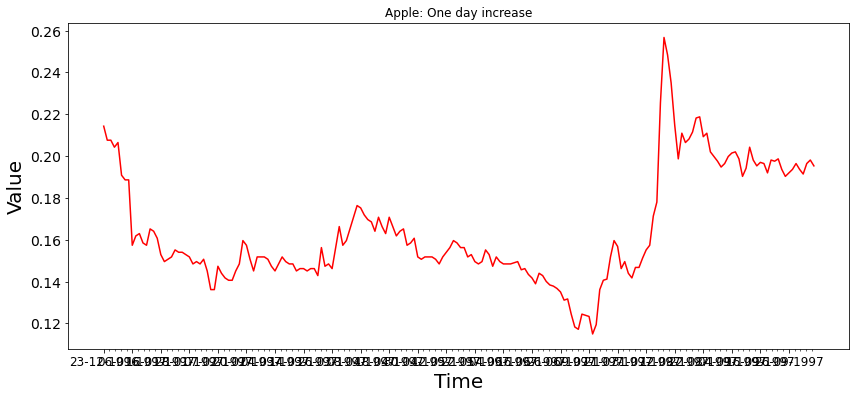





Keine Tesla Daten gefunden






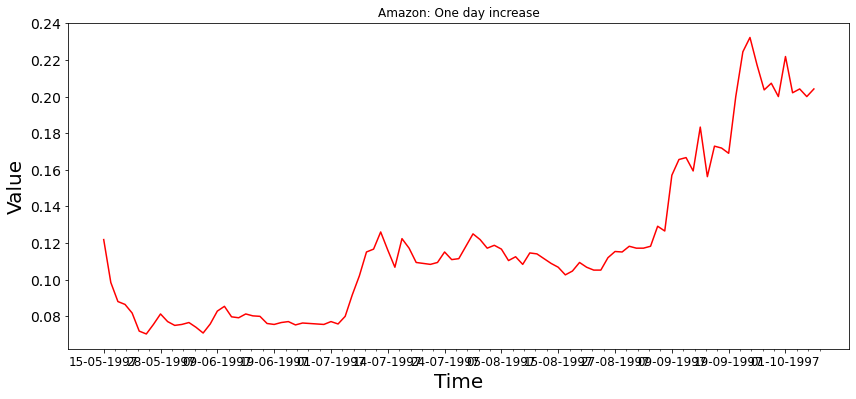

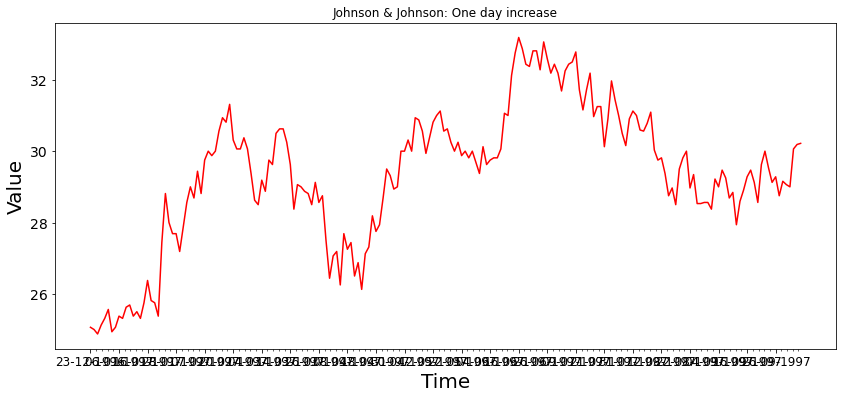

In [18]:
#show apple chart

if(daily_value):
    date_index = get_index_by_date(apple_dates, date)
    show_values_around_date(date_index, apple_open, apple_dates, values_around_date, "Time", "Value", "Apple: One day increase", daily_ticks)
    
else:

    date_index = get_weekly_timerange_index_by_date(date[:10], apple_weekly_timeranges)
    show_values_around_date(date_index, apple_weekly_open_average, apple_weekly_timeranges, values_around_date, "Time", "Value", "Apple: One week increase", weekly_ticks)
    
#show tesla chart
if(int(date[6:10]) > 2010):
    if(daily_value):
        date_index = get_index_by_date(tesla_dates, date)
        if(date_index != 0):
            show_values_around_date(date_index, tesla_open, tesla_dates, values_around_date, "Time", "Value", "Tesla: One day increase", daily_ticks)
    
    else:

        date_index = get_weekly_timerange_index_by_date(date[:10], tesla_weekly_timeranges)
        show_values_around_date(date_index, tesla_weekly_open_average, tesla_weekly_timeranges, values_around_date, "Time", "Value", "Tesla: One week increase", weekly_ticks)
else: 
    print("\n\n\n\nKeine Tesla Daten gefunden\n\n\n\n")
    
    
#show amazon chart
if(daily_value):
    date_index = get_index_by_date(amazon_dates, date)
    show_values_around_date(date_index, amazon_open, amazon_dates, values_around_date, "Time", "Value", "Amazon: One day increase", daily_ticks)
    
else:

    date_index = get_weekly_timerange_index_by_date(date[:10], amazon_weekly_timeranges)
    show_values_around_date(date_index, amazon_weekly_open_average, amazon_weekly_timeranges, values_around_date, "Time", "Value", "Amazon: One week increase", weekly_ticks)
    
#show jnj chart
if(daily_value):
    date_index = get_index_by_date(jnj_dates, date)
    show_values_around_date(date_index, jnj_open, jnj_dates, values_around_date, "Time", "Value", "Johnson & Johnson: One day increase", daily_ticks)
    
else:

    date_index = get_weekly_timerange_index_by_date(date[:10], jnj_weekly_timeranges)
    show_values_around_date(date_index, jnj_weekly_open_average, jnj_weekly_timeranges, values_around_date, "Time", "Value", "Johnson & Johnson: One week increase", weekly_ticks)
    
    

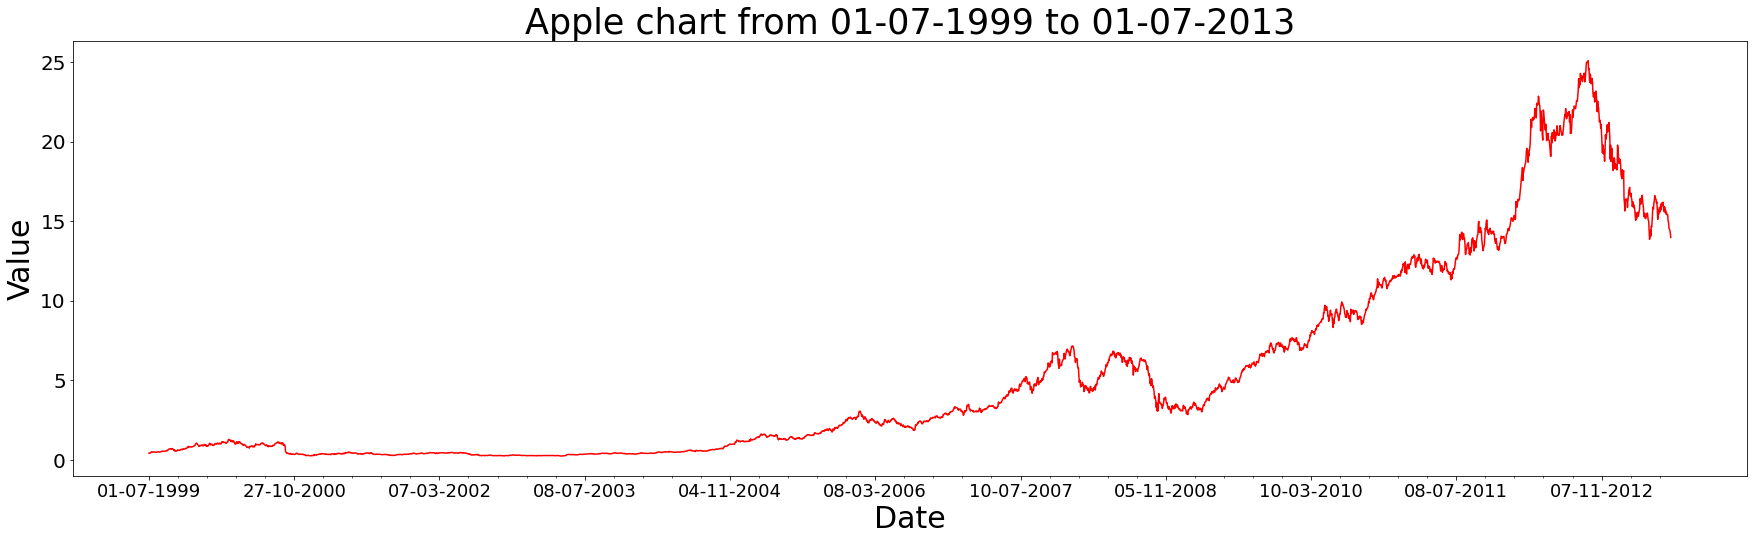

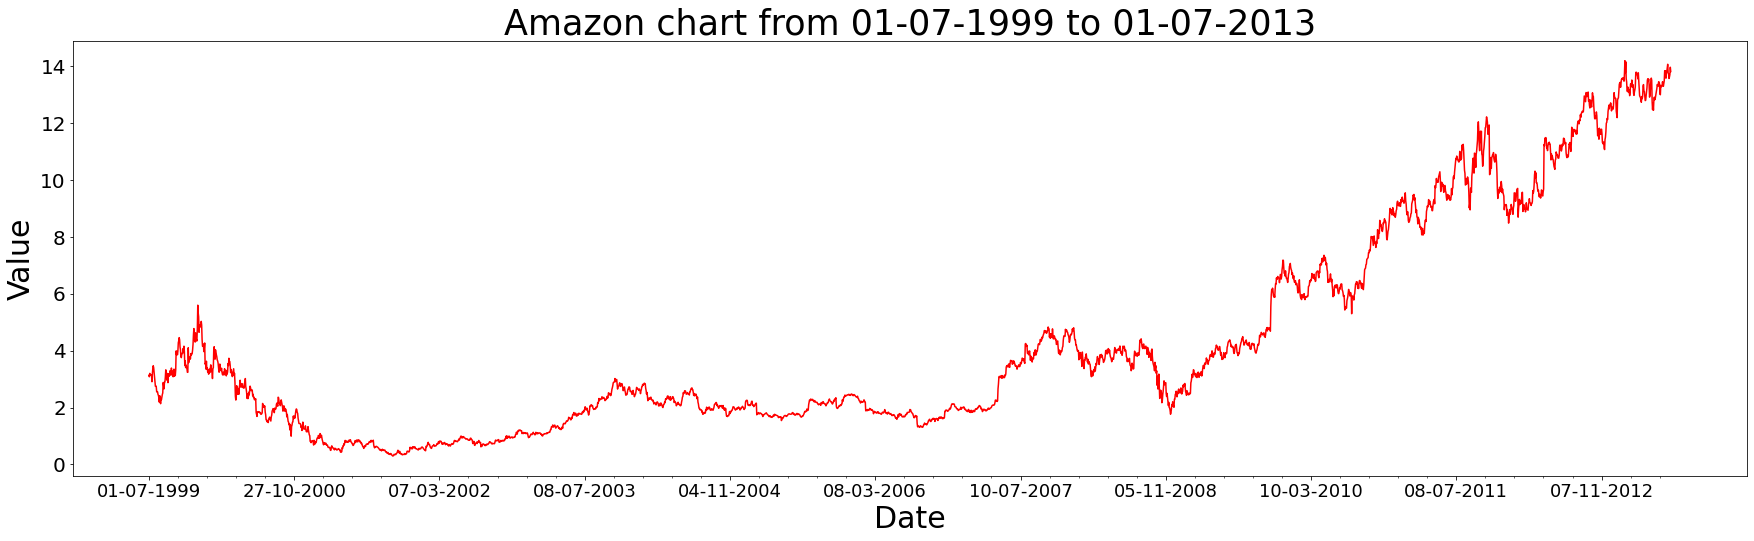

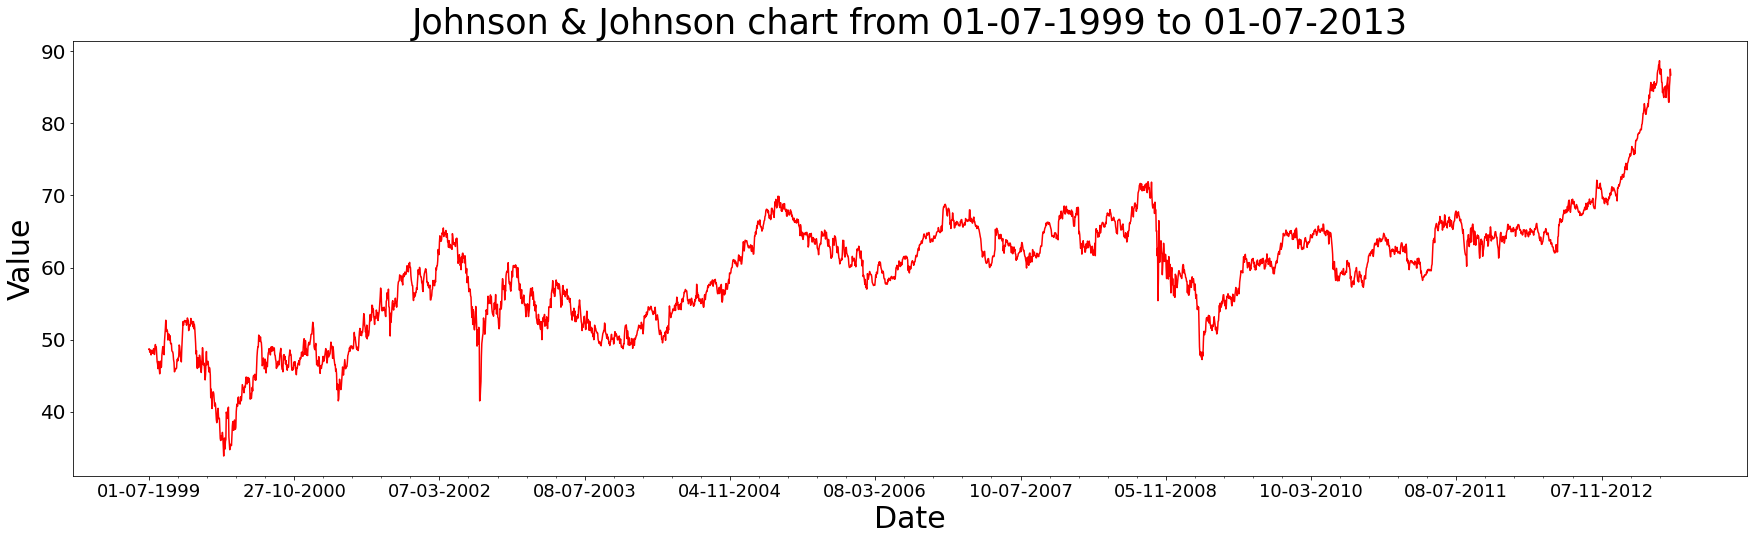

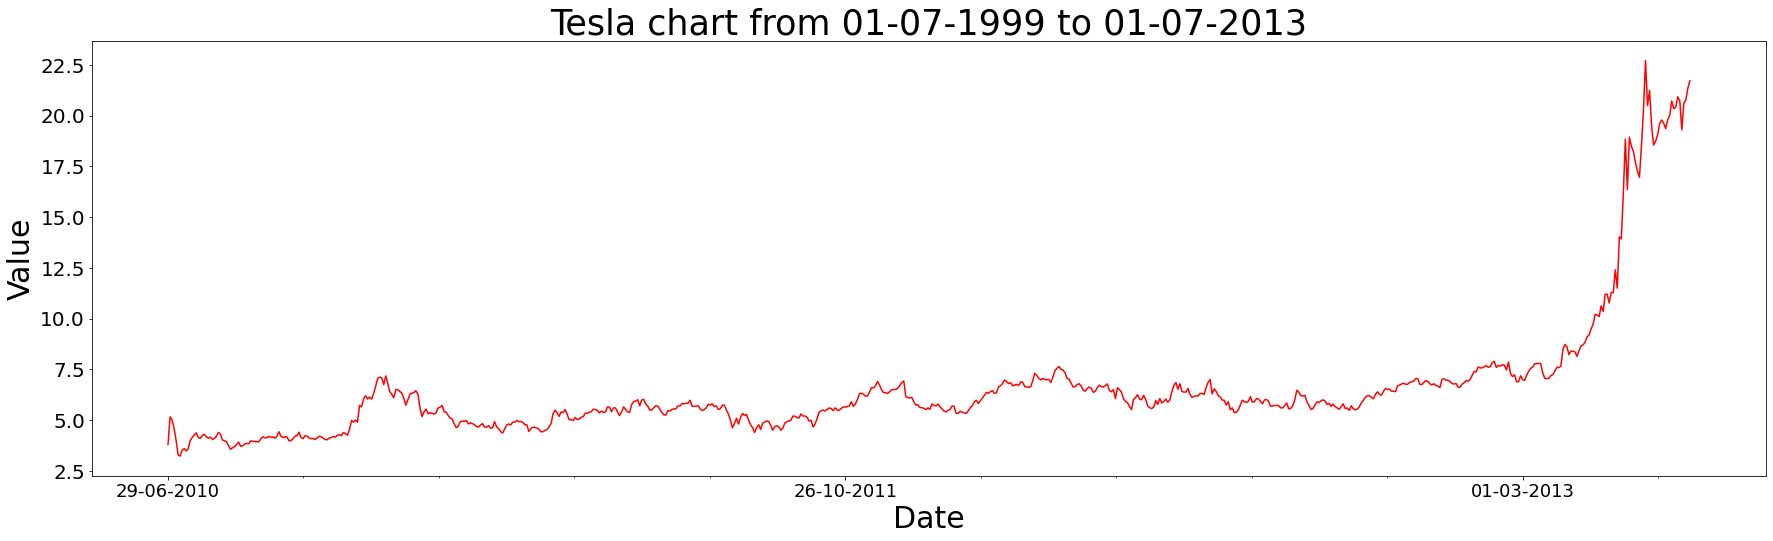

In [19]:
#Datum: Tag, Monat, Jahr (xx-xx-xxxx)
start_date = "01-07-1999"
end_date = "01-07-2013"
tick_distance = (int(end_date[6:10])-int(start_date[6:10]))*24


title_apple = f'Apple chart from {start_date} to {end_date}'
show_timerange(start_date, end_date, apple_dates, apple_open, "Date", "Value", title_apple, tick_distance)


title_amazon = f'Amazon chart from {start_date} to {end_date}'
show_timerange(start_date, end_date, amazon_dates, amazon_open, "Date", "Value", title_amazon, tick_distance)


title_jnj = f'Johnson & Johnson chart from {start_date} to {end_date}'
show_timerange(start_date, end_date, jnj_dates, jnj_open, "Date", "Value", title_jnj, tick_distance)


title_tesla = f'Tesla chart from {start_date} to {end_date}'
show_timerange(start_date, end_date, tesla_dates, tesla_open, "Date", "Value", title_tesla, tick_distance)

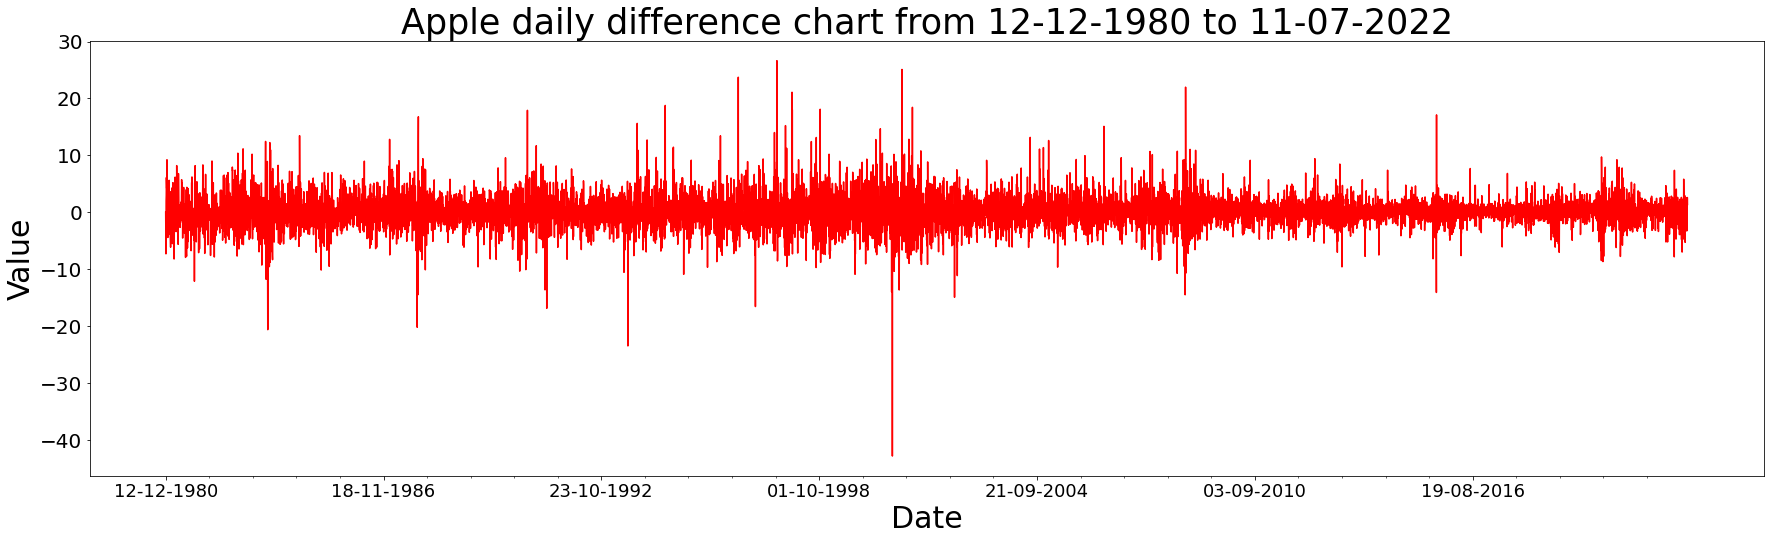

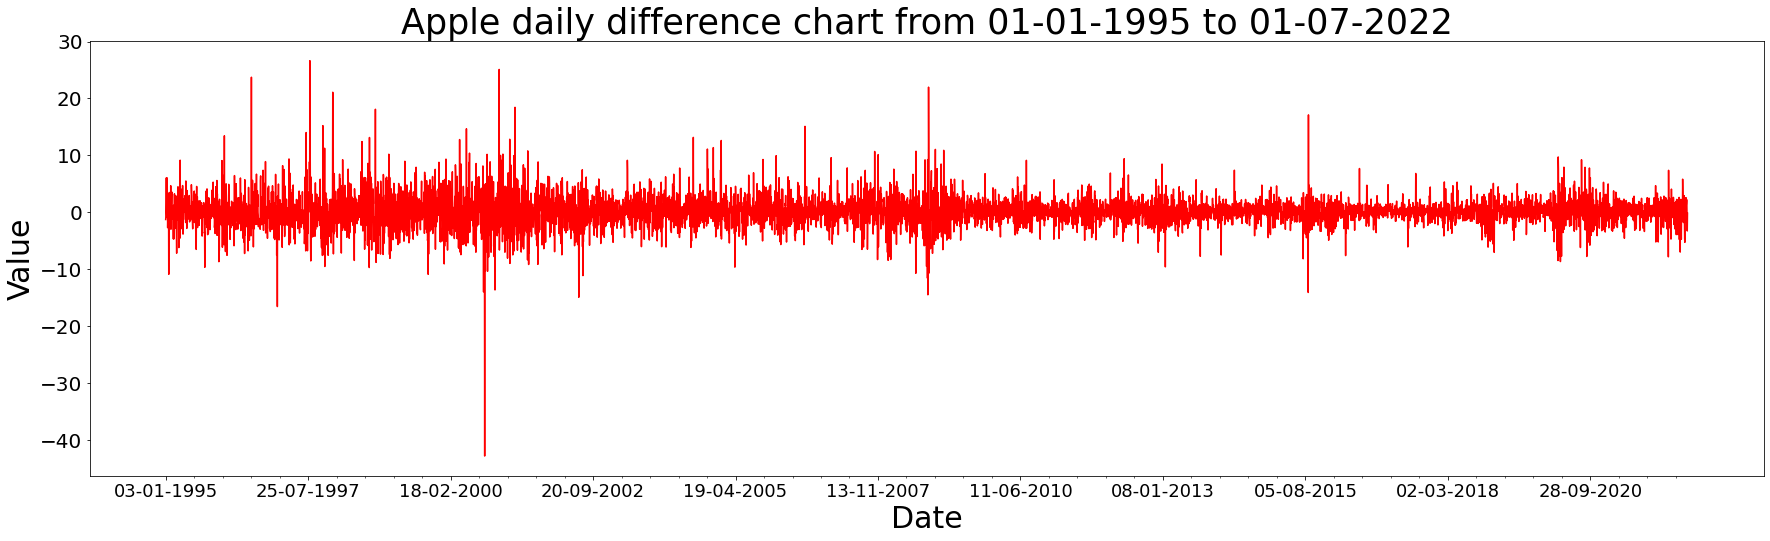

Prozentuale Unterschiede mit mindestens 5 zum Vortag:
Prozentualer Unterschied von -7.31 am 16-12-1980
Prozentualer Unterschied von 6.1 am 19-12-1980
Prozentualer Unterschied von 5.26 am 24-12-1980
Prozentualer Unterschied von 9.23 am 26-12-1980
Prozentualer Unterschied von 5.62 am 19-01-1981
Prozentualer Unterschied von -5.0 am 30-01-1981
Prozentualer Unterschied von -6.14 am 02-02-1981
Prozentualer Unterschied von -5.51 am 19-02-1981
Prozentualer Unterschied von -5.34 am 20-02-1981
Prozentualer Unterschied von 5.21 am 25-02-1981
Prozentualer Unterschied von -8.21 am 09-03-1981
Prozentualer Unterschied von 6.19 am 18-03-1981
Prozentualer Unterschied von 8.21 am 02-04-1981
Prozentualer Unterschied von -5.63 am 16-04-1981
Prozentualer Unterschied von 6.8 am 21-04-1981
Prozentualer Unterschied von 5.73 am 21-05-1981
Prozentualer Unterschied von 5.18 am 27-05-1981
Prozentualer Unterschied von -7.93 am 30-06-1981
Prozentualer Unterschied von -7.18 am 09-07-1981
Prozentualer Unterschied von

In [20]:
#Charts of Apple

apple_waggle_list = get_daily_diff_list(apple_open)
title_apple = f'Apple daily difference chart from {apple_dates[0]} to {apple_dates[len(apple_dates)-1]}'
show_timerange(apple_dates[0], apple_dates[len(apple_dates)-1], apple_dates, apple_waggle_list, "Date", "Value", title_apple, 1500)

start_date = "01-01-1995"
end_date = "01-07-2022"
tick_distance = (int(end_date[6:10])-int(start_date[6:10]))*24

title_apple = f'Apple daily difference chart from {start_date} to {end_date}'
show_timerange(start_date, end_date, apple_dates, apple_waggle_list, "Date", "Value", title_apple, tick_distance)

#daily
min_percentage_diff = 5
print_waggle_values(apple_waggle_list, apple_dates, min_percentage_diff)

print_average_diff_per_year(apple_waggle_list, apple_dates, start_date[6:10], end_date[6:10])

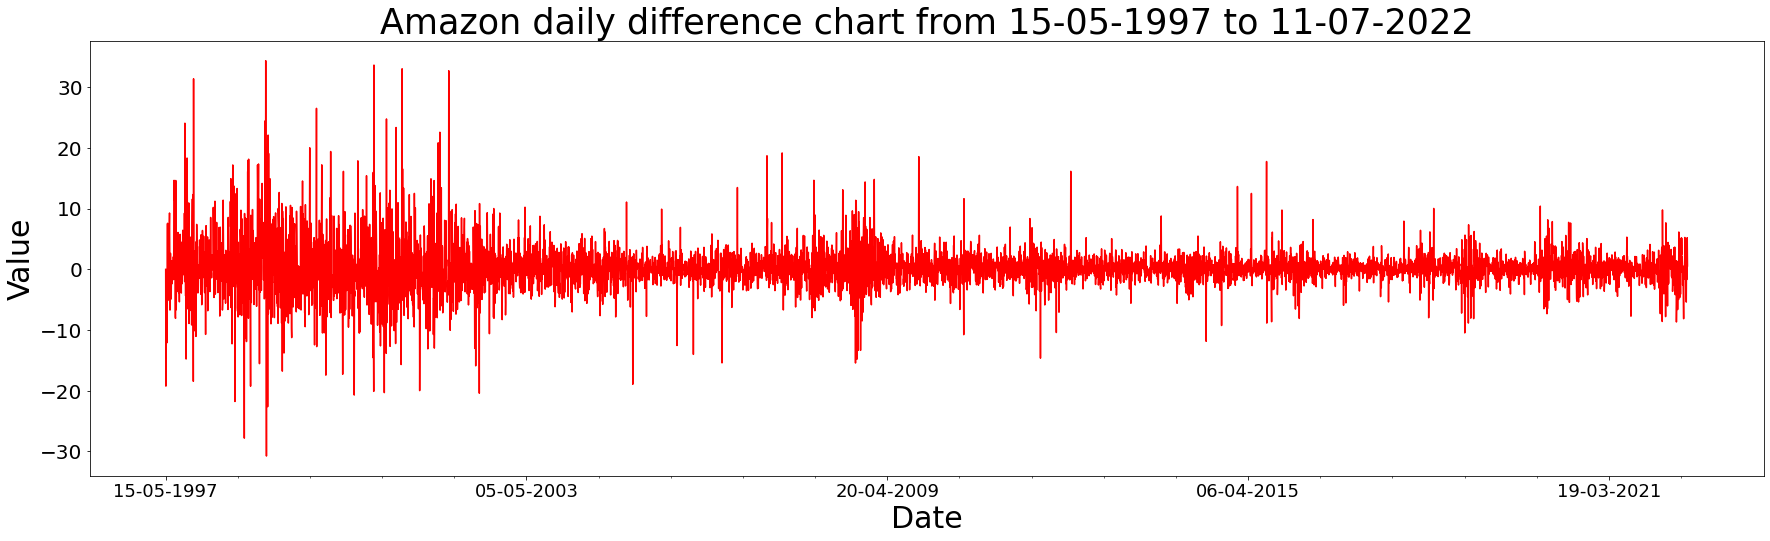

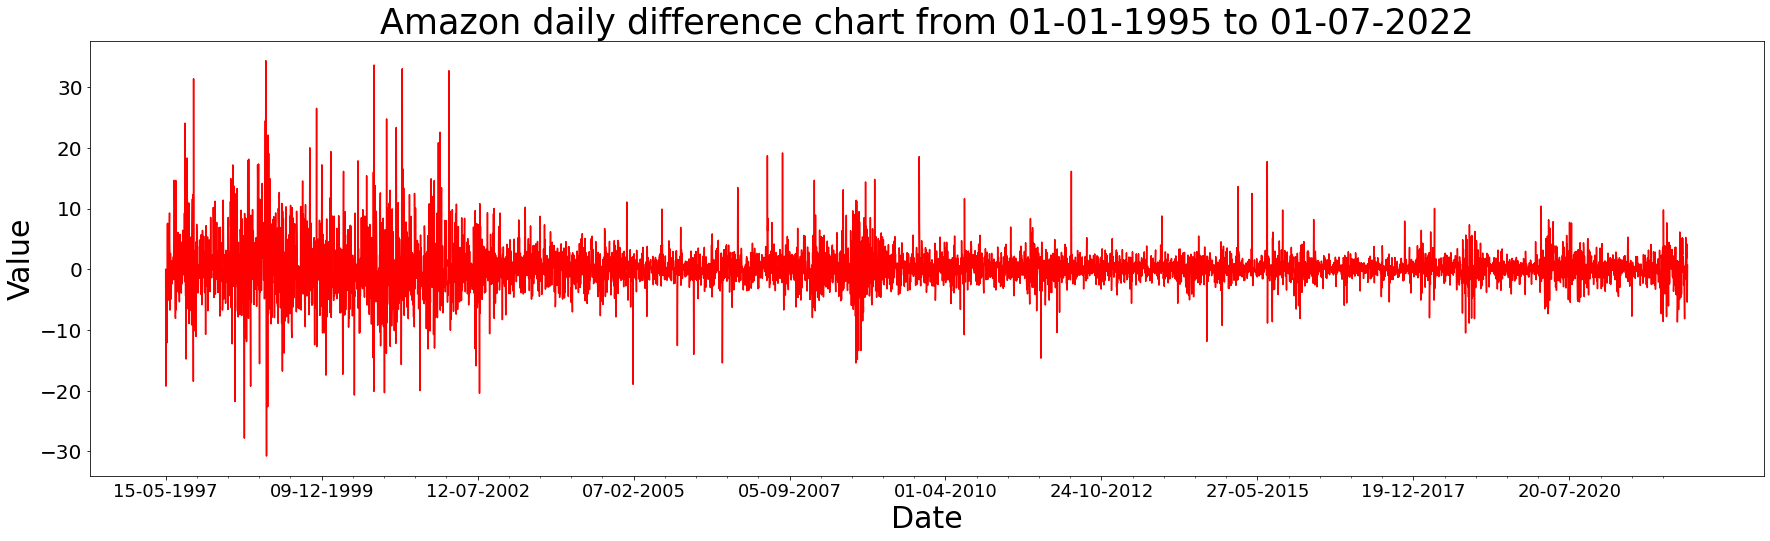

Prozentuale Unterschiede mit mindestens 5 zum Vortag:
Prozentualer Unterschied von -19.23 am 16-05-1997
Prozentualer Unterschied von -10.58 am 19-05-1997
Prozentualer Unterschied von -5.42 am 21-05-1997
Prozentualer Unterschied von -12.1 am 22-05-1997
Prozentualer Unterschied von 7.41 am 27-05-1997
Prozentualer Unterschied von 7.59 am 28-05-1997
Prozentualer Unterschied von -5.13 am 29-05-1997
Prozentualer Unterschied von 6.99 am 06-06-1997
Prozentualer Unterschied von 9.28 am 09-06-1997
Prozentualer Unterschied von -6.71 am 11-06-1997
Prozentualer Unterschied von 5.5 am 03-07-1997
Prozentualer Unterschied von 14.66 am 07-07-1997
Prozentualer Unterschied von 11.36 am 08-07-1997
Prozentualer Unterschied von 12.76 am 09-07-1997
Prozentualer Unterschied von 8.04 am 11-07-1997
Prozentualer Unterschied von -7.85 am 14-07-1997
Prozentualer Unterschied von -8.07 am 15-07-1997
Prozentualer Unterschied von 14.63 am 16-07-1997
Prozentualer Unterschied von -6.67 am 18-07-1997
Prozentualer Untersc

In [21]:
#Charts of Amazon

amazon_waggle_list = get_daily_diff_list(amazon_open)
title_amazon = f'Amazon daily difference chart from {amazon_dates[0]} to {amazon_dates[len(amazon_dates)-1]}'
show_timerange(amazon_dates[0], amazon_dates[len(amazon_dates)-1], amazon_dates, amazon_waggle_list, "Date", "Value", title_amazon, 1500)

start_date = "01-01-1995"
end_date = "01-07-2022"
tick_distance = (int(end_date[6:10])-int(start_date[6:10]))*24

title_amazon = f'Amazon daily difference chart from {start_date} to {end_date}'
show_timerange(start_date, end_date, amazon_dates, amazon_waggle_list, "Date", "Value", title_amazon, tick_distance)

#daily
min_percentage_diff = 5
print_waggle_values(amazon_waggle_list, amazon_dates, min_percentage_diff)

print_average_diff_per_year(amazon_waggle_list, amazon_dates, start_date[6:10], end_date[6:10])

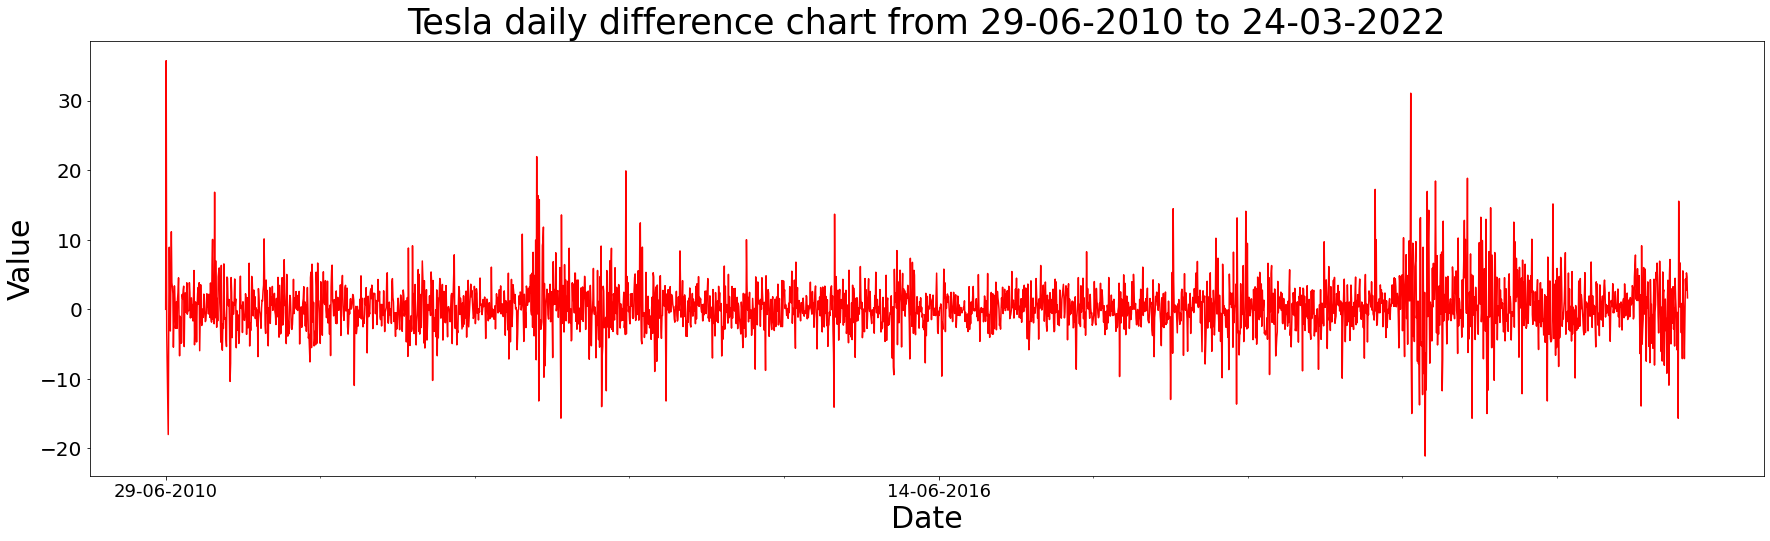

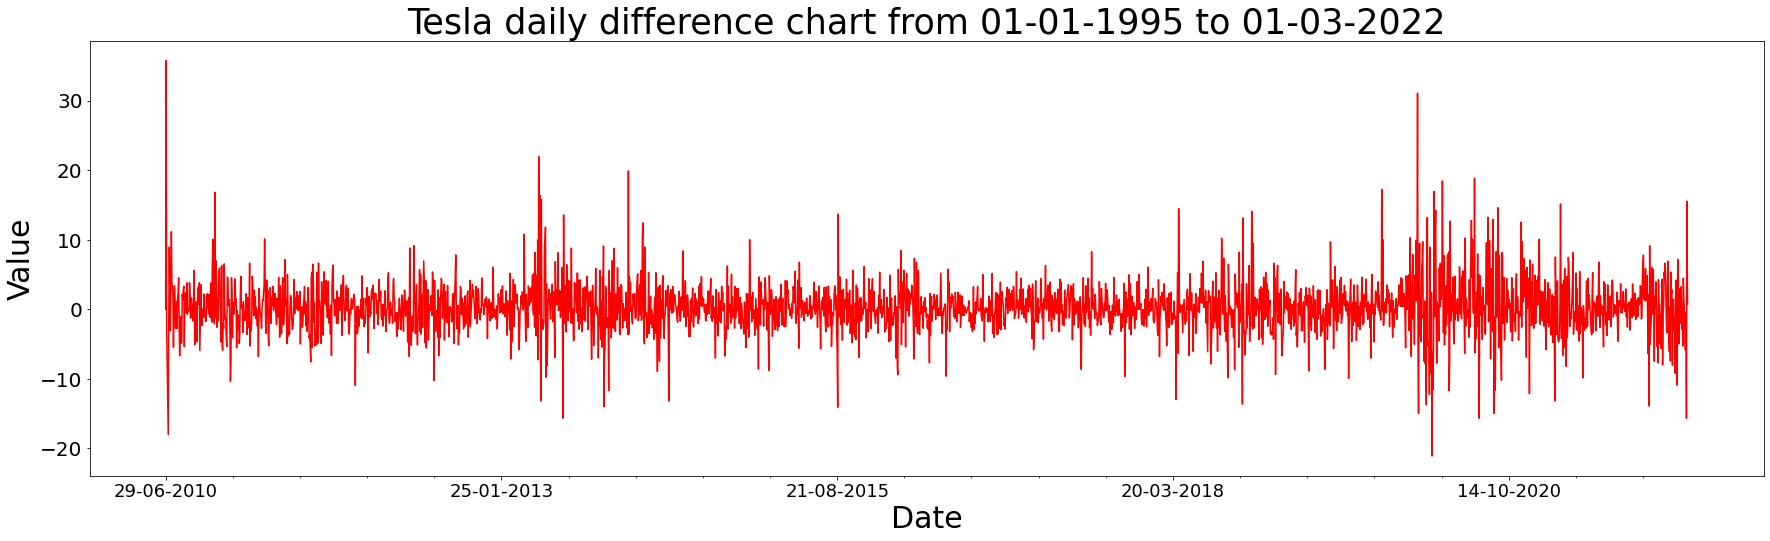

Prozentuale Unterschiede mit mindestens 20 zum Vortag:
Prozentualer Unterschied von 35.74 am 30-06-2010
Prozentualer Unterschied von 21.95 am 09-05-2013
Prozentualer Unterschied von 31.06 am 04-02-2020
Prozentualer Unterschied von -21.09 am 16-03-2020

Entwicklung von 1995 bis 2022

Werte für das Jahr: 2010
Tage mit Anstieg: 67
Durchschnittlicher Anstieg pro Tag: 3.63
Tage mit Abfall: 63
Durchschnittlicher Abfall pro Tag: 3.05

Werte für das Jahr: 2011
Tage mit Anstieg: 134
Durchschnittlicher Anstieg pro Tag: 2.15
Tage mit Abfall: 118
Durchschnittlicher Abfall pro Tag: 2.3

Werte für das Jahr: 2012
Tage mit Anstieg: 129
Durchschnittlicher Anstieg pro Tag: 2.12
Tage mit Abfall: 121
Durchschnittlicher Abfall pro Tag: 2.06

Werte für das Jahr: 2013
Tage mit Anstieg: 144
Durchschnittlicher Anstieg pro Tag: 3.34
Tage mit Abfall: 108
Durchschnittlicher Abfall pro Tag: 2.8

Werte für das Jahr: 2014
Tage mit Anstieg: 127
Durchschnittlicher Anstieg pro Tag: 2.43
Tage mit Abfall: 125
Durchschnit

In [22]:
#Charts of Tesla

tesla_waggle_list = get_daily_diff_list(tesla_open)
title_tesla = f'Tesla daily difference chart from {tesla_dates[0]} to {tesla_dates[len(tesla_dates)-1]}'
show_timerange(tesla_dates[0], tesla_dates[len(tesla_dates)-1], tesla_dates, tesla_waggle_list, "Date", "Value", title_tesla, 1500)

start_date = "01-01-1995"
end_date = "01-03-2022"
tick_distance = (int(end_date[6:10])-int(start_date[6:10]))*24

title_tesla = f'Tesla daily difference chart from {start_date} to {end_date}'
show_timerange(start_date, end_date, tesla_dates, tesla_waggle_list, "Date", "Value", title_tesla, tick_distance)

#daily
min_percentage_diff = 20
print_waggle_values(tesla_waggle_list, tesla_dates, min_percentage_diff)

print_average_diff_per_year(tesla_waggle_list, tesla_dates, start_date[6:10], end_date[6:10])

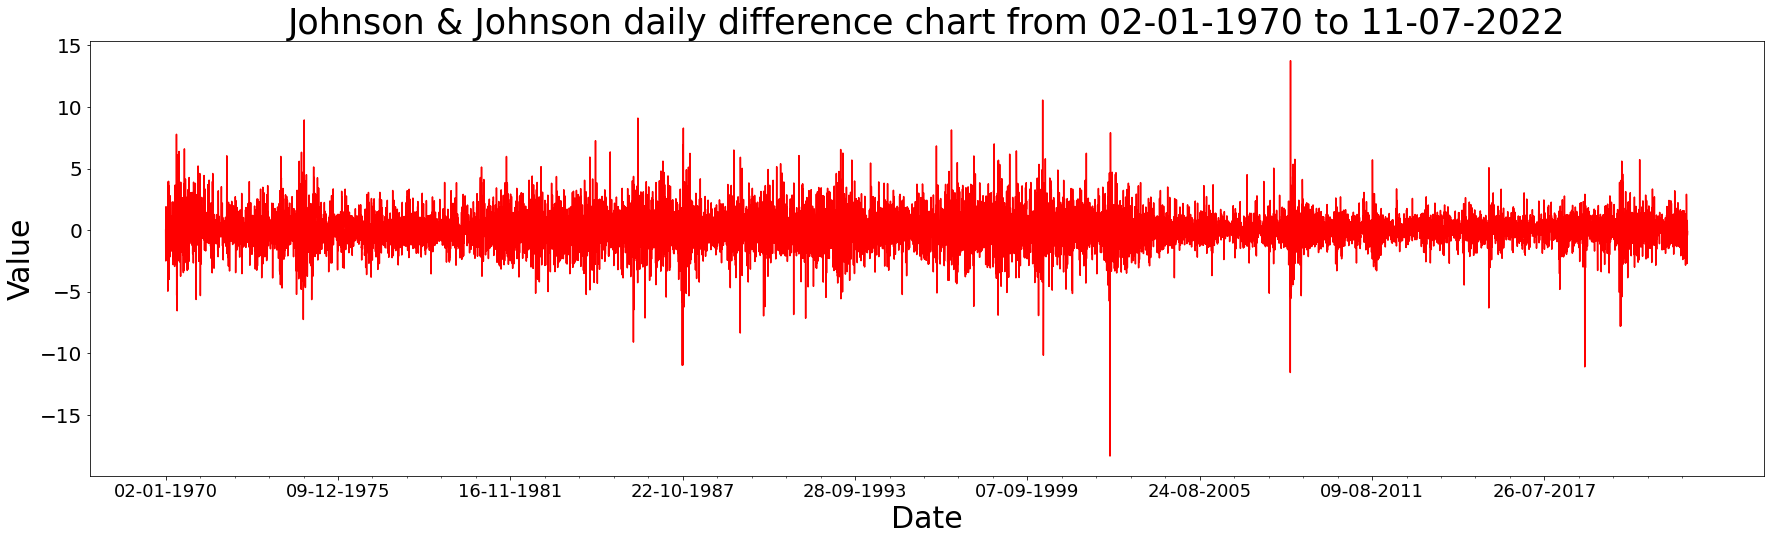

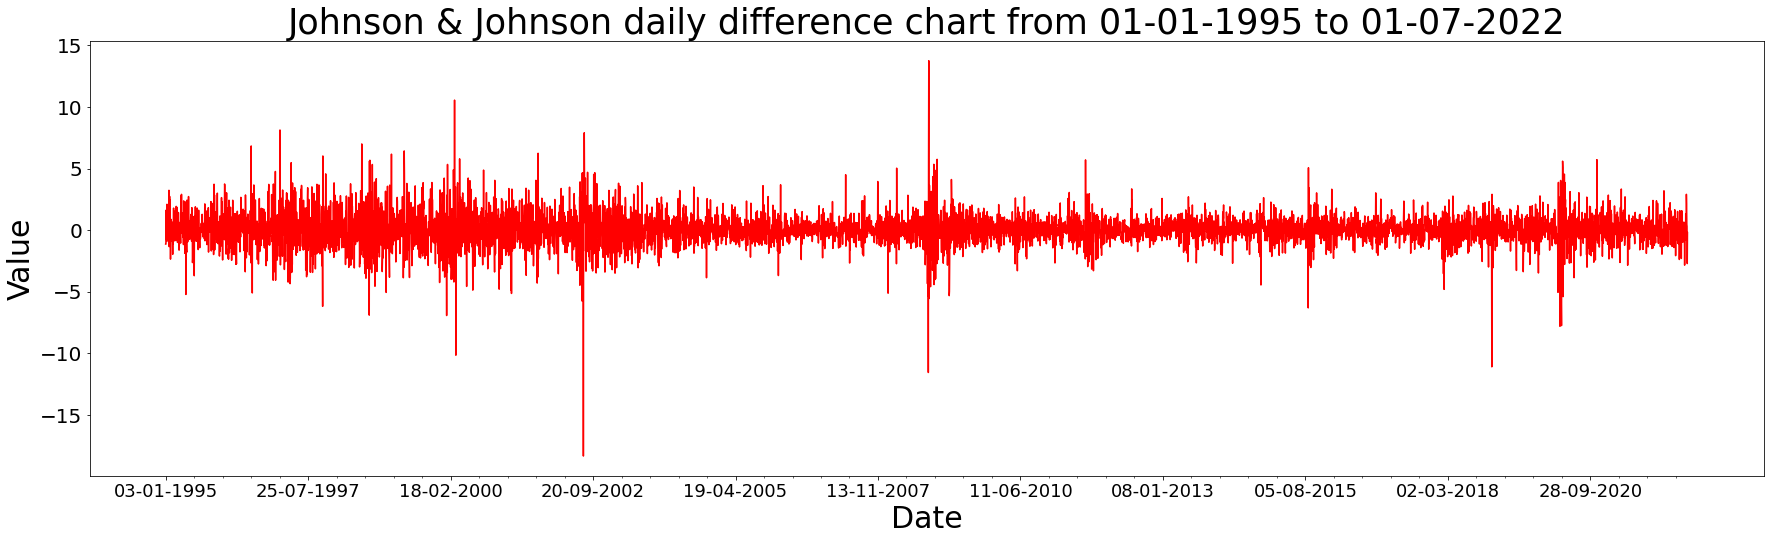

Prozentuale Unterschiede mit mindestens 10 zum Vortag:
Prozentualer Unterschied von -10.98 am 19-10-1987
Prozentualer Unterschied von -10.96 am 22-10-1987
Prozentualer Unterschied von 10.55 am 16-03-2000
Prozentualer Unterschied von -10.15 am 24-03-2000
Prozentualer Unterschied von -18.34 am 19-07-2002
Prozentualer Unterschied von -11.56 am 10-10-2008
Prozentualer Unterschied von 13.75 am 14-10-2008
Prozentualer Unterschied von -11.1 am 17-12-2018

Entwicklung von 1995 bis 2022

Werte für das Jahr: 1995
Tage mit Anstieg: 157
Durchschnittlicher Anstieg pro Tag: 0.88
Tage mit Abfall: 95
Durchschnittlicher Abfall pro Tag: 0.97

Werte für das Jahr: 1996
Tage mit Anstieg: 147
Durchschnittlicher Anstieg pro Tag: 1.05
Tage mit Abfall: 107
Durchschnittlicher Abfall pro Tag: 1.25

Werte für das Jahr: 1997
Tage mit Anstieg: 135
Durchschnittlicher Anstieg pro Tag: 1.51
Tage mit Abfall: 118
Durchschnittlicher Abfall pro Tag: 1.48

Werte für das Jahr: 1998
Tage mit Anstieg: 138
Durchschnittlicher A

In [23]:
#Charts of Johnson & Johnson

jnj_waggle_list = get_daily_diff_list(jnj_open)
title_jnj = f'Johnson & Johnson daily difference chart from {jnj_dates[0]} to {jnj_dates[len(jnj_dates)-1]}'
show_timerange(jnj_dates[0], jnj_dates[len(jnj_dates)-1], jnj_dates, jnj_waggle_list, "Date", "Value", title_jnj, 1500)

start_date = "01-01-1995"
end_date = "01-07-2022"
tick_distance = (int(end_date[6:10])-int(start_date[6:10]))*24


title_jnj = f'Johnson & Johnson daily difference chart from {start_date} to {end_date}'
show_timerange(start_date, end_date, jnj_dates, jnj_waggle_list, "Date", "Value", title_jnj, tick_distance)

#daily
min_percentage_diff = 10
print_waggle_values(jnj_waggle_list, jnj_dates, min_percentage_diff)

print_average_diff_per_year(jnj_waggle_list, jnj_dates, start_date[6:10], end_date[6:10])

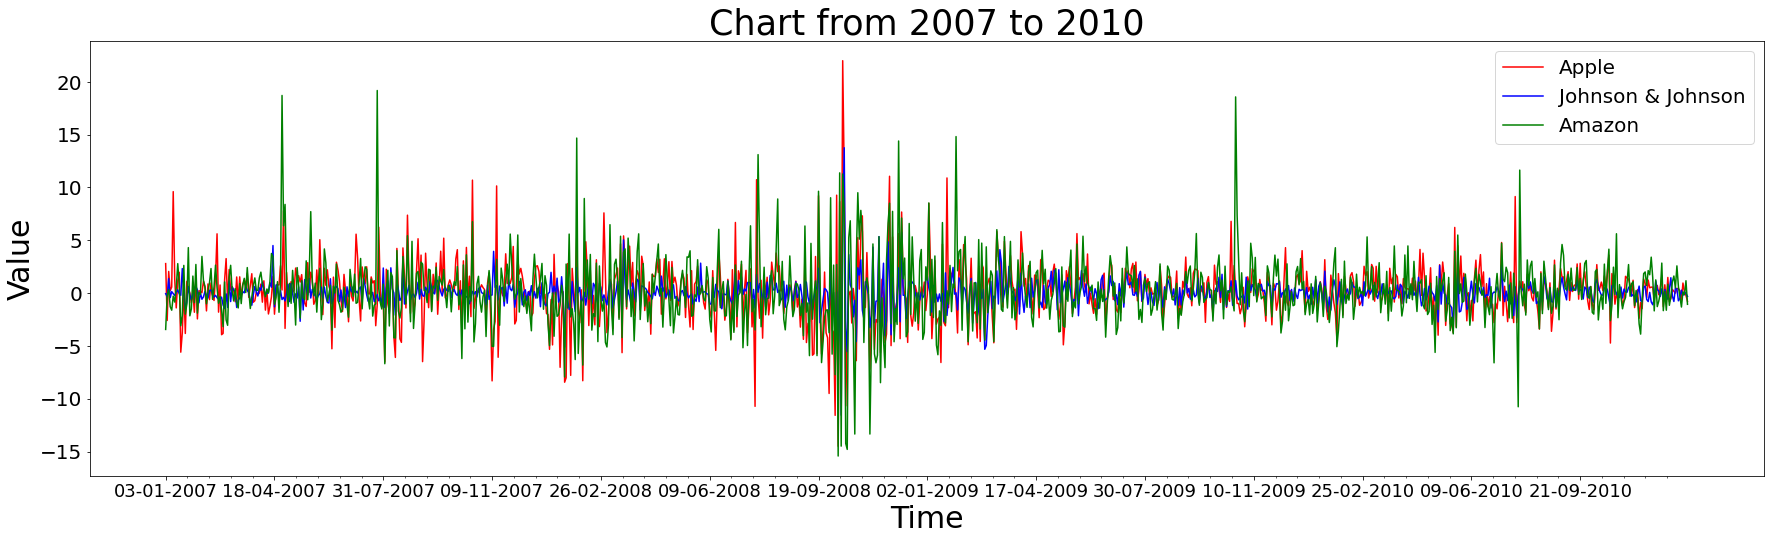

In [24]:
start_year = "2007"
end_year = "2010"
ticks = (int(end_year)-int(start_year))*24

time_list = decrease_list_from_to(start_year,end_year, jnj_dates, [])
apple_list = decrease_list_from_to(start_year,end_year, apple_dates, apple_waggle_list)
jnj_list = decrease_list_from_to(start_year,end_year, jnj_dates, jnj_waggle_list)
amazon_list = decrease_list_from_to(start_year,end_year, amazon_dates, amazon_waggle_list)
tesla_list = decrease_list_from_to(start_year,end_year, tesla_dates, tesla_waggle_list)


title = f'Chart from {start_year} to {end_year}'
overlapping_chart(time_list, apple_list, jnj_list, amazon_list, tesla_list, "Time","Value", title, ticks)

In [25]:
#Holt den höchsten Wert im Zeitraum
#Im Anschluss wird der Zeitpunkt ermittelt, wann der Wert wieder erreicht wird
get_highest_value_in_intervall("01-06-2007", "03-01-2009", apple_dates, apple_open)

Der höchste Wert zwischen dem 01-06-2007 und dem 03-01-2009 ist 7.163928985595703 am 28-12-2007.
Der Wert wurde am 20-10-2009 mit 7.164286136627197 übertroffen.


In [26]:
#Vervielfachung des Aktienwerts
print()
print(f'Apple Vervielfachung um Faktor 10:')
get_how_far_ago(apple_dates, apple_open, 10)
print()
print(f'Apple Vervielfachung um Faktor 100:')
get_how_far_ago(apple_dates, apple_open, 100)

print()
print(f'Tesla Vervielfachung um Faktor 10:')
get_how_far_ago(tesla_dates, tesla_open, 10)
print()
print(f'Tesla Vervielfachung um Faktor 100:')
get_how_far_ago(tesla_dates, tesla_open, 100)

print()
print(f'Johnson & Johnson Vervielfachung um Faktor 10:')
get_how_far_ago(jnj_dates, jnj_open, 10)
print()
print(f'Johnson & Johnson Vervielfachung um Faktor 100:')
get_how_far_ago(jnj_dates, jnj_open, 100)

print()
print(f'Amazon Vervielfachung um Faktor 10:')
get_how_far_ago(amazon_dates, amazon_open, 10)
print()
print(f'Amazon Vervielfachung um Faktor 100:')
get_how_far_ago(amazon_dates, amazon_open, 100)


Apple Vervielfachung um Faktor 10:
Um den Wert seiner Aktie um den Faktor 10 zu erhöhen, müsste man die Aktie am 01-07-2013 zum Wert 14.381786346435547 kaufen. Nun liegt der Wert am 11-07-2022 beim Wert 145.6699981689453

Apple Vervielfachung um Faktor 100:
Um den Wert seiner Aktie um den Faktor 100 zu erhöhen, müsste man die Aktie am 13-07-2005 zum Wert 1.3674999475479126 kaufen. Nun liegt der Wert am 11-07-2022 beim Wert 145.6699981689453

Tesla Vervielfachung um Faktor 10:
Um den Wert seiner Aktie um den Faktor 10 zu erhöhen, müsste man die Aktie am 02-04-2020 zum Wert 96.206001 kaufen. Nun liegt der Wert am 24-03-2022 beim Wert 1009.72998

Tesla Vervielfachung um Faktor 100:
Um den Wert seiner Aktie um den Faktor 100 zu erhöhen, müsste man die Aktie am 22-04-2013 zum Wert 9.72 kaufen. Nun liegt der Wert am 24-03-2022 beim Wert 1009.72998

Johnson & Johnson Vervielfachung um Faktor 10:
Um den Wert seiner Aktie um den Faktor 10 zu erhöhen, müsste man die Aktie am 14-09-1995 zum Wert

In [27]:
#Entwicklung von.. bis
start_date = "01-06-2019"
end_date = "01-06-2022"

print()
print(f'Apple Entwicklung von {start_date} bis {end_date}:')
procentual_diff_from_to(start_date, end_date, apple_dates, apple_open)

print()
print(f'Tesla Entwicklung von {start_date} bis {end_date}:')
procentual_diff_from_to(start_date, end_date, tesla_dates, tesla_open)

print()
print(f'Amazon Entwicklung von {start_date} bis {end_date}:')
procentual_diff_from_to(start_date, end_date, amazon_dates, amazon_open)

print()
print(f'Johnson & Johnson Entwicklung von {start_date} bis {end_date}:')
procentual_diff_from_to(start_date, end_date, jnj_dates, jnj_open)


Apple Entwicklung von 01-06-2019 bis 01-06-2022:
Preis am 01-06-2019: 43.900001525878906
Preis am 01-06-2022: 145.6699981689453
Preisentwicklung von 332%.

Tesla Entwicklung von 01-06-2019 bis 01-06-2022:
Preis am 01-06-2019: 37.102001
Preis am 01-06-2022: 1009.72998
Preisentwicklung von 2721%.

Amazon Entwicklung von 01-06-2019 bis 01-06-2022:
Preis am 01-06-2019: 88.00050354003906
Preis am 01-06-2022: 114.08000183105469
Preisentwicklung von 130%.

Johnson & Johnson Entwicklung von 01-06-2019 bis 01-06-2022:
Preis am 01-06-2019: 131.5
Preis am 01-06-2022: 177.6999969482422
Preisentwicklung von 135%.


**Alwins Teil**

In [28]:
def max_diff(list):
    returned_list = []
    if(len(list)<2):
        return list
    for i in range(0, len(list)-1):
        returned_list.append(list[i+1] - list[i])
    return returned_list

def diff_list_perc(list):
    returned_list = []
    if(len(list)<2):
        return list
    for i in range(0, len(list)-1):
        returned_list.append(((list[i+1] - list[i])/list[i])*100)
    return returned_list

def get_chart(datelist, name, y_value):
    plt.figure(figsize=(20,8))
    ax = plt.gca()
    ticks = 150
    if(ticks != 1):

        tick_list = []
        for i in range(len(datelist)-1):
            if(i%ticks == 0):
                tick_list.append(i)

        ax.set_xticks(tick_list)
        minor_ticks = np.arange(0, len(datelist), (ticks/5))
        ax.set_xticks(minor_ticks, minor=True)
    ax.plot(datelist[:-1], y_value)
    ax.tick_params(direction='out', length=10, width=2)
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    plt.xticks(fontsize= 15)
    plt.yticks(fontsize= 15)
    plt.title(name, fontsize = 25)
    ax.set_ylabel("Value", fontsize=22)

    plt.show()

def get_sorted_diff_perc(list):
    sorted_list = sorted(list)
    return sorted_list
        

def max_diff_sorted(list):
    returned_list = sorted(list)
    return returned_list

def get_date_max_diff_list(date, value, value2):
    returned_index = []
    returned_date = []
    for i in range(0,5):
        returned_index.append(value.index(value2[i]))
    for i in range(len(value)-5, len(value)):
        returned_index.append(value.index(value2[i]))
    for i in range(0, len(returned_index)):
        returned_date.append(date[returned_index[i]])
    return returned_date

def get_date_of_value(date, value, value2):
    index = value.index(value2[-1])
    return date[index]

def get_chart_around_date(datelist, date, index1, index2, name, y_value):
    index = datelist.index(date)
    dates = []
    values = []
    index_start = index-index1
    index_end = index+index2
    ticks = 40

    for i in range(index_start, index_end):
        dates.append(datelist[i])
    for i in range(index_start, index_end):
        values.append(y_value[i])  
    plt.figure(figsize=(20,8))
    ax = plt.gca()
    if(ticks != 1):

        tick_list = []
        for i in range(len(dates)-1):
            if(i%ticks == 0):
                tick_list.append(i)

        ax.set_xticks(tick_list)
        minor_ticks = np.arange(0, len(dates), (ticks/5))
        ax.set_xticks(minor_ticks, minor=True)

    ax.plot(dates, values)
    ax.tick_params(direction='out', length=10, width=2)
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    plt.xticks(fontsize= 15)
    plt.yticks(fontsize= 15)
    plt.title(name, fontsize = 25)
    ax.set_ylabel("Value", fontsize=22)
    plt.show()
    
def get_value_date(datelist, valuelist, value):
    index = valuelist.index(value)
    date = datelist[index]
    return date

def overlapping_percentage_chart(date_list, list_one, list_two, list_three, desc_x, desc_y, title, ticks):
    float_list_one = list(map(float, list_one))
    float_list_two = list(map(float, list_two))
    float_list_three = list(map(float, list_three))
    plt.figure(figsize=(30,8))
    
    ax = plt.gca()  
    if(ticks != 1):

        tick_list = []
        for i in range(len(date_list)-1):
            if(i%ticks == 0):
                tick_list.append(i)
        
        ax.set_xticks(tick_list)
        minor_ticks = np.arange(0, len(date_list), (ticks/5))
        ax.set_xticks(minor_ticks, minor=True)
        
    plt.xticks(fontsize= 18)
    plt.yticks(fontsize= 20)
    
    ax.set_xlabel(desc_x, fontsize=30)
    ax.set_ylabel(desc_y, fontsize=30)
    
    if len(date_list[:-1]) == len(list_one):
        plt.plot(date_list[:-1],list_one, color = "red", label = "Nasdaq") 
    if len(date_list) == len(list_two):
        plt.plot(date_list,list_two, color = "blue", label = "S&P500")
    if len(date_list[:-2]) == len(list_three):
        plt.plot(date_list[:-2],list_three, color = "green", label = "DowJones")
    ax.legend()
    plt.title(title, fontsize = 35)
    plt.show()

def get_max_value_timeline(datelist, date, index1, index2, y_value):
    index = datelist.index(date)
    start_index = index-index1
    end_index = index + index2
    newlist = []
    for i in range(start_index, end_index):
        newlist.append(y_value[i])
    max_value = max(newlist)
    print(max_value)
    
def diff_between_values(datelist, date, index1, index2, y_value):
    index = datelist.index(date)
    start_index = index - index1
    end_index = index + index2
    result = []
    newlist = []
    for i in range(start_index, end_index):
        newlist.append(y_value[i])
    result.append(min(newlist))
    result.append(max(newlist))
    return result



S&P500 Data     note: it's weekly

['Date', 'Value']
['1977-09-02', '1977-09-09', '1977-09-16', '1977-09-23', '1977-09-30']
1977-09-02
2017-08-29

Minimaler Wert:  87.45
1978-03-03
Maximaler Wert:  2476.83
2017-08-04

Maximaler Anstieg:  [79.26999999999998, 85.6099999999999, 91.98000000000002, 96.21000000000004, 99.24000000000001]
Maximaler Abstieg:  [-200.01, -159.03999999999996, -126.74000000000001, -121.91000000000008, -120.64999999999986]



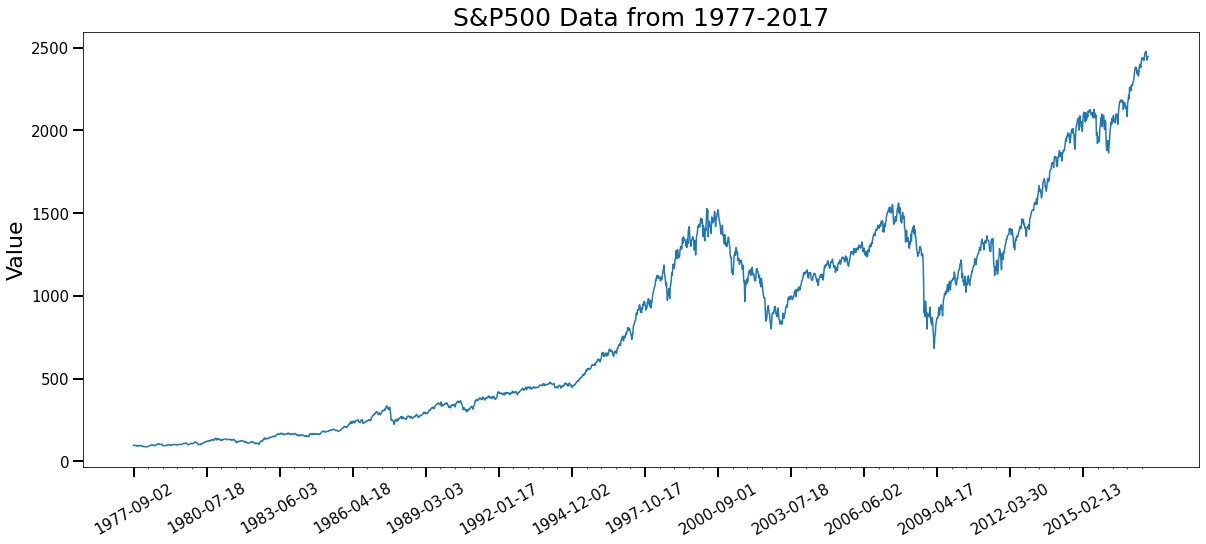

Daten der 10 maximalen Differenzen:

    2008-10-03

    2000-04-07

    2001-09-11

    2015-12-31

    2015-08-14

    2016-11-04

    2011-11-25

    2008-10-24

    2008-11-21

    2000-05-26

2016-11-04
Wert der maximalen positiven Differenz: 99.24000000000001  und das Datum: 2000-05-26



In [29]:
# S&P500 Data
print("\n\nS&P500 Data     note: it's weekly")
filename_S500 = '../input/stock-prices-over-a-30-year-period/SP500.csv'
print()
s500_date, s500_value = [], []
with open(filename_S500) as f:
	df = csv.reader(f)
	header_row = next(df)
	print(header_row)
    
	for row in df:
		date = row[0]
		s500_date.append(date)
        
		value = row[1]
		s500_value.append(value)

print(s500_date[:5])
print(s500_date[0])
print(s500_date[-1])
print()
s500_value_float = list(map(float, s500_value))
print('Minimaler Wert: ', min(s500_value_float))
print(get_value_date(s500_date, s500_value_float, min(s500_value_float)))
print('Maximaler Wert: ', max(s500_value_float))
print(get_value_date(s500_date, s500_value_float, max(s500_value_float)))
print()
#Liste der Differenzen
max_diff_list = max_diff(s500_value_float)
#Sortierte Liste der Differenzen
max_diff_sorted_list = max_diff_sorted(max_diff_list)

plt.figure(figsize=(20,8))
ax = plt.gca()
ticks = 150
if(ticks != 1):

    tick_list = []
    for i in range(len(s500_date)-1):
        if(i%ticks == 0):
            tick_list.append(i)

    ax.set_xticks(tick_list)
    minor_ticks = np.arange(0, len(s500_date), (ticks/5))
    ax.set_xticks(minor_ticks, minor=True)
    
print('Maximaler Anstieg: ', max_diff_sorted_list[-5:])

print('Maximaler Abstieg: ', max_diff_sorted_list[0:5])
print()
ax.plot(s500_date, s500_value_float)
ax.tick_params(direction='out', length=10, width=2)
for tick in ax.get_xticklabels():
    tick.set_rotation(30)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.title("S&P500 Data from 1977-2017", fontsize = 25)
ax.set_ylabel("Value", fontsize=22)

plt.show()

#Liste für die 5 maximalen und minimalen Differenzen als Datum
date_test = get_date_max_diff_list(s500_date, max_diff_list, max_diff_sorted_list)

print("Daten der 10 maximalen Differenzen:")
print()
for x in range(len(date_test)):
    print("   ", date_test[x])
    print()

print(get_value_date(s500_date, max_diff_list, max_diff_sorted_list[-5]))
max_diff_date = get_date_of_value(s500_date, max_diff_list, max_diff_sorted_list)
print("Wert der maximalen positiven Differenz:",max_diff_sorted_list[-1] , " und das Datum:", max_diff_date)
print()

Betrachtung der Werte um 2000

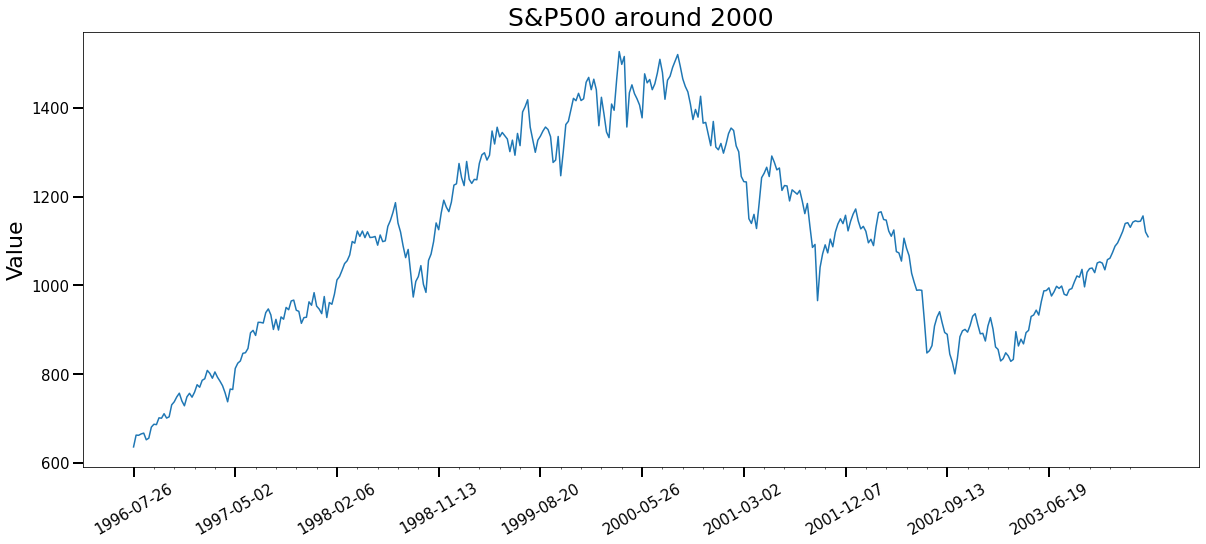

In [30]:
get_chart_around_date(s500_date, max_diff_date, 200, 200, "S&P500 around 2000", s500_value_float)

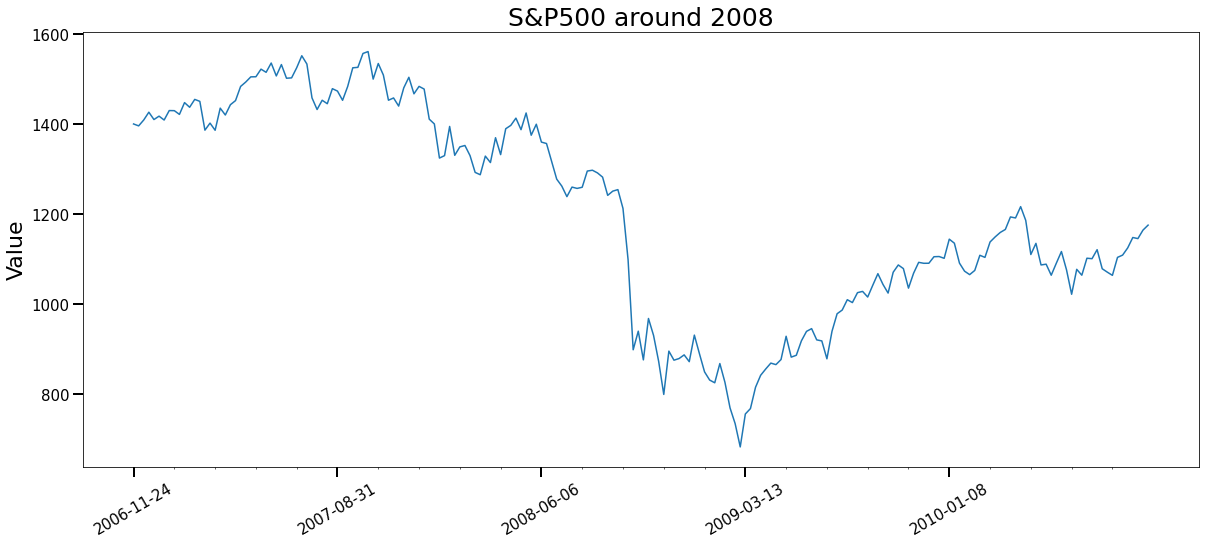

In [31]:
date = "2008-10-24"
get_chart_around_date(s500_date, date, 100, 100, "S&P500 around 2008", s500_value_float)

In [32]:
list_perc_s500 = diff_list_perc(s500_value_float)
sorted_list = get_sorted_diff_perc(list_perc_s500)
for i in range(0, 5):
    print(sorted_list[i])
print()

for i in range(len(list_perc_s500)-5, len(list_perc_s500)):
    print(sorted_list[i])

print()
print(sorted_list[0])
print(sorted_list[-1])
print()

get_date_max_diff_list(s500_date, list_perc_s500, sorted_list)

-18.195464097595586
-12.196674920410326
-11.600490599886504
-10.488343720117385
-9.399391726491215

7.780078691240433
8.830043331728458
10.490778653466704
10.707073663262015
12.025799032536284

-18.195464097595586
12.025799032536284



['2008-10-03',
 '1987-10-16',
 '2001-09-11',
 '2000-04-07',
 '2008-09-26',
 '2001-09-21',
 '1982-08-13',
 '2008-10-24',
 '2009-03-06',
 '2008-11-21']

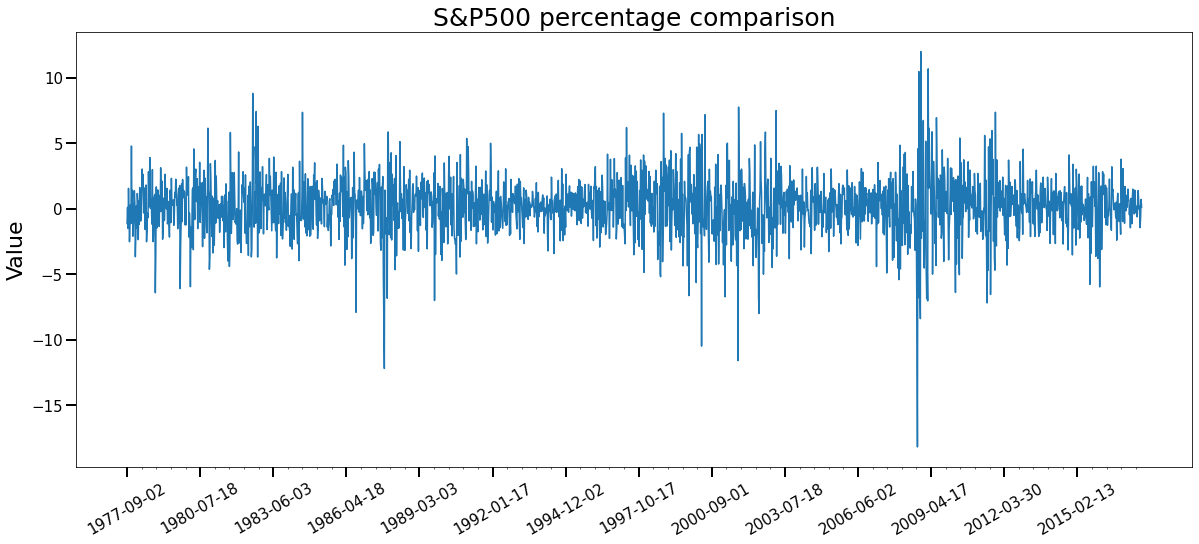

In [33]:
get_chart(s500_date, "S&P500 percentage comparison", list_perc_s500)

In [34]:
date = "2008-10-24"
get_max_value_timeline(s500_date, date, 200, 200, s500_value_float)

1561.8




Nasdaq Data     note: it's weekly

['Date', 'Value']
['1977-09-02', '1977-09-09', '1977-09-16', '1977-09-23', '1977-09-30']
1977-09-02
2017-08-29

Minimaler Wert:  97.21
1977-11-04
Maximaler Wert:  6387.75
2017-07-21

Maximaler Anstieg:  [272.1399999999999, 322.59000000000015, 324.28999999999996, 357.07000000000016, 608.27]
Maximaler Abstieg:  [-1125.1599999999999, -431.4499999999998, -422.59000000000015, -390.1999999999998, -363.77999999999975]



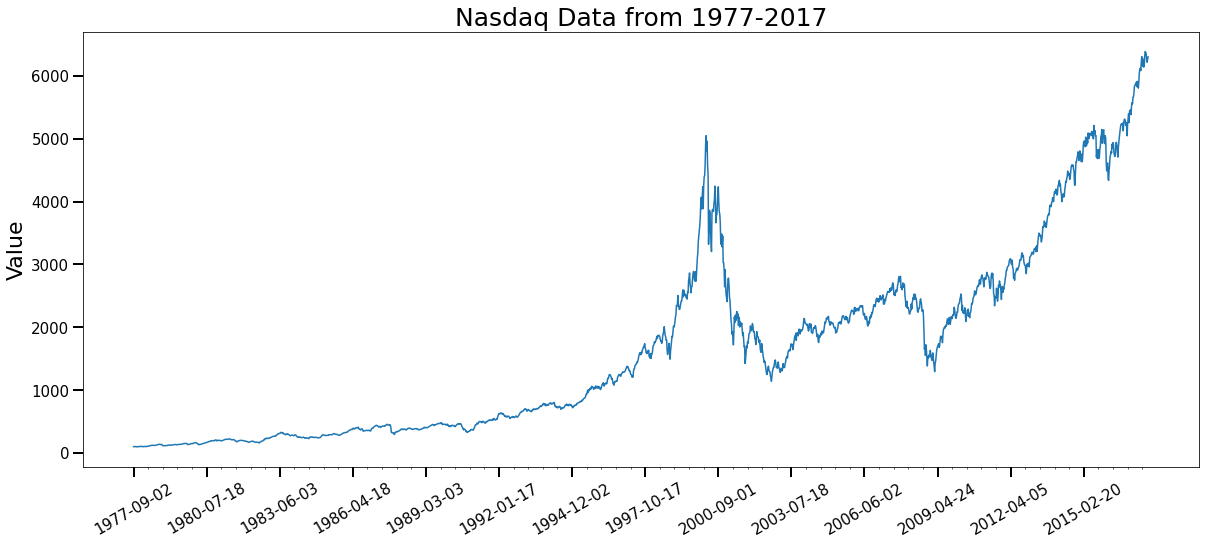

Daten der 10 maximalen Differenzen:

    2000-04-07

    2000-07-21

    2000-11-03

    2000-03-24

    2015-12-31

    2000-12-01

    2000-04-14

    2000-02-25

    2000-01-28

    2000-05-26

Wert der maximalen positiven Differenz: 608.27  und das Datum: 2000-05-26


In [35]:
# Nasdaq Data
print("\n\nNasdaq Data     note: it's weekly")
filename_Nasdaq = '../input/stock-prices-over-a-30-year-period/Nasdaq.csv'
print()

nasdaq_date, nasdaq_value = [], []
with open(filename_Nasdaq) as f:
	df = csv.reader(f)
	header_row = next(df)
	print(header_row)
    
	for row in df:
		date = row[0]
		nasdaq_date.append(date)
        
		value = row[1]
		nasdaq_value.append(value)

print(nasdaq_date[:5])
print(nasdaq_date[0])
print(nasdaq_date[-1])
print()

nasdaq_value_float = list(map(float, nasdaq_value))
print('Minimaler Wert: ', min(nasdaq_value_float))
print(get_value_date(nasdaq_date, nasdaq_value_float, min(nasdaq_value_float)))
print('Maximaler Wert: ', max(nasdaq_value_float))
print(get_value_date(nasdaq_date, nasdaq_value_float, max(nasdaq_value_float)))

print()

#Liste der Differenzen
max_diff_list = max_diff(nasdaq_value_float)
#Sortierte Liste der Differenzen
max_diff_sorted_list = max_diff_sorted(max_diff_list)

plt.figure(figsize=(20,8))
ax = plt.gca()
ticks = 150
if(ticks != 1):

    tick_list = []
    for i in range(len(nasdaq_date)-1):
        if(i%ticks == 0):
            tick_list.append(i)

    ax.set_xticks(tick_list)
    minor_ticks = np.arange(0, len(nasdaq_date), (ticks/5))
    ax.set_xticks(minor_ticks, minor=True)
        
print('Maximaler Anstieg: ', max_diff_sorted_list[-5:])

print('Maximaler Abstieg: ', max_diff_sorted_list[0:5])
print()

ax.plot(nasdaq_date, nasdaq_value_float)
ax.tick_params(direction='out', length=10, width=2)
for tick in ax.get_xticklabels():
    tick.set_rotation(30)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.title("Nasdaq Data from 1977-2017", fontsize = 25)
ax.set_ylabel("Value", fontsize=22)

plt.show()

#Liste für die 5 maximalen und minimalen Differenzen als Datum
date_test = get_date_max_diff_list(nasdaq_date, max_diff_list, max_diff_sorted_list)

print("Daten der 10 maximalen Differenzen:")
print()
for x in range(len(date_test)):
    
    print("   ", date_test[x])
    print()

max_diff_date = get_date_of_value(nasdaq_date, max_diff_list, max_diff_sorted_list)
print("Wert der maximalen positiven Differenz:",max_diff_sorted_list[-1], " und das Datum:", max_diff_date)

Betrachtung der Wrte um 2000

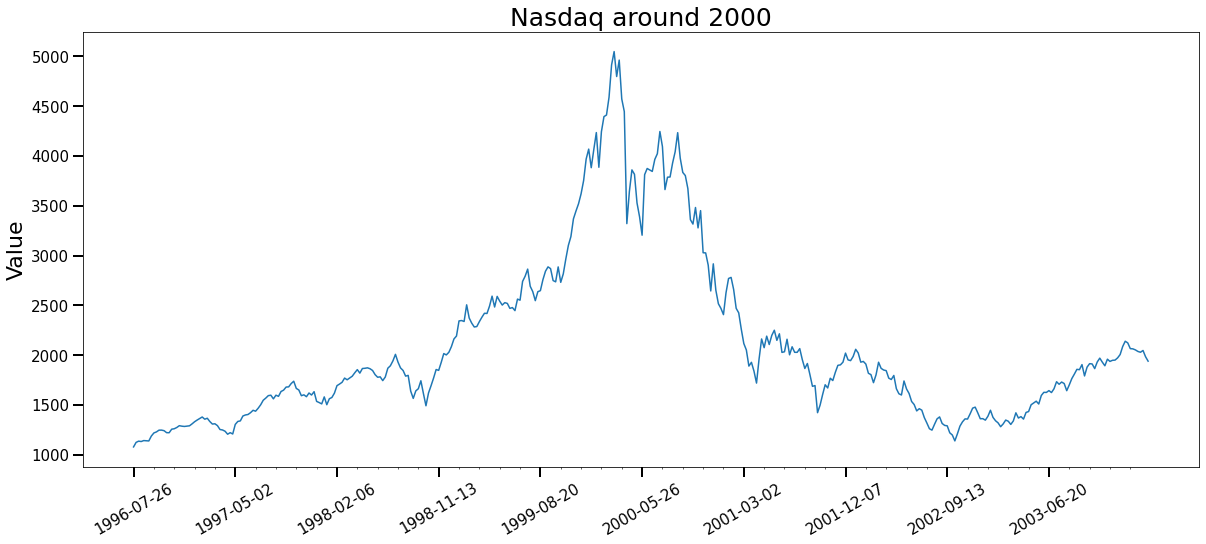

In [36]:
get_chart_around_date(nasdaq_date, max_diff_date, 200, 200, "Nasdaq around 2000", nasdaq_value_float)

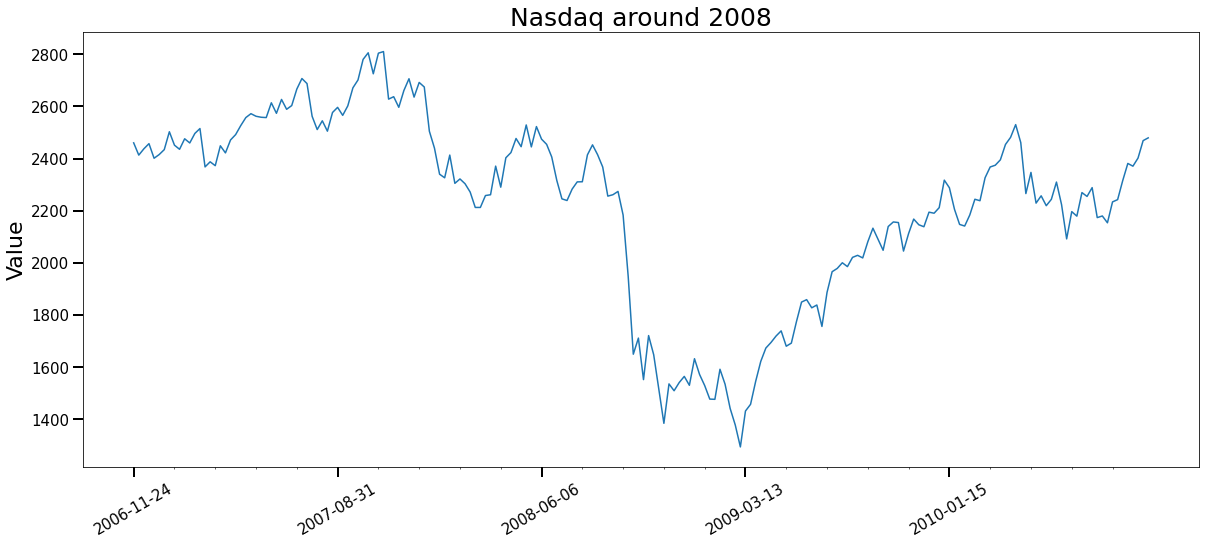

In [37]:
date = "2008-10-24"
get_chart_around_date(nasdaq_date, date, 100, 100, "Nasdaq around 2008", nasdaq_value_float)

In [38]:
list_perc_nas = diff_list_perc(nasdaq_value_float)
sorted_list = get_sorted_diff_perc(list_perc_nas)
for i in range(0, 5):
    print(sorted_list[i])
print()

for i in range(len(list_perc_nas)-5, len(list_perc_nas)):
    print(sorted_list[i])

print()
print(sorted_list[0])
print(sorted_list[-1])
print()

get_date_max_diff_list(nasdaq_date, list_perc_nas, sorted_list)

-25.30468126258026
-19.148412503076546
-16.05431262792192
-15.296371040212803
-12.243378394822086

10.638791204544585
10.883810235626894
10.92353812258461
14.012764770164393
18.9781317957886

-25.30468126258026
18.9781317957886



['2000-04-07',
 '1987-10-16',
 '2001-09-11',
 '2008-10-03',
 '2000-11-03',
 '2009-03-06',
 '2008-10-24',
 '2008-11-21',
 '2001-04-06',
 '2000-05-26']

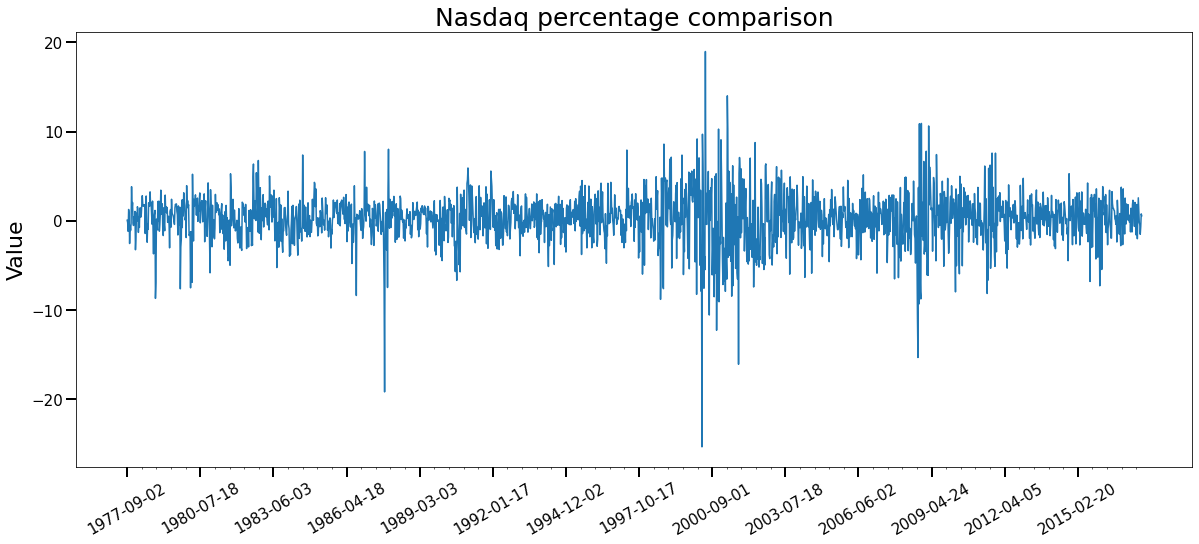

In [39]:
get_chart(nasdaq_date, "Nasdaq percentage comparison", list_perc_nas)



DowJones Data     note: it's weekly

['Date', 'Value']
['1977-09-02', '1977-09-09', '1977-09-16', '1977-09-23', '1977-09-30']
1977-09-02
2017-08-29

Minimaler Wert:  747.31
1978-03-03
Maximaler Wert:  22092.81
2017-08-04

Maximaler Anstieg:  [666.4099999999999, 782.6200000000008, 787.6399999999994, 946.0599999999995, 959.380000000001]
Maximaler Abstieg:  [-1874.1899999999987, -1369.7000000000007, -1078.579999999998, -1017.6500000000015, -821.210000000001]



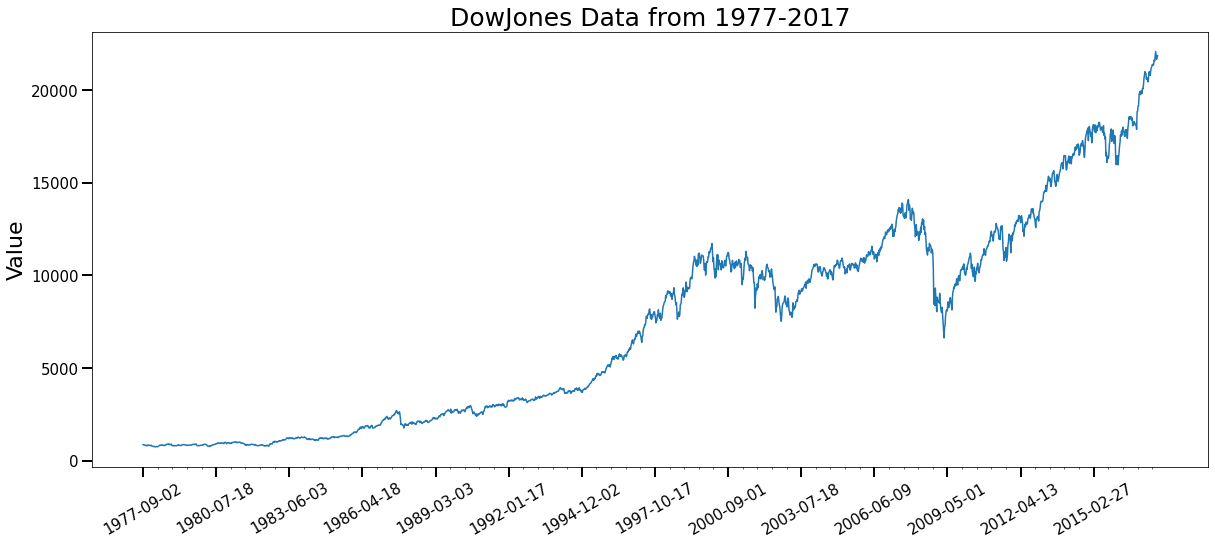

Daten der 10 maximalen Differenzen:

    2008-10-03

    2001-09-10

    2015-12-31

    2015-08-14

    2001-03-09

    2000-03-10

    2008-11-21

    2011-11-25

    2008-10-24

    2016-11-04

Wert der maximalen positiven Differenz: 959.380000000001  und das Datum: 2016-11-04


In [40]:
# DowJones Data
print("\n\nDowJones Data     note: it's weekly")
filename_DowJones = '../input/stock-prices-over-a-30-year-period/DowJones.csv'
print()

dowJones_date, dowJones_value = [], []
with open(filename_DowJones) as f:
	df = csv.reader(f)
	header_row = next(df)
	print(header_row)
    
	for row in df:
		date = row[0]
		dowJones_date.append(date)
        
		value = row[1]
		dowJones_value.append(value)

print(dowJones_date[:5])
print(dowJones_date[0])
print(dowJones_date[-1])
print()

#Liste als floats
dowJones_value_float = list(map(float, dowJones_value))
print('Minimaler Wert: ', min(dowJones_value_float))
print(get_value_date(dowJones_date, dowJones_value_float, min(dowJones_value_float)))

print('Maximaler Wert: ', max(dowJones_value_float))
print(get_value_date(dowJones_date, dowJones_value_float, max(dowJones_value_float)))

print()
#Liste der Differenzen
max_diff_list = max_diff(dowJones_value_float)
#Sortierte Liste der Differenzen
max_diff_sorted_list = max_diff_sorted(max_diff_list)

plt.figure(figsize=(20,8))
ax = plt.gca()
ticks = 150
if(ticks != 1):

    tick_list = []
    for i in range(len(dowJones_date)-1):
        if(i%ticks == 0):
            tick_list.append(i)

    ax.set_xticks(tick_list)
    minor_ticks = np.arange(0, len(dowJones_date), (ticks/5))
    ax.set_xticks(minor_ticks, minor=True)
    
print('Maximaler Anstieg: ', max_diff_sorted_list[-5:])

print('Maximaler Abstieg: ', max_diff_sorted_list[0:5])
print()

#Diagramm
ax.plot(dowJones_date, dowJones_value_float)
ax.tick_params(direction='out', length=10, width=2)
for tick in ax.get_xticklabels():
    tick.set_rotation(30)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.title("DowJones Data from 1977-2017", fontsize = 25)
ax.set_ylabel("Value", fontsize=22)

plt.show()

#Liste für die 5 maximalen und minimalen Differenzen als Datum
date_test = get_date_max_diff_list(dowJones_date, max_diff_list, max_diff_sorted_list)

print("Daten der 10 maximalen Differenzen:")
print()
for x in range(len(date_test)):
    
    print("   ", date_test[x])
    print()

max_diff_date = get_date_of_value(dowJones_date, max_diff_list, max_diff_sorted_list)
print("Wert der maximalen positiven Differenz:",max_diff_sorted_list[-1] , " und das Datum:", max_diff_date)

DowJones um 2000 herum

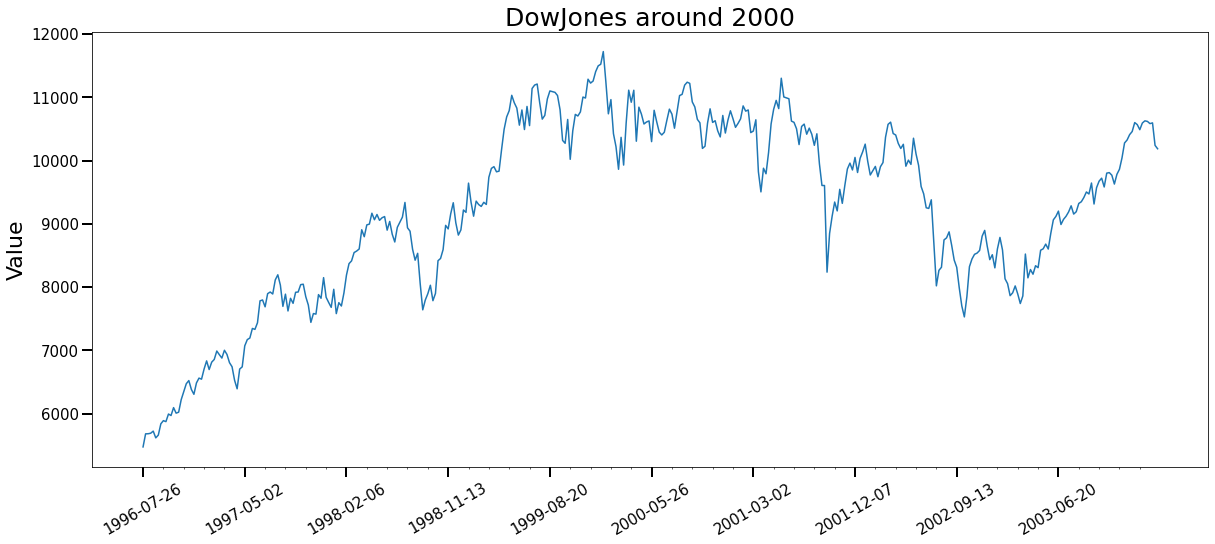

In [41]:
date = "2000-05-26"
get_chart_around_date(dowJones_date, date, 200, 200, "DowJones around 2000", dowJones_value_float)


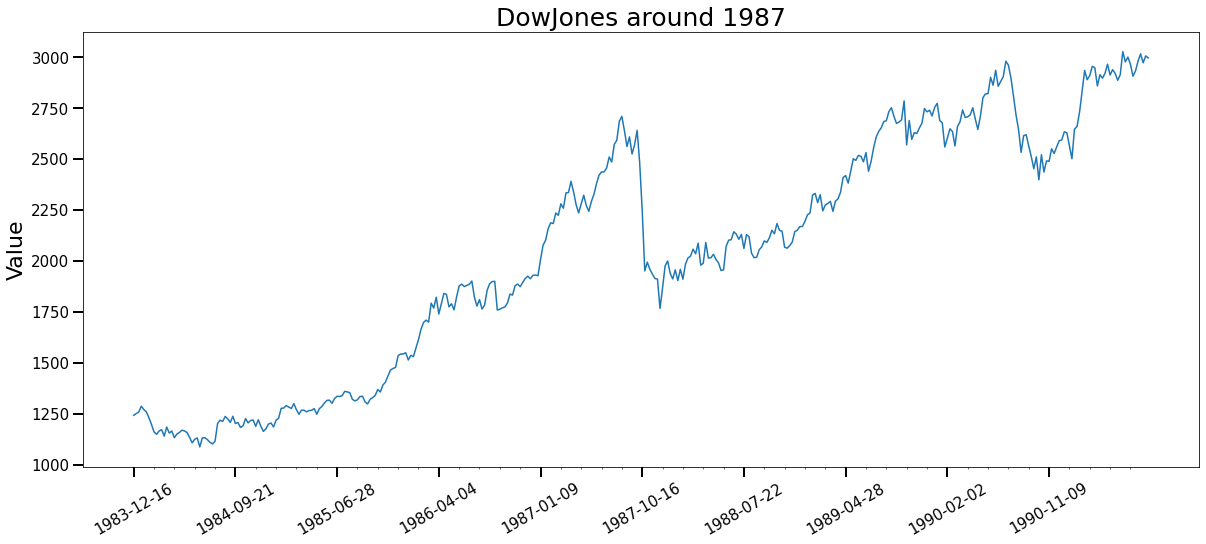

In [42]:
date = "1987-10-16"
get_chart_around_date(dowJones_date, date, 200, 200, "DowJones around 1987", dowJones_value_float)

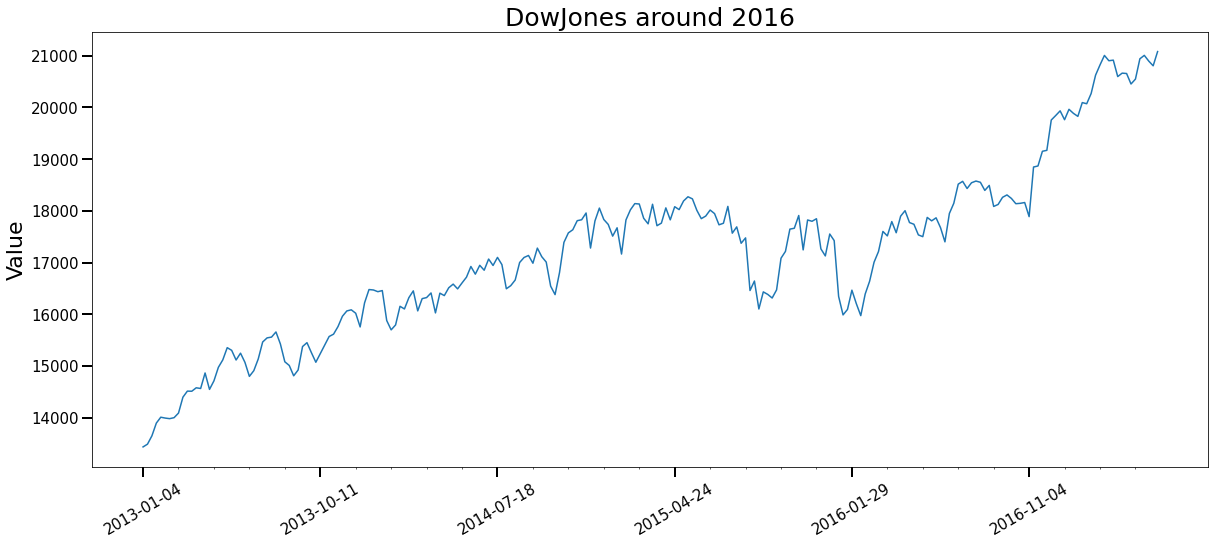

In [43]:
get_chart_around_date(dowJones_date, max_diff_date, 200, 30, "DowJones around 2016", dowJones_value_float)

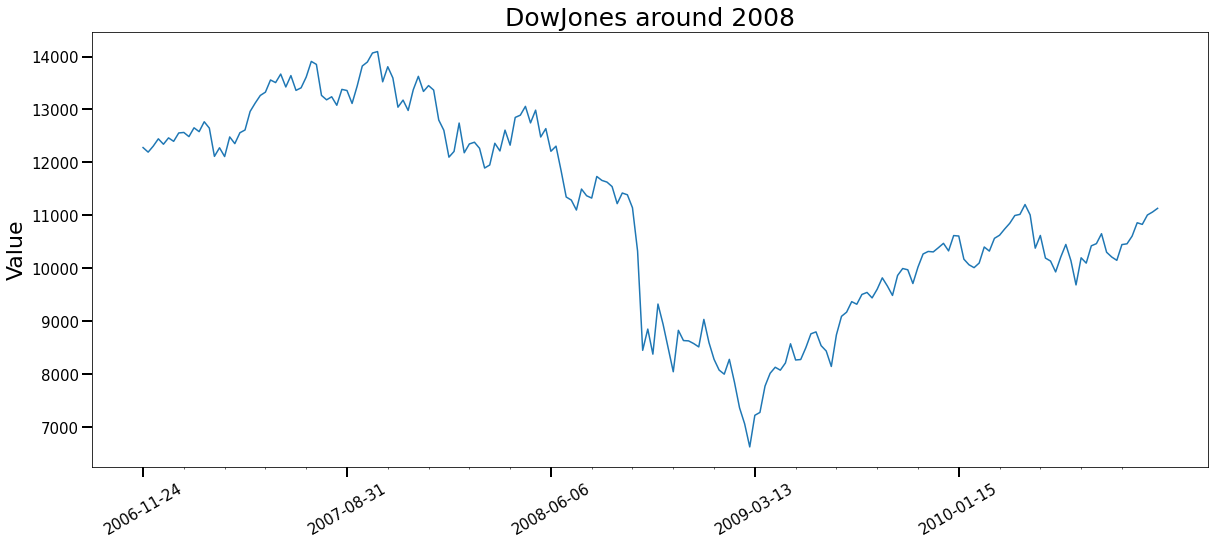

In [44]:
date = "2008-10-24"
get_chart_around_date(dowJones_date, date, 100, 100, "DowJones around 2008", dowJones_value_float)

In [45]:
list_perc_dj = diff_list_perc(dowJones_value_float)
sorted_list = get_sorted_diff_perc(list_perc_dj)
for i in range(0, 5):
    print(sorted_list[i])
print()

for i in range(len(list_perc_dj)-5, len(list_perc_dj)):
    print(sorted_list[i])

print()
print(sorted_list[0])
print(sorted_list[-1])
print()

get_date_max_diff_list(dowJones_date, list_perc_dj, sorted_list)

-18.151293221169574
-14.259523960726714
-13.17336751634598
-9.486707409929055
-7.763720956948784

8.7150505651398
9.009286337283875
9.7263130684205
10.308990546285136
11.290913539285942

-18.151293221169574
11.290913539285942



['2008-10-03',
 '2001-09-10',
 '1987-10-16',
 '1987-10-09',
 '1989-10-06',
 '1982-10-01',
 '2009-03-06',
 '2008-11-21',
 '1982-08-13',
 '2008-10-24']

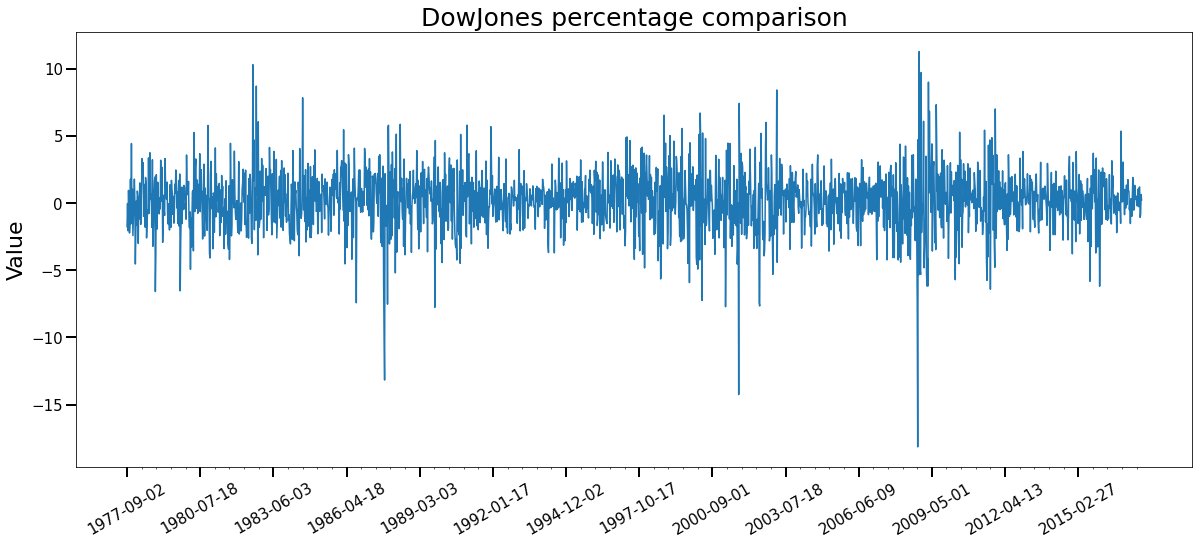

In [46]:
get_chart(dowJones_date, "DowJones percentage comparison", list_perc_dj)

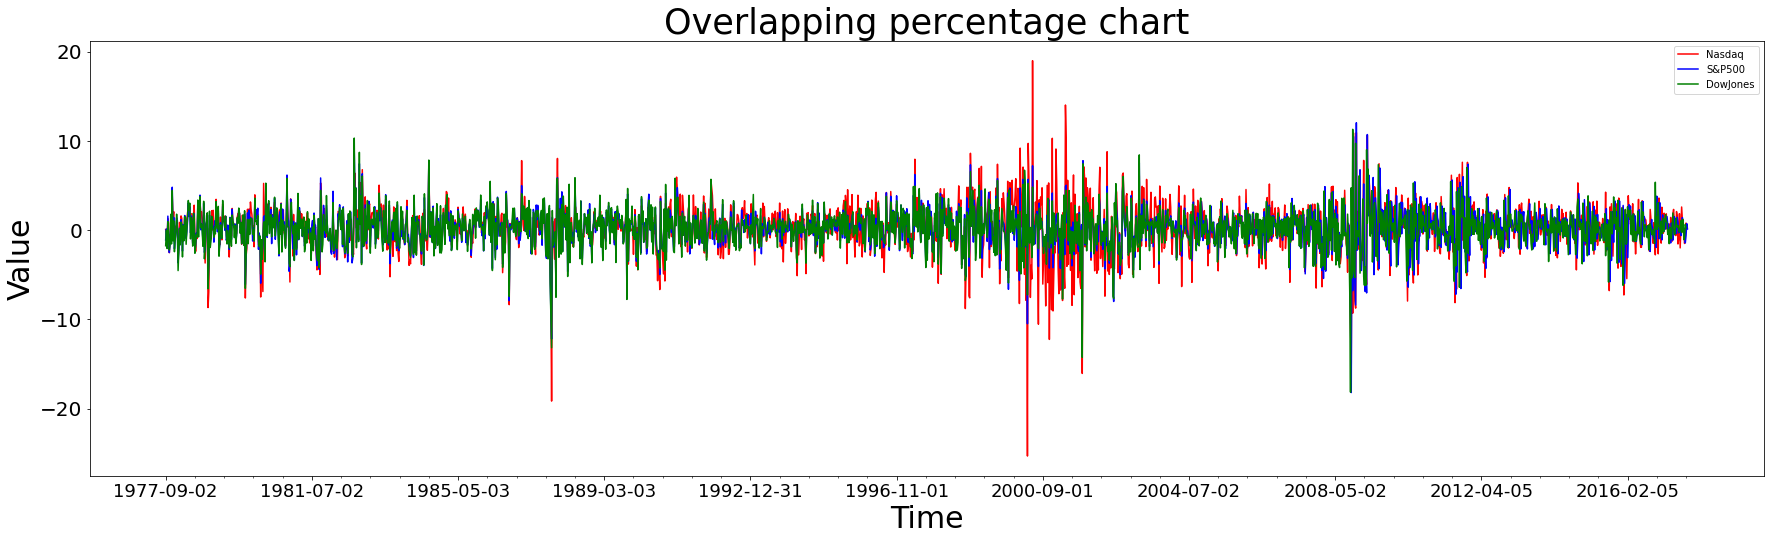

In [47]:
overlapping_percentage_chart(nasdaq_date, list_perc_nas, list_perc_s500, list_perc_dj, "Time", "Value", "Overlapping percentage chart", 200)

In [48]:
date = "2008-10-24"
list_s500 = diff_between_values(s500_date, date, 200, 200, s500_value_float)
print(list_s500[0], list_s500[1])
date1 = get_value_date(s500_date, s500_value_float, list_s500[0])
print(date1)
date2 = get_value_date(s500_date, s500_value_float, list_s500[1])
print(date2)
print(((list_s500[0]-list_s500[1])/list_s500[1])*100)

683.38 1561.8
2009-03-06
2007-10-12
-56.2440773466513


In [49]:
date = "2000-05-26"
list_s500 = diff_between_values(s500_date, date, 200, 200, s500_value_float)
print(list_s500[0], list_s500[1])
date1 = get_value_date(s500_date, s500_value_float, list_s500[0])
print(date1)
date2 = get_value_date(s500_date, s500_value_float, list_s500[1])
print(date2)
print(((list_s500[1]-list_s500[0])/list_s500[0])*100)

635.9 1527.46
1996-07-26
2000-03-24
140.20443465953767


In [50]:
date = "2008-10-24"
list_nasdaq = diff_between_values(nasdaq_date, date, 200, 200, nasdaq_value_float)
print(list_nasdaq[0], list_nasdaq[1])
date1 = get_value_date(nasdaq_date, nasdaq_value_float, list_nasdaq[0])
print(date1)
date2 = get_value_date(nasdaq_date, nasdaq_value_float, list_nasdaq[1])
print(date2)
print(((list_nasdaq[0]-list_nasdaq[1])/list_nasdaq[1])*100)

1293.85 3183.95
2009-03-06
2012-09-14
-59.363369399645094


In [51]:
date = "2000-05-26"
list_nasdaq = diff_between_values(nasdaq_date, date, 0, 200, nasdaq_value_float)
print(list_nasdaq[0], list_nasdaq[1])
date1 = get_value_date(nasdaq_date, nasdaq_value_float, list_nasdaq[0])
print(date1)
date2 = get_value_date(nasdaq_date, nasdaq_value_float, list_nasdaq[1])
print(date2)
print(((list_nasdaq[0]-list_nasdaq[1])/list_nasdaq[1])*100)

1139.9 4246.18
2002-10-04
2000-07-14
-73.15469433702764


In [52]:
date = "2008-10-24"
list_dowJones = diff_between_values(dowJones_date, date, 200, 200, dowJones_value_float)
print(list_dowJones[0], list_dowJones[1])
date1 = get_value_date(dowJones_date, dowJones_value_float, list_dowJones[0])
print(date1)
date2 = get_value_date(dowJones_date, dowJones_value_float, list_dowJones[1])
print(date2)
print(((list_dowJones[0]-list_dowJones[1])/list_dowJones[1])*100)

6626.94 14093.08
2009-03-06
2007-10-12
-52.97734774797277


In [53]:
date = "2000-05-26"
list_dowJones = diff_between_values(dowJones_date, date, 200, 200, dowJones_value_float)
print(list_dowJones[0], list_dowJones[1])
date1 = get_value_date(dowJones_date, dowJones_value_float, list_dowJones[0])
print(date1)
date2 = get_value_date(dowJones_date, dowJones_value_float, list_dowJones[1])
print(date2)
print(((list_dowJones[1]-list_dowJones[0])/list_dowJones[0])*100)

5473.06 11722.98
1996-07-26
2000-01-14
114.19425330619433


In [54]:
# MACROECONOMIC DATA

filename = '../input/interest-rates/index.csv'

#importing data & creating lists
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    dates, years, fed_target_rates, effective_fed_rates, real_gdps, unemployment_rates, inflation_rates, weird_dates = [], [], [], [], [], [], [], []
#	print(header_row)

    for row in reader:
        if row[2] == '01':
            #simplify data to one data point per month (0.1) (AND CLEAN JUNK ENTRIES)

            # when exactly?
            date = f"{row[0]}-{row[1]}"
            dates.append(date)
            year = row[0]
            years.append(year)
            #month = row[1]
            #months.append(month)

            # interest rates
            fed_target_rate = row[3]
            effective_fed_rate = row[6]
            fed_target_rates.append(fed_target_rate)
            effective_fed_rates.append(effective_fed_rate) 
            
            # real_gdp
            real_gdp = row[7]
            real_gdps.append(real_gdp)        

            # unemployment
            unemployment_rate = row[8]
            unemployment_rates.append(unemployment_rate)        

            # inflation NOTE: it lacks entries in the beginning
            inflation_rate = row[9]
            inflation_rates.append(inflation_rate)	

In [55]:
#Helping methods

def clean_up_data(data_set):
    """Remove empty entries and replace them with those from the previous year."""
    clean_data = []
    for i in range(len(data_set)):
        if data_set[i] != '':
            last_data_point = data_set[i]
            clean_data.append(float(data_set[i]))
        else:
            clean_data.append(float(last_data_point))
    return clean_data

def average_per_timeframe(data_set, timeframe):
    """
    Calculate the average of the amount of pace someone enters.
    In a dataset with 1 month intervals, enter 12 in timeframe to get the yearly average.
    """
    name_of_new_list = []
    for i in range(len(data_set)):
        if i>(timeframe-2): #-2, weil 12 monat noch inklusive + 0-index
            cum_data = 0
            for n in range(timeframe):
                cum_data += data_set[i-n]
                
            average_data = cum_data / timeframe
            name_of_new_list.append(round(average_data, 2))       
    return name_of_new_list

def hochpunkt(data_set):
    max_value = data_set[0]
    #print(max_value)
    for value in data_set:
        #print(value)
        if value > max_value:
            max_value = value
            #print("DER WURDE ERKANNT")
    return max_value

def tiefpunkt(data_set):
    min_value = data_set[0]
    for i in range(len(data_set)):
        if data_set[i] < min_value:
            min_value = data_set[i]
    return min_value

def tiefpunkt_timeframe(data_set, start_year, end_year):
    start_index = what_time_is_it(start_year)[0]
    end_index = what_time_is_it(end_year)[11]
    
    min_value = data_set[start_index]
    for value in data_set[start_index:end_index]:
        if value < min_value:
            min_value = value
    return min_value

def hochpunkt_timeframe(data_set, start_year, end_year):
    start_index = what_time_is_it(start_year)[0]
    end_index = what_time_is_it(end_year)[11]
    
    max_value = data_set[start_index]
    for value in data_set[start_index:end_index]:
        if value > max_value:
            max_value = value
    return max_value

def average_value(data_set):
    cumulated_values, counter = 0, 0
    for value in data_set:
        if value != '':
            cumulated_values += value
            counter += 1
    average_value = round((cumulated_values / counter), 2)
    return average_value

#Analysis of Specific Timeperiods

def what_time_is_it(year):
    """input the year, output the index i"""
    i = -1
    index = []
    for yr in years:
        i += 1
        if int(yr) == year:
            index.append(i)
    return index

def convert_index_to_date(index):
    date = dates[index]
    return date

def convert_value_from_data_set_to_date(data_set, value):
    index_of_value = data_set.index(value)
    date_of_value = convert_index_to_date(index_of_value)
    return date_of_value


#####notfinished
#def get_index_from_data_dataset(date_data_set, year):
#    for date in date_data_set:
#        if year in date:


def difference_in_timeframe(data_set, start_year, end_year):
    """asdasdasd"""
    start_index = what_time_is_it(start_year)[0]
    end_index = what_time_is_it(end_year)[11]
    difference = float(data_set[end_index]) - float(data_set[start_index])
    return round(difference, 2)

def average_in_timeframe(data_set, start_year, end_year):
    """input a dataset, the start-year and end-year. Output the average value during that period."""
    start_index = what_time_is_it(start_year)[0]
    end_index = what_time_is_it(end_year)[11]
    values_cum, counter = 0,0
    for value in data_set[start_index:end_index]:
        values_cum += value
        counter += 1
    average_value = values_cum / counter
    return average_value

def max_change_in_timeframe(data_set, start_year, end_year):
    """Input a dataset, a start- and endpoint. Output the biggest drawdown during that period."""
    start_index = what_time_is_it(start_year)[0]
    end_index = what_time_is_it(end_year)[11]
    
    max_value = data_set[start_index]
    min_value = data_set[start_index]

    for value in data_set[start_index:end_index]:
        if value > max_value:
            max_value = value
        if value < min_value:
            min_value = value

    #Was the max_value before or after the min value - appreciation or loss?
    index_max = data_set.index(max_value)
    index_min = data_set.index(min_value)
    
    if index_max < index_min:
        max_drawdown = max_value - min_value
        type = "drawdown"
        return max_drawdown, type
        
    elif index_max > index_min:
        max_appreciation = max_value - min_value
        type = "appreciation"
        return max_appreciation, type

    return max_value, min_value

def daten_ableiten(data_set):
    abgeleitete_daten = []
    last_value = data_set[0]
    for value in data_set:
        steigung = value - last_value
        last_value = value
        abgeleitete_daten.append(steigung)
    return abgeleitete_daten

def time_to_break_even(monthly_data_set, data_set, start_year, end_year):
    """
    Enter a start and an end of a time period.
    Calculate what the peak of that time period was.
    Calculate when the level was reached/surpassed again.
    Get the index of those two points, calculate the difference and convert that to months.
    """
    start_index = what_time_is_it(start_year)[0]
    end_index = what_time_is_it(end_year)[11]
    
    peak_value = hochpunkt(data_set[start_index:end_index])
    peak_index = data_set[start_index:end_index].index(peak_value) + start_index
    print(f"peak index: {peak_index}")
    print(f"peak value: {peak_value}")
    print(f"value of peak index: {data_set[peak_index]}")
    
    month_until_break_even = 0
    for value in data_set[peak_index:]:
        month_until_break_even += 1
        if value > peak_value:
            break
    return month_until_break_even
    
def plot_a_graph_multiple(x_values, y_values_1, y_values_2, title, y_label, set_n,x_label=''):
    """Enter the y-data and time-data and output a correctly formatted plot.
    optionally, enter a start- and endyear in which the graph should be shown."""
    
    fig, ax = plt.subplots()
    ax.plot(x_values, y_values_1, c='blue', alpha=0.5)
    ax.plot(x_values, y_values_2, c='red', alpha=0.5)
    
    #Format plot
    ax.set_title(title, fontsize=20)
    ax.set_xlabel(x_label ,fontsize=16)
    fig.autofmt_xdate()
    ax.set_ylabel(y_label, fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=10)    
    
    every_nth = set_n
    for n, label in enumerate(ax.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)
    
    plt.show()
    
def plot_a_graph_multiple_timeframe(x_values, y_values_1, y_values_2, start_year, end_year, title, y_label, set_n, x_label=''):
    
    fig, ax = plt.subplots()
    index_start = what_time_is_it(start_year)[0]
    index_end = what_time_is_it(end_year)[11]
    ax.plot(x_values[index_start:index_end], y_values_1[index_start:index_end], c='blue', alpha=0.5)
    ax.plot(x_values[index_start:index_end], y_values_2[index_start:index_end], c='blue', alpha=0.5)

    #Format plot
    ax.set_title(title, fontsize=20)
    ax.set_xlabel(x_label ,fontsize=16)
    fig.autofmt_xdate()
    ax.set_ylabel(y_label, fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=10)

    every_nth = set_n
    for n, label in enumerate(ax.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)

    plt.show()
    
def plot_a_graph_3_timeframe(x_values, y_values_1, y_values_2, y_values_3, start_year, end_year, title, y_label, set_n, x_label=''):
    
    fig, ax = plt.subplots()
    index_start = what_time_is_it(start_year)[0]
    index_end = what_time_is_it(end_year)[11]
    ax.plot(x_values[index_start:index_end], y_values_1[index_start:index_end], c='blue', alpha=0.5)
    ax.plot(x_values[index_start:index_end], y_values_2[index_start:index_end], c='red', alpha=0.5)
    ax.plot(x_values[index_start:index_end], y_values_3[index_start:index_end], c='green', alpha=0.5)
    
    #Format plot
    ax.set_title(title, fontsize=20)
    ax.set_xlabel(x_label ,fontsize=16)
    fig.autofmt_xdate()
    ax.set_ylabel(y_label, fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=10)

    every_nth = set_n
    for n, label in enumerate(ax.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)

    plt.show()
    

    
def plot_a_graph_timeframe(x_values, y_values, start_year, end_year, title, y_label, ticks, referenzlinie = 0.1, x_label=''):
    """Enter the y-data and time-data and output a correctly formatted plot.
    optionally, enter a start- and endyear in which the graph should be shown."""
    index_start = what_time_is_it(start_year)[0]
    index_end = what_time_is_it(end_year)[11]
    
    plt.figure(figsize=(20,8))
    ax = plt.gca()
    ax.plot(x_values[index_start:index_end], y_values[index_start:index_end], c='blue', alpha=0.5, linewidth=3.0)
    #Format plot
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(x_label ,fontsize=10)
    ax.set_ylabel(y_label, fontsize=10)
    ax = plt.gca()
    if(ticks != 1):
        tick_list = []
        for i in range(len(x_values[index_start:index_end])-1):
            if(i%ticks == 0):
                tick_list.append(i)

        ax.set_xticks(tick_list, rotation = 45)
        ax.tick_params(direction='out', length=10, width=2)
        minor_ticks = np.arange(0, len(x_values[index_start:index_end]), (ticks/5))
        ax.set_xticks(minor_ticks, minor=True)
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    plt.xticks(fontsize= 14)
    plt.yticks(fontsize= 16)
    plt.title(title, fontsize = 25)
    ax.set_xlabel(x_label, fontsize=22)
    ax.set_ylabel(y_label, fontsize=22)
    if referenzlinie != 0.1:
        plt.axhline(y=referenzlinie, xmin=0, xmax=10000, linewidth=1.0)
    plt.show()
    
def plot_a_graph(x_values, y_values, title, y_label, ticks, referenzlinie=0.1, x_label=''):
    """Enter the y-data and time-data and output a correctly formatted plot.
    optionally, enter a start- and endyear in which the graph should be shown."""
    plt.figure(figsize=(20,8))
    ax = plt.gca()
    ax.plot(x_values, y_values, c='blue', alpha=0.5, linewidth=3.0)
    #Format plot
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(x_label ,fontsize=10)
    ax.set_ylabel(y_label, fontsize=10)
    ax = plt.gca()
    if(ticks != 1):
        tick_list = []
        for i in range(len(x_values)-1):
            if(i%ticks == 0):
                tick_list.append(i)

        ax.set_xticks(tick_list, rotation = 45)
        ax.tick_params(direction='out', length=10, width=2)
        minor_ticks = np.arange(0, len(x_values), (ticks/5))
        ax.set_xticks(minor_ticks, minor=True)
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    plt.xticks(fontsize= 14)
    plt.yticks(fontsize= 16)
    plt.title(title, fontsize = 25)
    ax.set_xlabel(x_label, fontsize=22)
    ax.set_ylabel(y_label, fontsize=22)
    if referenzlinie != 0.1:
        plt.axhline(y=referenzlinie, xmin=0, xmax=10000, linewidth=1.0)
    plt.show()

Average GDP: 3.13



Hochpunkt am 1978-04
9.8
Tiefpunkt am 1958-01
-10.0

1958-01: GDP fällt auf -10.0%.

1980-04: GDP fällt auf -7.9%.

2008-10: GDP fällt auf -8.2%.


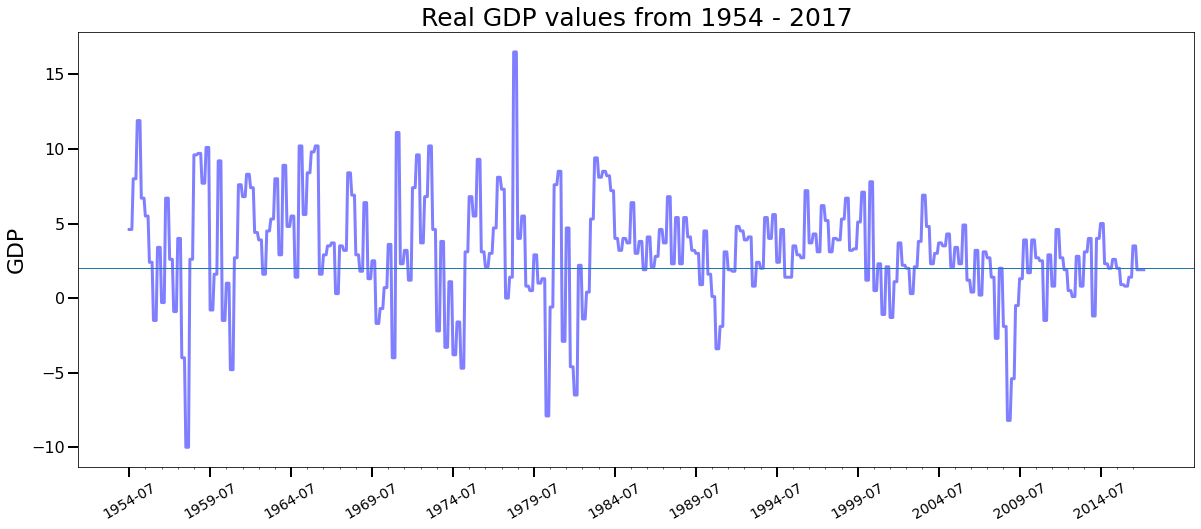

In [56]:
# Real GDP

#Data set is quarterly, every 3 month.  real_gdps[::3]

real_gdps_clean = clean_up_data(real_gdps)
#print(real_gdps_clean)




#Durchschnittlicher GDP
average_gdp = average_value(real_gdps_clean)
print(f"Average GDP: {round(average_gdp, 2)}")

#hochpunkt gdp
print("\n\n")
print(f"Hochpunkt am {dates[285]}")
hochpunkt_real_gdps = hochpunkt(real_gdps[::3])
print(hochpunkt_real_gdps)

#tiefpunkt gdp
print(f"Tiefpunkt am {dates[42]}")
tiefpunkt_real_gdps = tiefpunkt(real_gdps_clean)
print(tiefpunkt_real_gdps)


# 3 Extremwerte im Graphen:
tiefpunkt_1st_crash = tiefpunkt_timeframe(real_gdps_clean, 1955, 1964)
date_first_crash = convert_index_to_date(real_gdps_clean.index(tiefpunkt_1st_crash))
print(f"\n{date_first_crash}: GDP fällt auf {tiefpunkt_1st_crash}%.")

tiefpunkt_2nd_crash = tiefpunkt_timeframe(real_gdps_clean, 1975, 1990)
date_second_crash = convert_index_to_date(real_gdps_clean.index(tiefpunkt_2nd_crash))
print(f"\n{date_second_crash}: GDP fällt auf {tiefpunkt_2nd_crash}%.")

tiefpunkt_3rd_crash = tiefpunkt_timeframe(real_gdps_clean, 2007, 2011)
date_third_crash = convert_index_to_date(real_gdps_clean.index(tiefpunkt_3rd_crash))
print(f"\n{date_third_crash}: GDP fällt auf {tiefpunkt_3rd_crash}%.")


#Visualize the data
plot_a_graph(dates, real_gdps_clean, "Real GDP values from 1954 - 2017", "GDP", 60, 2)



#max_drawdown_1960 = change_in_timeframe = max_change_in_timeframe(real_gdps_clean, 1959, 1964)
#date_first_crash = convert_index_to_date(real_gdps_clean.index(max_drawdown_1960[0]))
#print(f"{date_first_crash} ging der GDP um {max_drawdown_1960[0]} zurück.")
#max_drawdown_1984 = change_in_timeframe = max_change_in_timeframe(real_gdps_clean, 1982, 1989)
#date_second_crash = convert_index_to_date(real_gdps_clean.index(max_drawdown_1984[0]))
#print(f"{date_first_crash} ging der GDP um {max_drawdown_1960[0]} zurück.")


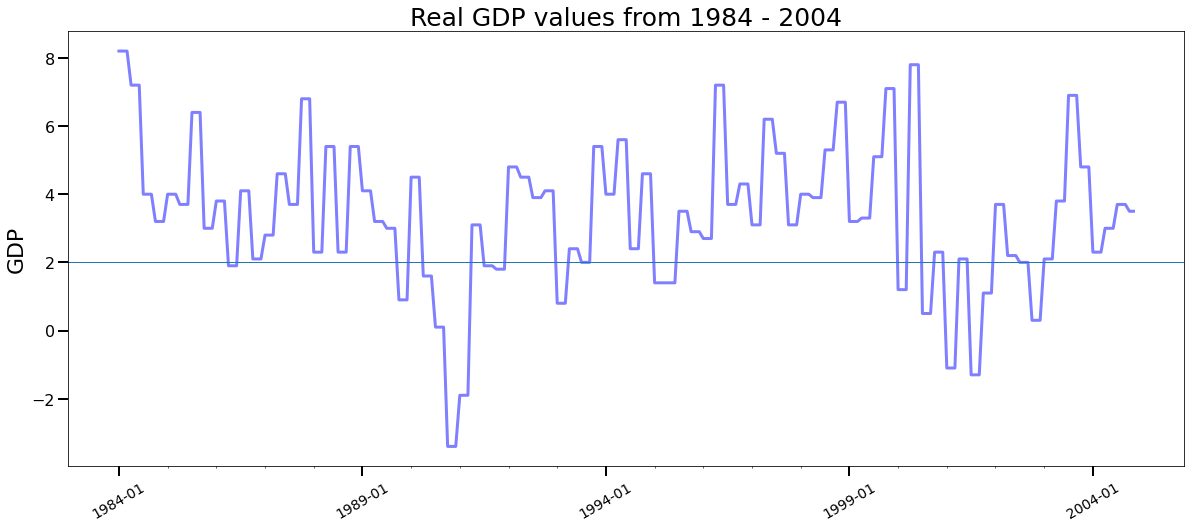

In [57]:
plot_a_graph_timeframe(dates, real_gdps_clean, 1984, 2004, "Real GDP values from 1984 - 2004", "GDP", 60, 2)

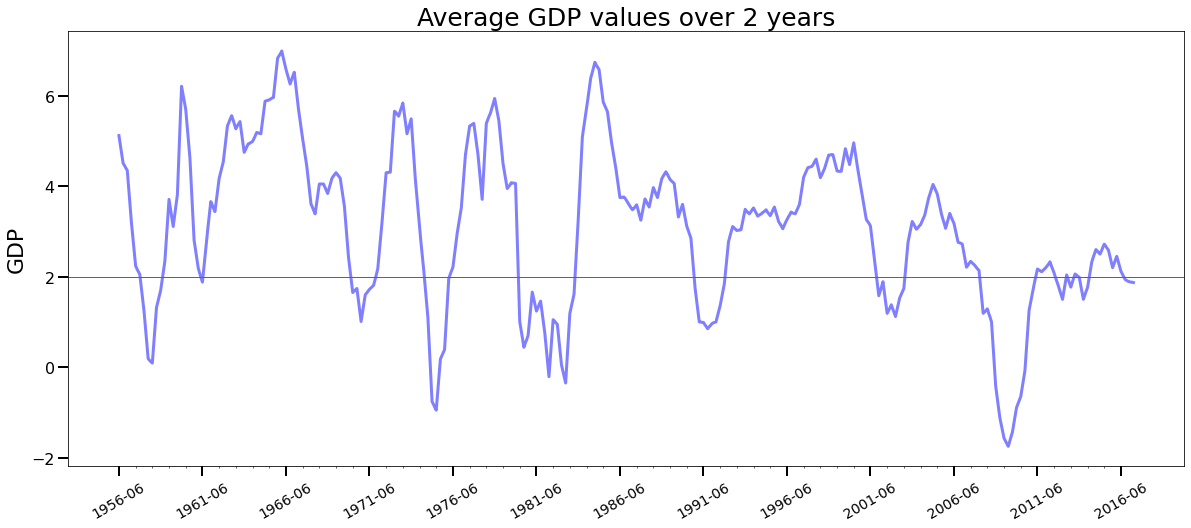


Man kann sehen, wie die Finanzkrise 2008 sich auf das Wirtschaftswachstum ausgewirkt hat. Der maximale drawdown ist ähnlich wie beiden Finanzkrisen zuvor, allerdings fällt der Zwei-Jahres-Durchschnitt tiefer. Die Ursache liegt darin, dass das Durchschnittliche Niveauin dieser Zeitperiode niedriger ist als sonst. Dies wird deutlich am 10-year-average-gdp Chart.


In [58]:
real_gdp_two_year_average = average_per_timeframe(real_gdps_clean ,24)

plot_a_graph(dates[23:], real_gdp_two_year_average, "Average GDP values over 2 years", "GDP", 60, 2)

print("\nMan kann sehen, wie die Finanzkrise 2008 sich auf das Wirtschaftswachstum ausgewirkt hat. Der maximale drawdown ist ähnlich wie bei"
      "den Finanzkrisen zuvor, allerdings fällt der Zwei-Jahres-Durchschnitt tiefer. Die Ursache liegt darin, dass das Durchschnittliche Niveau"
     "in dieser Zeitperiode niedriger ist als sonst. Dies wird deutlich am 10-year-average-gdp Chart.")

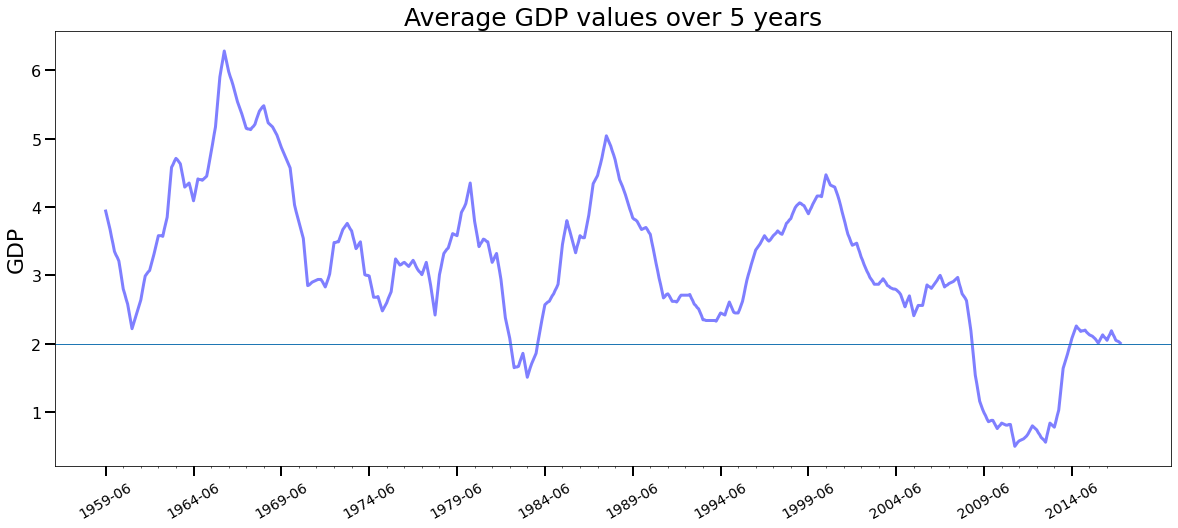

In [59]:
real_gdp_one_year_average = average_per_timeframe(real_gdps_clean ,60)

plot_a_graph(dates[59:], real_gdp_one_year_average, "Average GDP values over 5 years", "GDP", 60, 2)

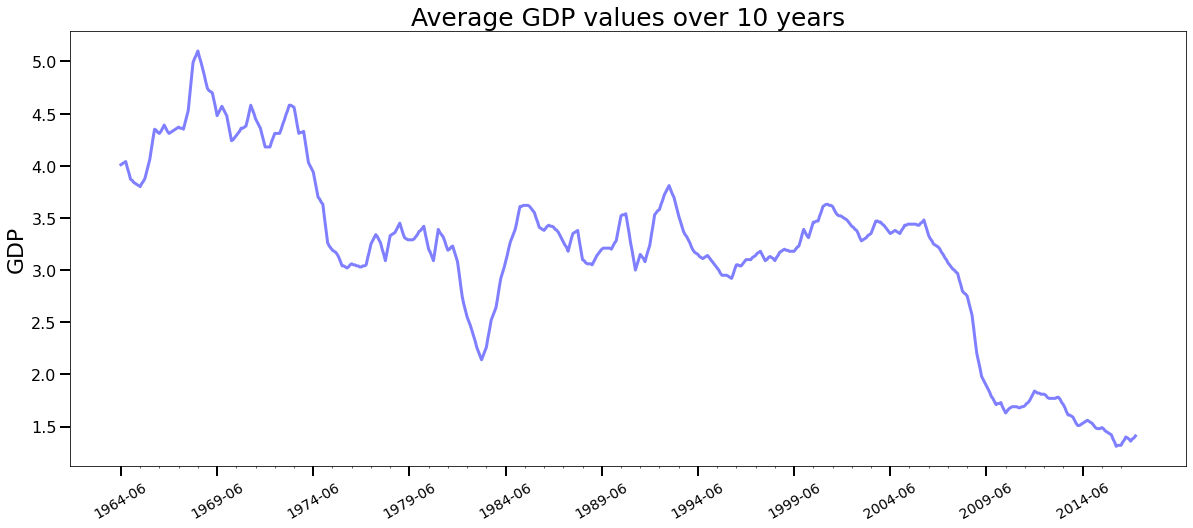

In [60]:
real_gdp_one_year_average = average_per_timeframe(real_gdps_clean ,120)

plot_a_graph(dates[119:], real_gdp_one_year_average, "Average GDP values over 10 years", "GDP", 60)


index of 2007:
[630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641]
index of 2009:
[654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665]

GDP 2007:
0.2
GDP 2009:
3.9
GDP progression 2007 - 2009
[0.2, 0.2, 0.2, 3.1, 3.1, 3.1, 2.7, 2.7, 2.7, 1.4, 1.4, 1.4, -2.7, -2.7, -2.7, 2.0, 2.0, 2.0, -1.9, -1.9, -1.9, -8.2, -8.2, -8.2, -5.4, -5.4, -5.4, -0.5, -0.5, -0.5, 1.3, 1.3, 1.3, 3.9, 3.9]

Difference 2007 - 2009
3.7

Average 2007 - 2009:
-0.46285714285714286

Biggest Change during 2007 - 2009
(12.1, 'drawdown')
peak index: 633
peak value: 3.1
value of peak index: 3.1
It took 31 month to get back to the gdp-levels pre-crisis
2007-04
2009-11


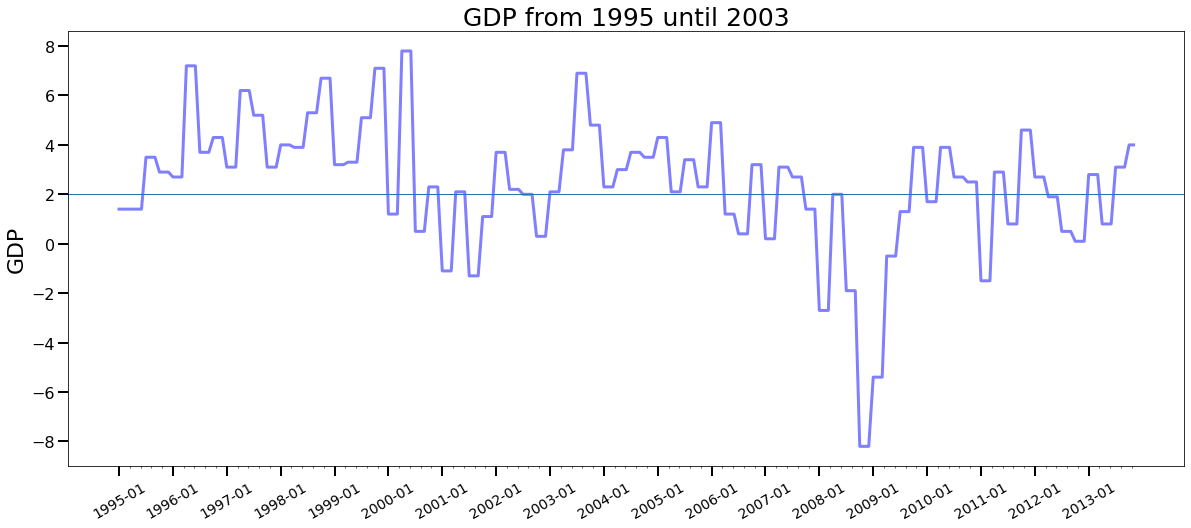

In [61]:
#Analysis of specific time periods:

year_1 = what_time_is_it(2007)
year_2 = what_time_is_it(2009)
print("\nindex of 2007:")
print(year_1)
print("index of 2009:")
print(year_2)

#gdp
gdp_2007 = real_gdps_clean[630]
print("\nGDP 2007:")
print(gdp_2007)

gdp_2009 = real_gdps_clean[665]
print("GDP 2009:")
print(gdp_2009)

print("GDP progression 2007 - 2009")
print(real_gdps_clean[630:665])

difference_2007_2009 = difference_in_timeframe(real_gdps_clean, 2007, 2009)
print("\nDifference 2007 - 2009")
print(difference_2007_2009)

average_2007_2009 = average_in_timeframe(real_gdps_clean, 2007, 2009)
print("\nAverage 2007 - 2009:")
print(average_2007_2009)

change_in_timeframe = max_change_in_timeframe(real_gdps_clean, 2007, 2009)
print("\nBiggest Change during 2007 - 2009")
print(change_in_timeframe)







months_until_gdp_breaks_even = time_to_break_even(dates, real_gdps_clean, 2007, 2008)
print(f"It took {months_until_gdp_breaks_even} month to get back to the gdp-levels pre-crisis")
print(convert_index_to_date(633))
print(convert_index_to_date(664))

#print(real_gdps_clean[630:665])
#print(dates[630:665])

#for i in range(36):
#    print(real_gdps_clean[636+i])
#    print(dates[636+i])
#    print("")


plot_a_graph_timeframe(dates, real_gdps_clean, 1995, 2013, "GDP from 1995 until 2003", "GDP", 12, 2)

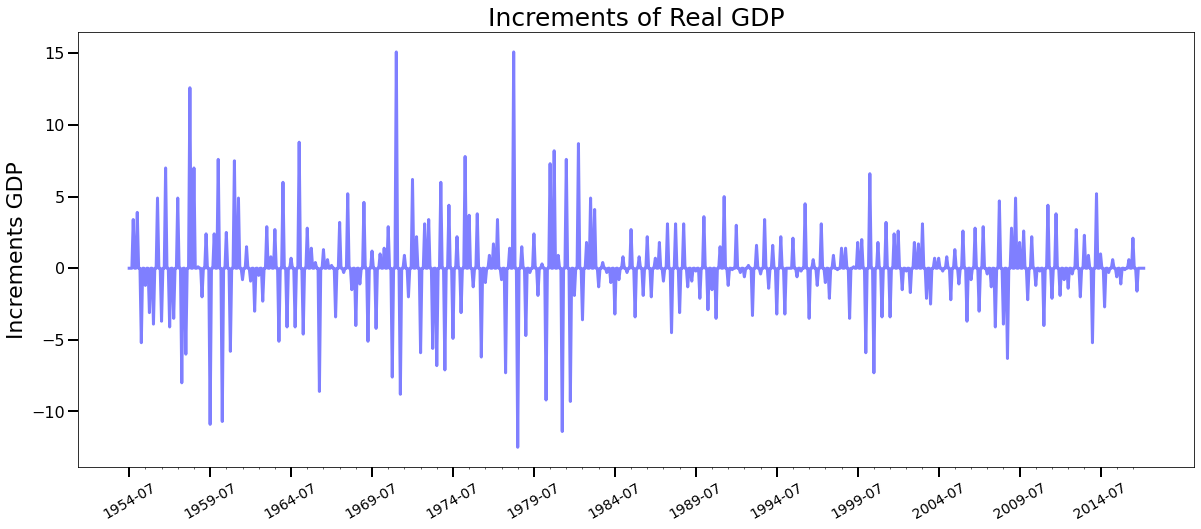

In [62]:
#Abgeleitete Daten

gdps_steigung = daten_ableiten(real_gdps_clean)

plot_a_graph(dates, gdps_steigung, "Increments of Real GDP", "Increments GDP", 60)

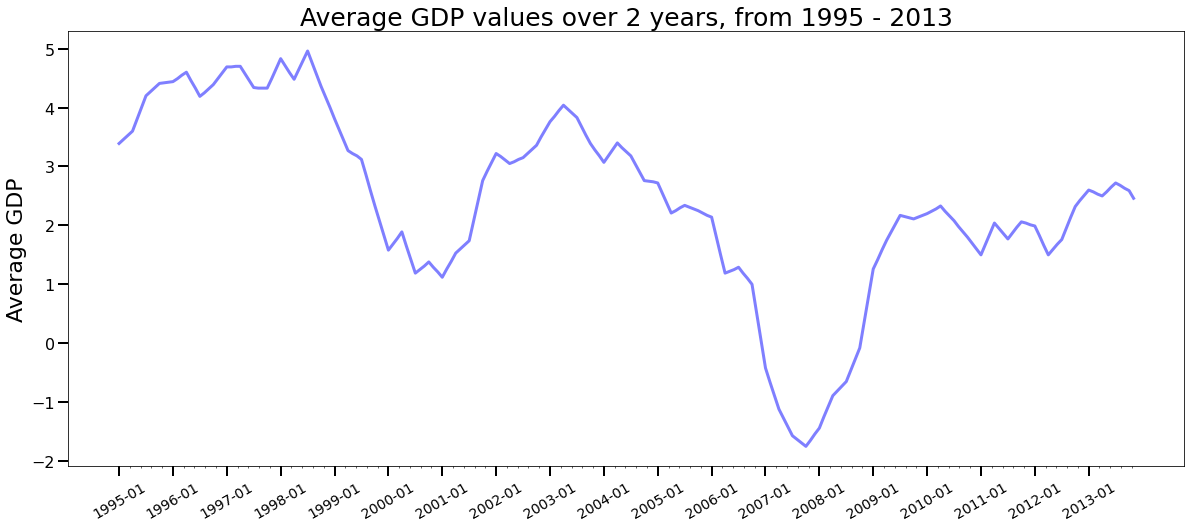

In [63]:
plot_a_graph_timeframe(dates, real_gdp_two_year_average, 1995, 2013, "Average GDP values over 2 years, from 1995 - 2013", "Average GDP", 12)

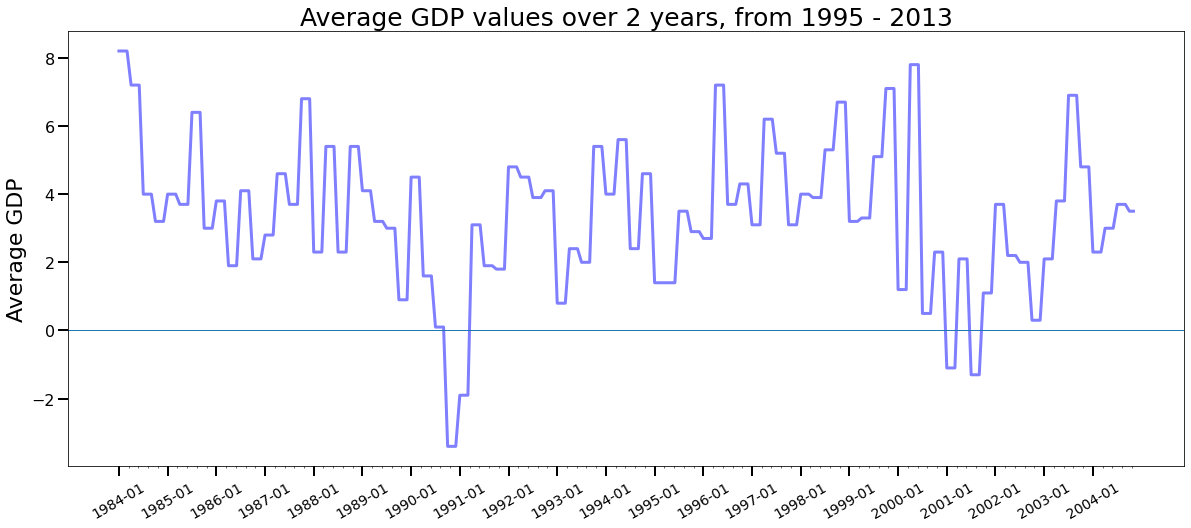

In [64]:
plot_a_graph_timeframe(dates, real_gdps_clean, 1984, 2004, "Average GDP values over 2 years, from 1995 - 2013", "Average GDP", 12, 0)

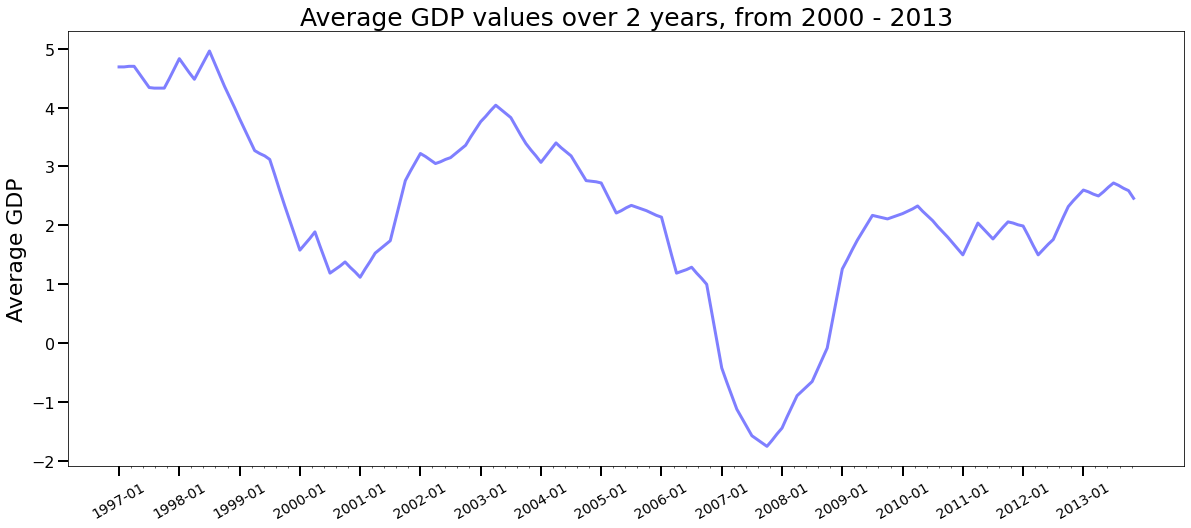

In [65]:
plot_a_graph_timeframe(dates, real_gdp_two_year_average, 1997, 2013, "Average GDP values over 2 years, from 2000 - 2013", "Average GDP", 12)

Unemployment_low = 3.4
Unemployment_high = 10.8

Die durchschnittliche Arbeitslosigkeit = 5.98


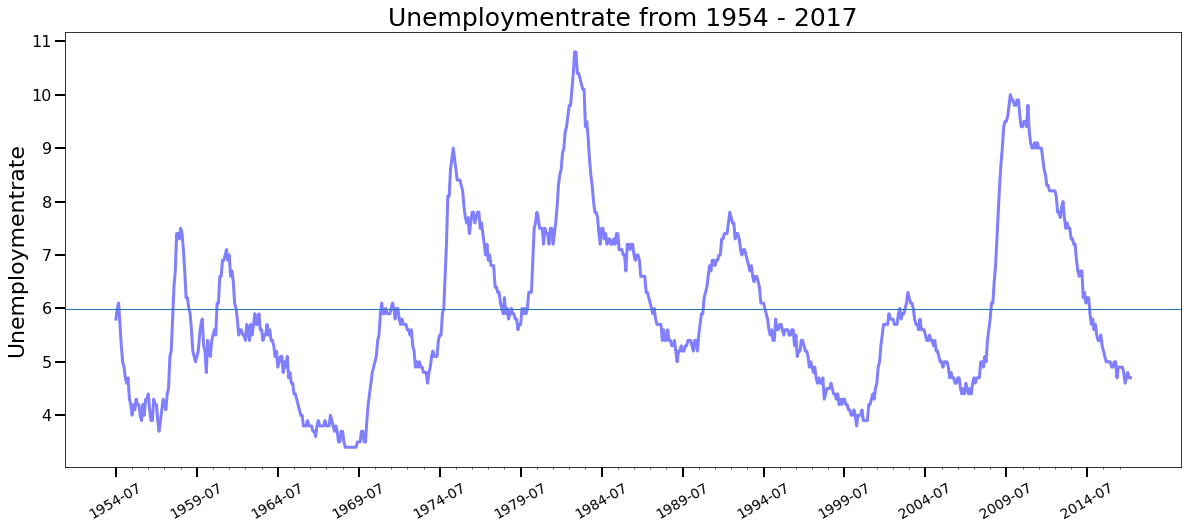

In [66]:
# Arbeitslosigkeit    

#print(unemployment_rates)

#cleaning up the data, replace missing entries with data from year before
unemployment_clean = clean_up_data(unemployment_rates)
#print(unemployment_clean)

#Arbeitslosigkeit 1Jahres Durchschnitt
unemployment_1year_average = average_per_timeframe(unemployment_clean, 12)
#print(unemployment_1year_average)
#print(len(unemployment_1year_average[::12]))

#Arbeitslosigkeit Tiefpunkt (wenig Arbeitslose)
unemployment_low = tiefpunkt(unemployment_clean)
print(f"Unemployment_low = {unemployment_low}")

#Arbeitslosigkeit Hochpunkt (viele Arbeitslose)
unemployment_high = hochpunkt(unemployment_clean)
print(f"Unemployment_high = {unemployment_high}")

#Arbeitslosigkeit Durchschnitt
unemployment_average = average_value(unemployment_clean)
print(f"\nDie durchschnittliche Arbeitslosigkeit = {round(unemployment_average, 2)}")

plot_a_graph(dates, unemployment_clean, "Unemploymentrate from 1954 - 2017", "Unemploymentrate", 60, unemployment_average)



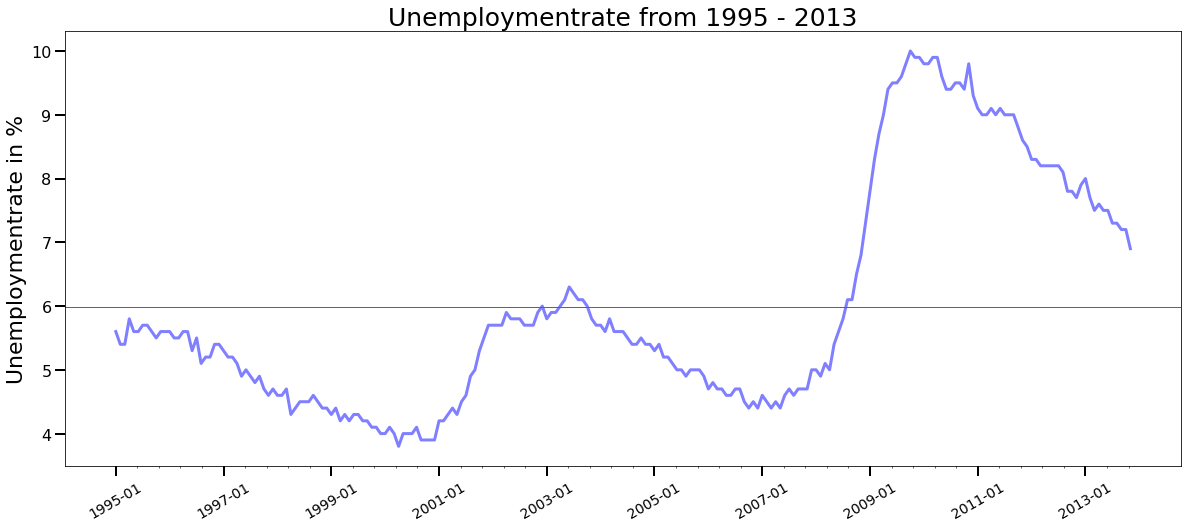

In [67]:
plot_a_graph_timeframe(dates, unemployment_clean, 1995, 2013, "Unemploymentrate from 1995 - 2013", "Unemploymentrate in %", 24, unemployment_average)

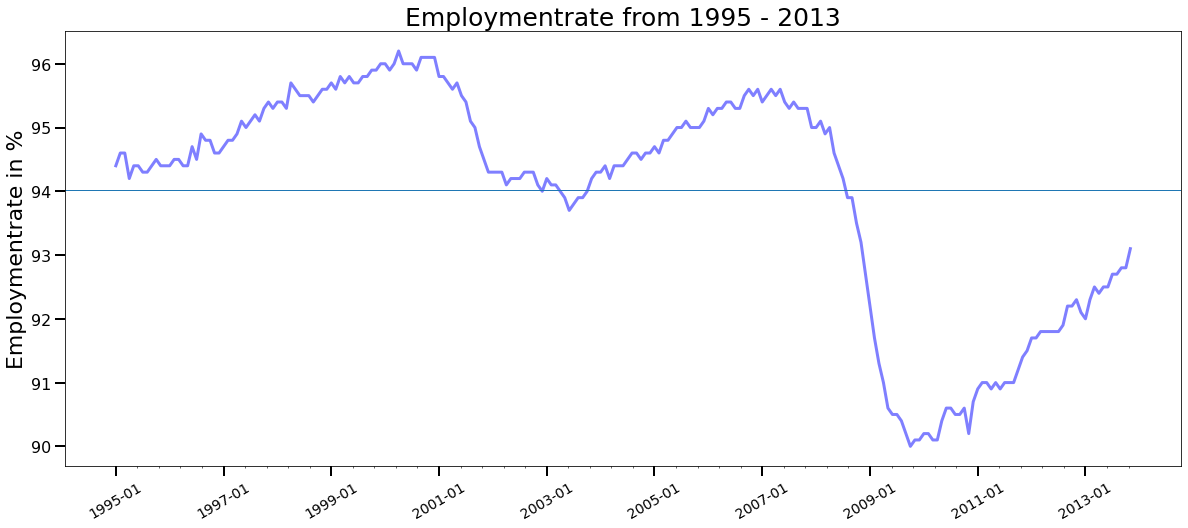

In [68]:
#calculate and show the employmentrate
unemployment_inverse = [100-value for value in unemployment_clean]
average_employment = 100-unemployment_average
plot_a_graph_timeframe(dates, unemployment_inverse, 1995, 2013, "Employmentrate from 1995 - 2013", "Employmentrate in %", 24, average_employment)

In [69]:
# Analyse Finanzcrash 2008

print("\nHochpunkt 2008 Krise:")
hochpunkt_2008_krise = hochpunkt(unemployment_clean[630-24:665+12+12+12])
print(hochpunkt_2008_krise)
print("\nTiefpunkt 2008 Krise:")
tiefpunkt_2008_krise = tiefpunkt(unemployment_clean[630-24:665+12+12+12])
print(tiefpunkt_2008_krise)

unemployment_difference = hochpunkt_2008_krise - tiefpunkt_2008_krise
print(f"\nDie Arbeitslosigkeit ist um {unemployment_difference} Prozent gestiegen.")

#plot_a_graph_timeframe(dates,unemployment_clean,2003, 2013, "Arbeitslosigkeit während der Finanzkrise 2008", "Arbeitslosenquote", 12)


Hochpunkt 2008 Krise:
10.0

Tiefpunkt 2008 Krise:
4.4

Die Arbeitslosigkeit ist um 5.6 Prozent gestiegen.


In [70]:
#Arbeitslosigkeit abgeleitet

arbeitslosigkeit_steigung = daten_ableiten(unemployment_clean)
#print(arbeitslosigkeit_steigung)

#plot_a_graph(dates, arbeitslosigkeit_steigung, "Steigung Arbeitslosenquote", "Arbeitslosenquote", 60)

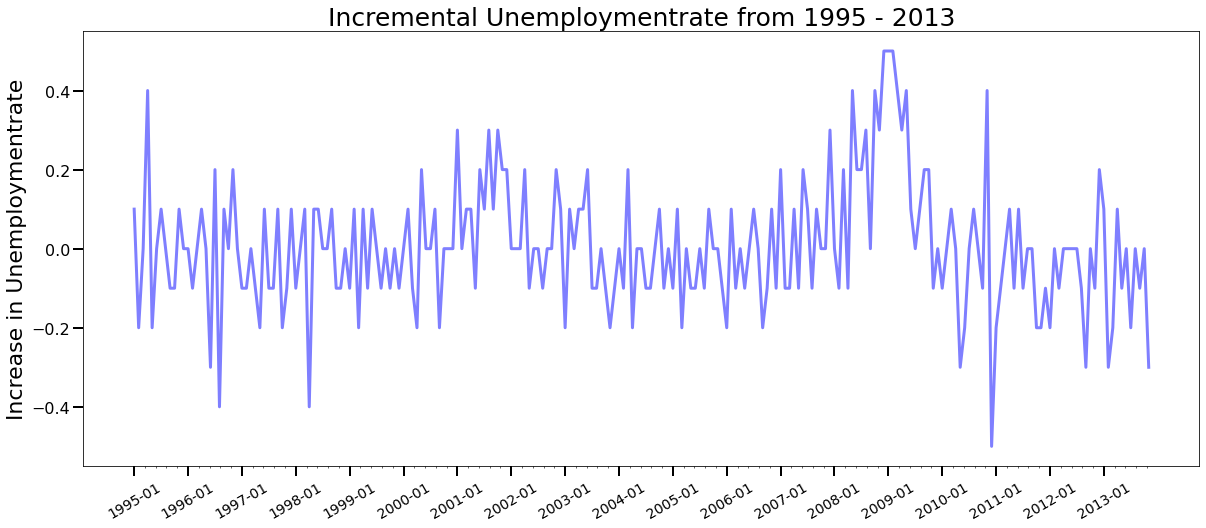

In [71]:
#Abgeleitete Arbeitslosenquote während der Finanzkrise 2008

plot_a_graph_timeframe(dates, arbeitslosigkeit_steigung, 1995, 2013, "Incremental Unemploymentrate from 1995 - 2013", "Increase in Unemploymentrate", 12)



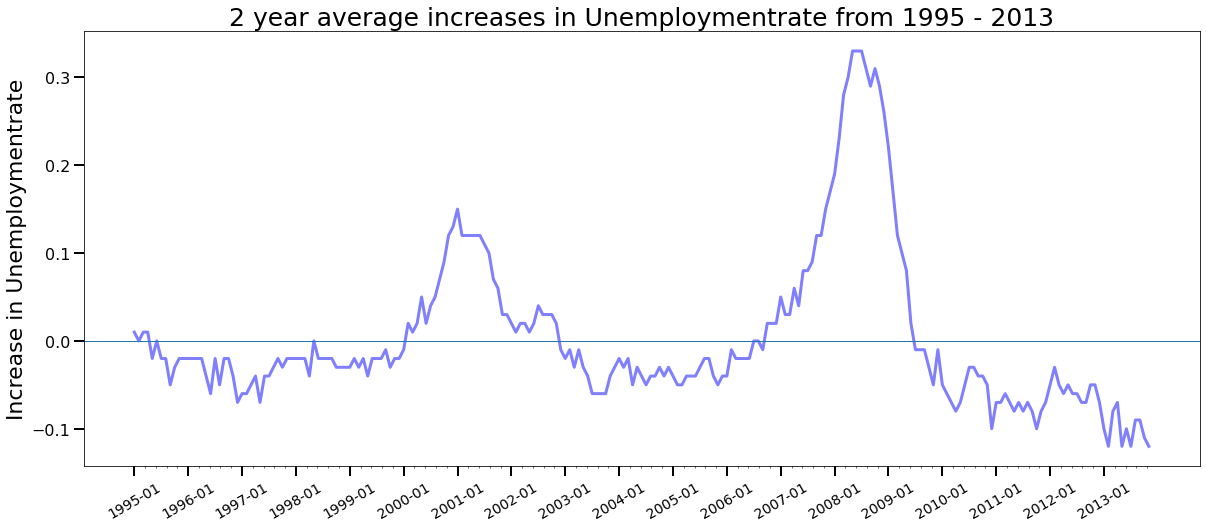

In [72]:
steigung_arbeitslosenquote_one_year_average = average_per_timeframe(arbeitslosigkeit_steigung, 12)

plot_a_graph_timeframe(dates, steigung_arbeitslosenquote_one_year_average, 1995, 2013, "2 year average increases in Unemploymentrate from 1995 - 2013", "Increase in Unemploymentrate", 12, 0)
print("")

In [73]:
        # Zinssätze
        
        
interest_rates_clean = clean_up_data(effective_fed_rates)
        
#Hochpunkt  
hochpunkt_zinssatz = hochpunkt(interest_rates_clean)
hochpunkt_zinssatz_date = convert_value_from_data_set_to_date(interest_rates_clean, hochpunkt_zinssatz)
print(f"Hochpunkt Zinssatz: {hochpunkt_zinssatz}%, am {hochpunkt_zinssatz_date}")

#Tiefpunkt
tiefpunkt_zinssatz = tiefpunkt(interest_rates_clean)
tiefpunkt_zinssatz_date = convert_value_from_data_set_to_date(interest_rates_clean, tiefpunkt_zinssatz)
print(f"Tiefpunkt Zinssatz: {tiefpunkt_zinssatz}%, am {tiefpunkt_zinssatz_date}")

#Durchschnitt
zinssatz_durchschnitt = average_value(interest_rates_clean)
print(f"Der durchschnittliche Zinssatz: {zinssatz_durchschnitt}%")


#Jahresdurchschnitte
one_year_interest_rate_avrg = average_per_timeframe(interest_rates_clean, 12)
three_year_interest_rate_avrg = average_per_timeframe(interest_rates_clean, 12*3)
five_year_interest_rate_avrg = average_per_timeframe(interest_rates_clean, 12*5)



Hochpunkt Zinssatz: 19.1%, am 1981-06
Tiefpunkt Zinssatz: 0.07%, am 2011-07
Der durchschnittliche Zinssatz: 4.91%


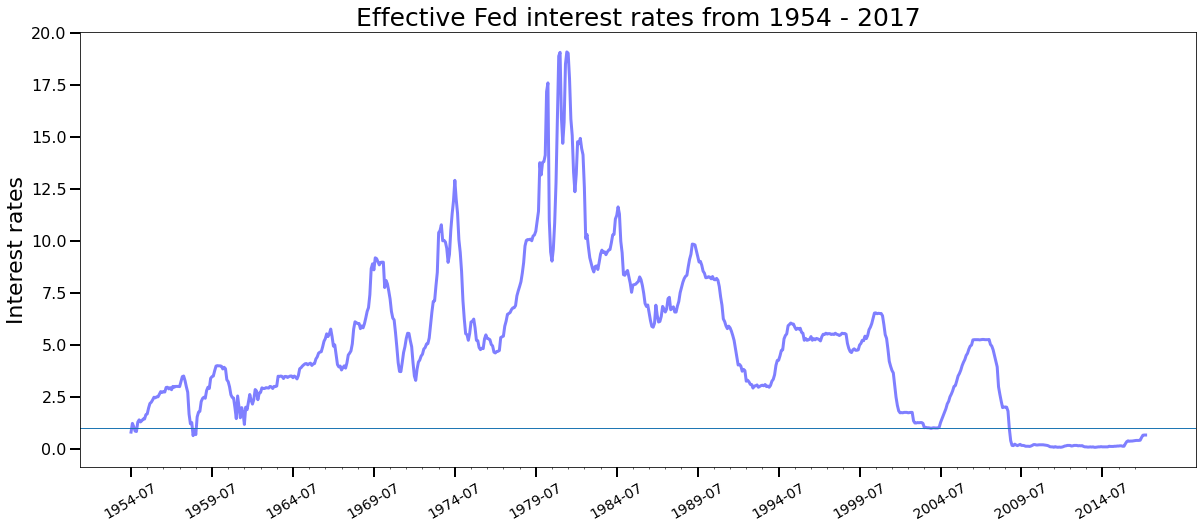

In [74]:
plot_a_graph(dates, interest_rates_clean, "Effective Fed interest rates from 1954 - 2017", "Interest rates", 60, 1)

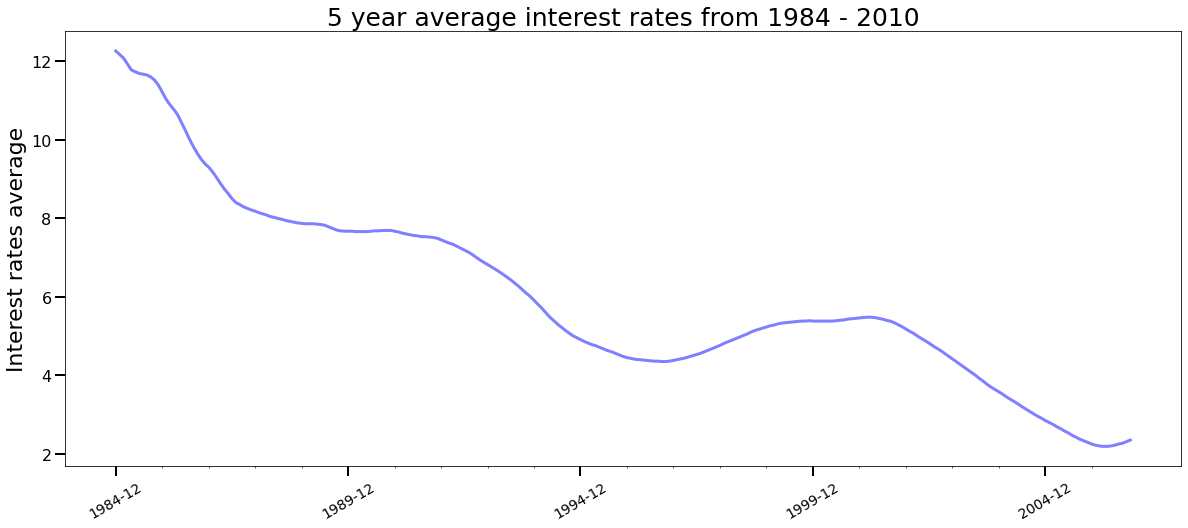

In [75]:
plot_a_graph_timeframe(dates[12*5-1:], five_year_interest_rate_avrg, 1980, 2001, "5 year average interest rates from 1984 - 2010", "Interest rates average", 60)

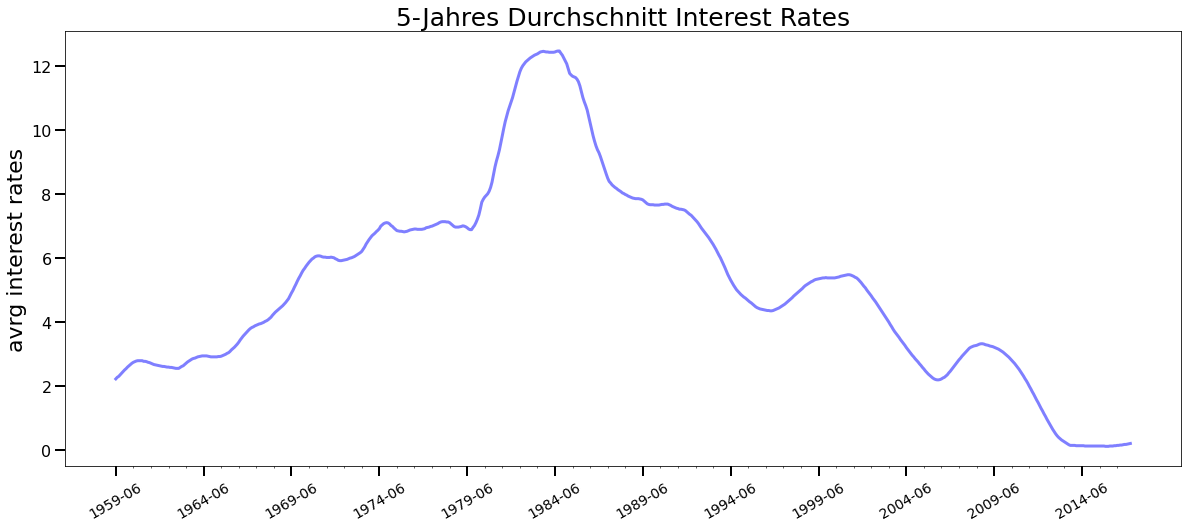

In [76]:
plot_a_graph(dates[59:], five_year_interest_rate_avrg, "5-Jahres Durchschnitt Interest Rates", "avrg interest rates", 60)

Das Datum an dem der Zinssatz am höchsten war: 2007-02

Konstanter Anstieg der Zinsen, nach Crash -> starkes Absenken des Zinssatzes.


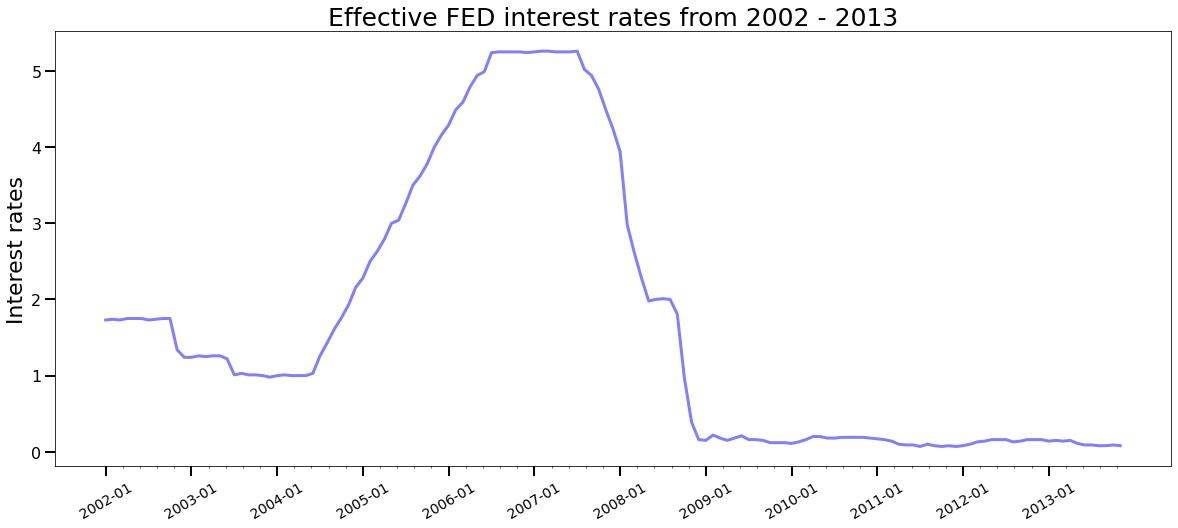

In [77]:
#Zinssatz um 2008 (von 2003 bis 2013)

index_2003 = what_time_is_it(2003)
index_2013 = what_time_is_it(2013)



index_2003 = what_time_is_it(2003)[0]
index_2013 = what_time_is_it(2013)[11]

hochpunkt_zinsen = hochpunkt(interest_rates_clean[index_2003:index_2013])
zins_hochpunkt_index = interest_rates_clean.index(hochpunkt_zinsen)
print(f"Das Datum an dem der Zinssatz am höchsten war: {dates[zins_hochpunkt_index]}")
print()

print("Konstanter Anstieg der Zinsen, nach Crash -> starkes Absenken des Zinssatzes.")


plot_a_graph_timeframe(dates, interest_rates_clean, 2002, 2013, "Effective FED interest rates from 2002 - 2013", "Interest rates", 12)

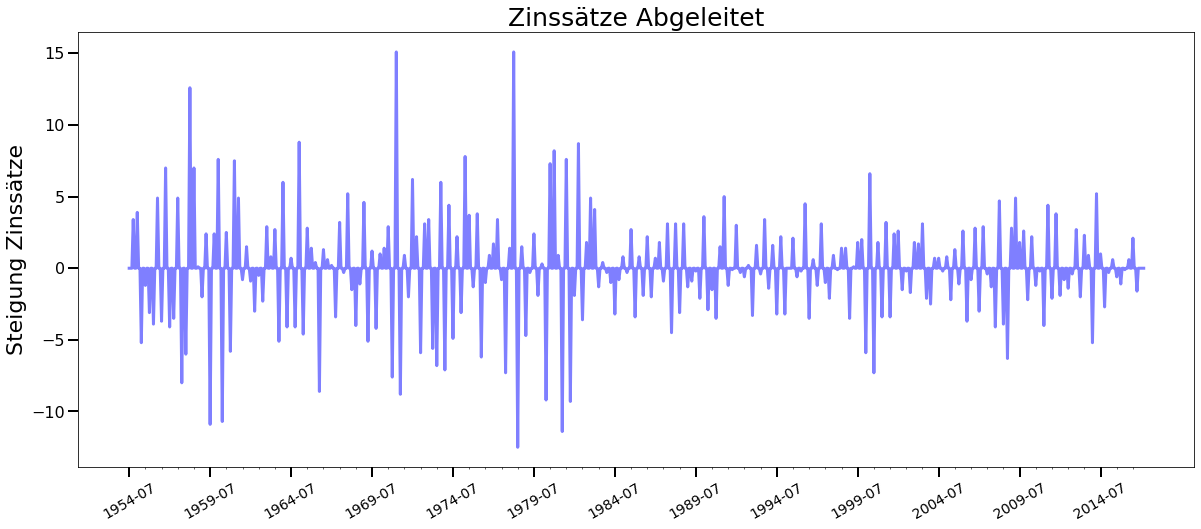

In [78]:
#Abgeleitete Daten

zinssätze_abgeleitet = daten_ableiten(real_gdps_clean)

plot_a_graph(dates, zinssätze_abgeleitet, "Zinssätze Abgeleitet", "Steigung Zinssätze", 60)

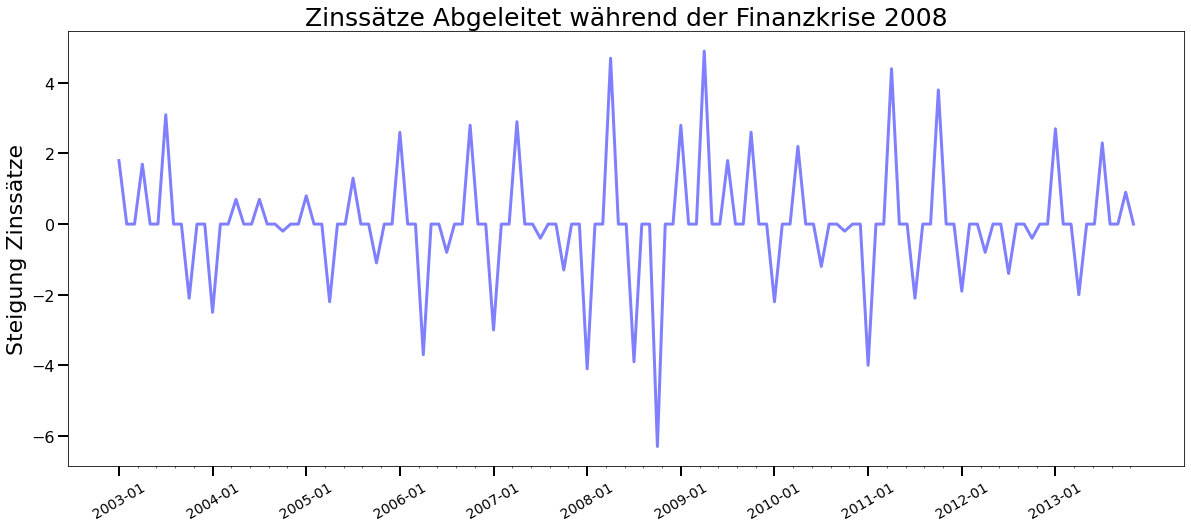

In [79]:
#Abgeleitete Daten während der Finanzkrise 2008

plot_a_graph_timeframe(dates, zinssätze_abgeleitet, 2003, 2013, "Zinssätze Abgeleitet während der Finanzkrise 2008", "Steigung Zinssätze", 12)

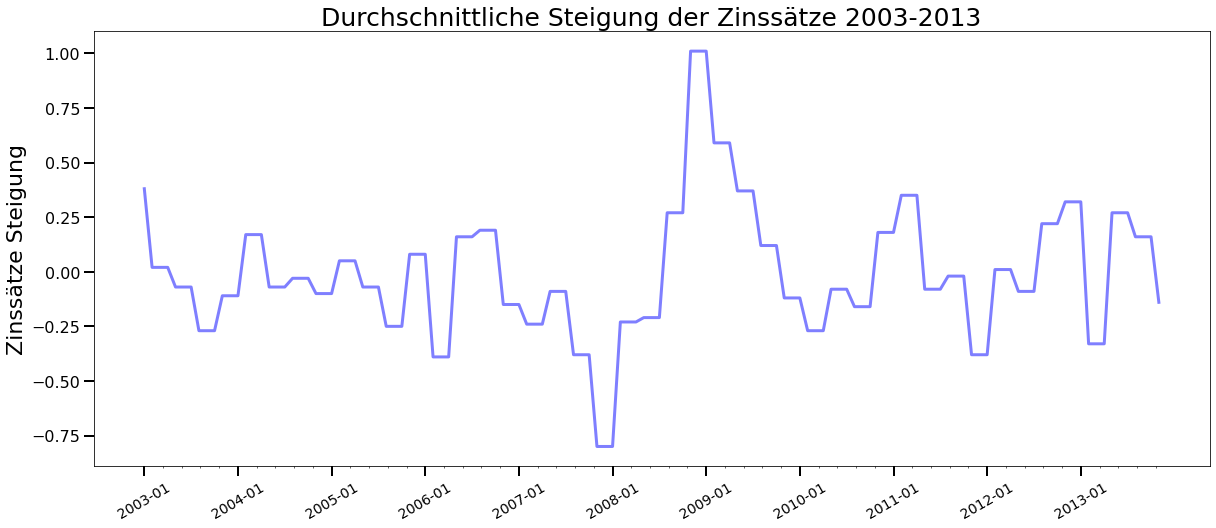

In [80]:
zinssätze_one_year_average_steigung = average_per_timeframe(zinssätze_abgeleitet, 12)

plot_a_graph_timeframe(dates, zinssätze_one_year_average_steigung, 2003, 2013, "Durchschnittliche Steigung der Zinssätze 2003-2013", "Zinssätze Steigung", 12)
print("")



M2 Money Supply
['realtime_start', 'realtime_end', 'date', 'value']
max drawdown:
0.10220480156785883
1981-09-01


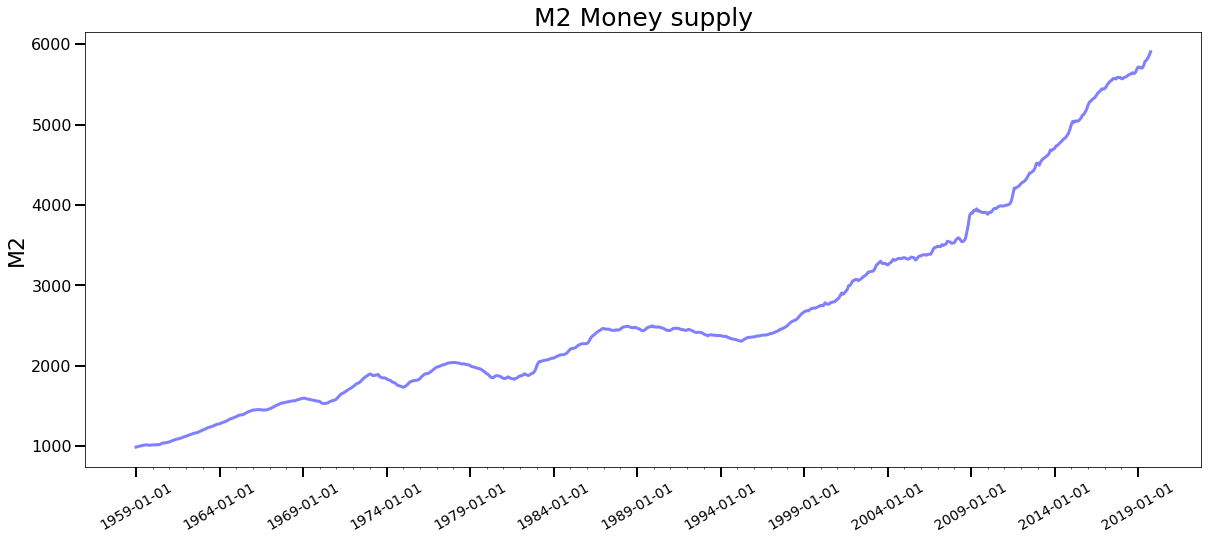

In [81]:
# M2 Money Supply
print("\n\nM2 Money Supply")
    
filename = '../input/real-m2-money-stock/M2REAL.csv'
m2_money_supply_list, m2_dates = [], []

with open(filename) as f:
	reader = csv.reader(f)
	header_row = next(reader)
	print(header_row)
    
	for row in reader:
		m2_money_supply = row[3]
		m2_money_supply_list.append(m2_money_supply)
		date = row[2]
		m2_dates.append(date)
        


#print(m2_money_supply_list)

m2_money_supply_list_float = [float(x) for x in m2_money_supply_list]
#print(m2_money_supply_list_float)





#maximaler abstieg
max_value = m2_money_supply_list_float[0]
max_drawdown = 0
for i in m2_money_supply_list_float:
    if i > max_value:
        max_value = i
    if i < max_value:
        drawdown = 1 - (i / max_value)
        if drawdown > max_drawdown:
            max_drawdown = drawdown
            #print(max_drawdown)
            #print(i)
            

#print(max_value)
print("max drawdown:")
print(max_drawdown)
index_mdw = m2_money_supply_list_float.index(1832.4)
print(m2_dates[index_mdw])


plot_a_graph(m2_dates, m2_money_supply_list_float, "M2 Money supply", "M2", 60)

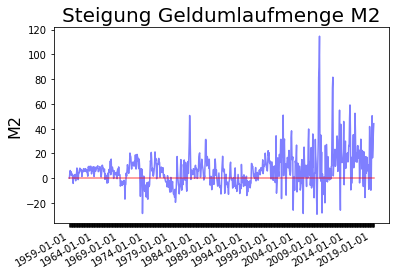

Durchschnittliche Steigung: 6.74


In [82]:
#Steigung M2


m2_abgeleitet = daten_ableiten(m2_money_supply_list_float)

zero = [0 for x in range(len(m2_dates))]
plot_a_graph_multiple(m2_dates, m2_abgeleitet, zero, "Steigung Geldumlaufmenge M2", "M2", 60)

avrg_m2_incr = average_value(m2_abgeleitet)
print(f"Durchschnittliche Steigung: {avrg_m2_incr}")

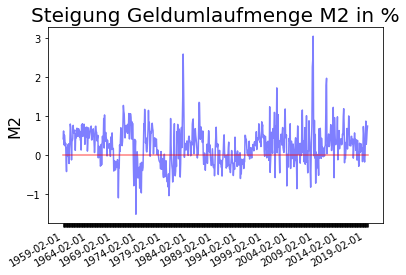

Durchschnittliche Steigung: 0.25%
Werte zwischen 0% und 1% = 66.12%
Positive Werte: 512
Negative Werte: 214
Anzahl positiver Werte: = 70.52%


In [83]:
steigung_m2_in_prozent = []
wert_zuvor = 0

for wert in m2_money_supply_list_float:
    if wert_zuvor != 0:
        steigung = ( (wert / wert_zuvor) - 1) * 100
        steigung_m2_in_prozent.append(steigung)
    wert_zuvor = wert
    
m2_stg_avrg = average_value(steigung_m2_in_prozent)
    
plot_a_graph_multiple(m2_dates[1:], steigung_m2_in_prozent, zero[1:], "Steigung Geldumlaufmenge M2 in %", "M2", 60)

print(f"Durchschnittliche Steigung: {round(m2_stg_avrg, 3)}%")

null_bis_eins = 0
for wert in steigung_m2_in_prozent:
    if wert > 0 and wert < 1:
        null_bis_eins += 1
        
#print(null_bis_eins)
#print(len(steigung_m2_in_prozent))

przt_zw_null_eins = round ( ( null_bis_eins / len(steigung_m2_in_prozent) )* 100 , 2)
print(f"Werte zwischen 0% und 1% = {przt_zw_null_eins}%")

positiv, negativ = 0, 0
for i in m2_abgeleitet:
    if i > 0:
        positiv += 1
    elif i < 0:
        negativ += 1
print(f"Positive Werte: {positiv}")
print(f"Negative Werte: {negativ}")

gesamt = positiv + negativ
positiv_prozent = (512 / gesamt) * 100

print(f"Anzahl positiver Werte: = {round(positiv_prozent, 2)}%")

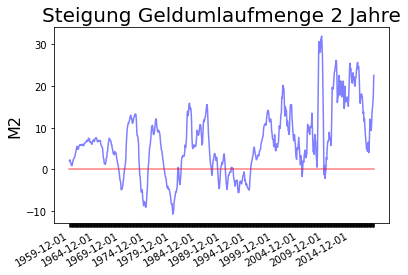

In [84]:
m2_steigung_durchschnitt_2yrs = average_per_timeframe(m2_abgeleitet,12)


plot_a_graph_multiple(m2_dates[11:], m2_steigung_durchschnitt_2yrs, zero[11:], "Steigung Geldumlaufmenge 2 Jahre", "M2", 60)

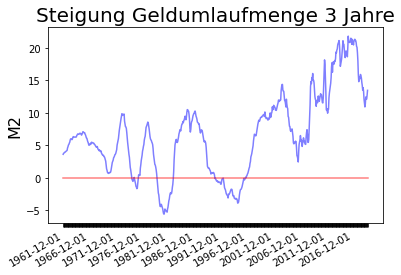

In [85]:
m2_steigung_durchschnitt_2yrs = average_per_timeframe(m2_abgeleitet,36)


plot_a_graph_multiple(m2_dates[35:], m2_steigung_durchschnitt_2yrs, zero[35:], "Steigung Geldumlaufmenge 3 Jahre", "M2", 60)

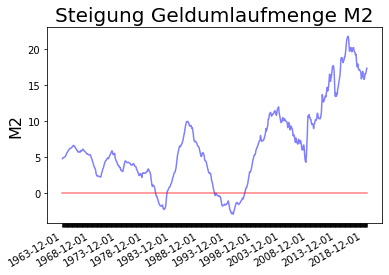

In [86]:
m2_steigung_durchschnitt_2yrs = average_per_timeframe(m2_abgeleitet,60)


plot_a_graph_multiple(m2_dates[59:], m2_steigung_durchschnitt_2yrs, zero[59:], "Steigung Geldumlaufmenge M2", "M2", 60)

2003-01
2012-11


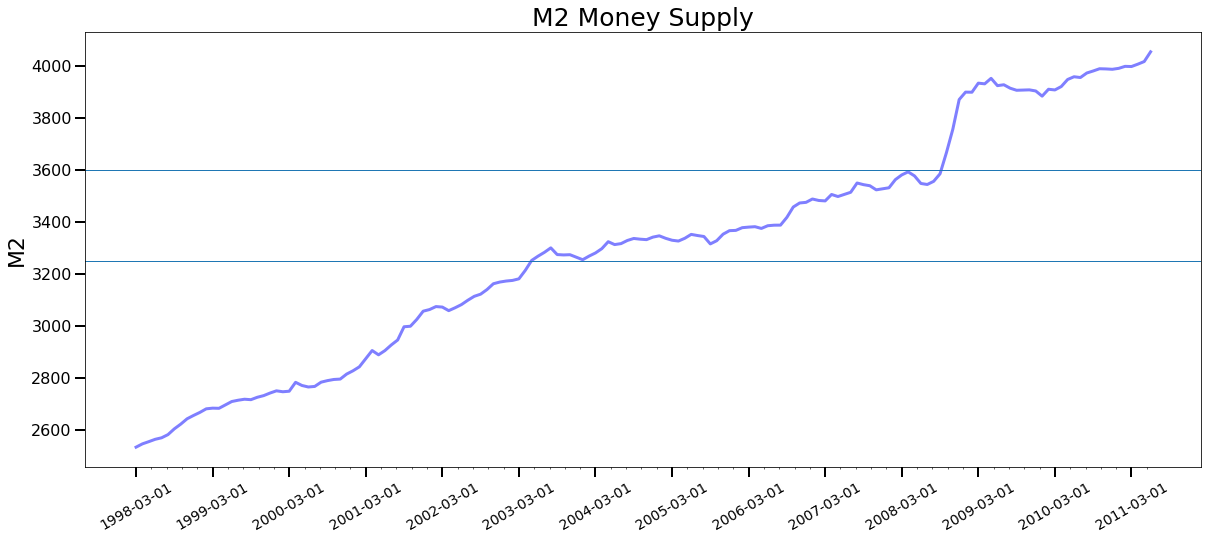

In [87]:
print(dates[582])
print(dates[700])
avrg_m2 = [avrg_m2_incr for i in range(0, len(dates))]
#plot_a_graph_multiple(m2_dates[582:700], m2_money_supply_list_float[582:700], avrg_m2[582:700], "Geldumlaufmenge um 2008", "M2", 36)
#plot_a_graph_timeframe(m2_dates, m2_money_supply_list_float, 1995, 2007, "M2 Money supply from ", "M2", 12)


index_start = 470
index_end = 630
title = "M2 Money Supply"
x_label = ""
y_label = "M2"
ticks = 12
x_values = m2_dates
y_values = m2_money_supply_list_float

plt.figure(figsize=(20,8))
ax = plt.gca()
ax.plot(x_values[index_start:index_end], y_values[index_start:index_end], c='blue', alpha=0.5, linewidth=3.0)
#Format plot
ax.set_title(title, fontsize=14)
ax.set_xlabel(x_label ,fontsize=10)
ax.set_ylabel(y_label, fontsize=10)
ax = plt.gca()
if(ticks != 1):
    tick_list = []
    for i in range(len(x_values[index_start:index_end])-1):
        if(i%ticks == 0):
            tick_list.append(i)

    ax.set_xticks(tick_list, rotation = 45)
    ax.tick_params(direction='out', length=10, width=2)
    minor_ticks = np.arange(0, len(m2_dates[index_start:index_end]), (ticks/5))
    ax.set_xticks(minor_ticks, minor=True)
for tick in ax.get_xticklabels():
    tick.set_rotation(30)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 16)
plt.title(title, fontsize = 25)
ax.set_xlabel(x_label, fontsize=22)
ax.set_ylabel(y_label, fontsize=22)

plt.axhline(y=3250, xmin=0, xmax=10000, linewidth=1.0)
plt.axhline(y=3600, xmin=0, xmax=10000, linewidth=1.0)
#plt.axhline(y=0, xmin=550, xmax=10000, linewidth=1.0)
plt.show()


########################################################################

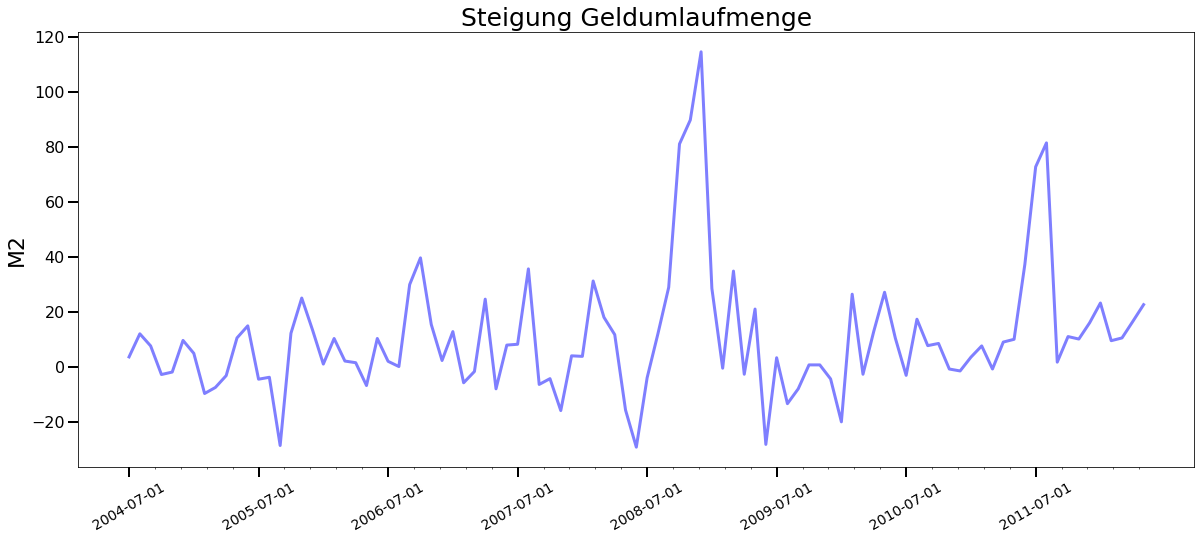

In [88]:
plot_a_graph_timeframe(m2_dates, m2_abgeleitet, 2000, 2007, "Steigung Geldumlaufmenge", "M2", 12)

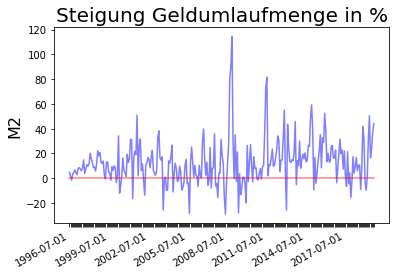

In [89]:
plot_a_graph_multiple(m2_dates[450:], m2_abgeleitet[450:], zero[450:], "Steigung Geldumlaufmenge in %", "M2", 36)

In [90]:
positiv, negativ = 0, 0
for i in m2_abgeleitet:
    if i > 0:
        positiv += 1
    elif i < 0:
        negativ += 1
print(f"Positive Werte: {positiv}")
print(f"Negative Werte: {negativ}")

gesamt = positiv + negativ
positiv_prozent = 512 / gesamt

print(f"Anzahl positiver Werte: = {round(positiv_prozent, 2)}%")

Positive Werte: 512
Negative Werte: 214
Anzahl positiver Werte: = 0.71%



Inflationsrate
Ab Index 42 beginnen die Werte
1958-01

Durchschnittliche Inflationsrate: 3.73

Die niedrigste Inflationsrate beträgt: 0.6
2010-10

Die höchste Inflationsrate beträgt: 13.6
1980-06


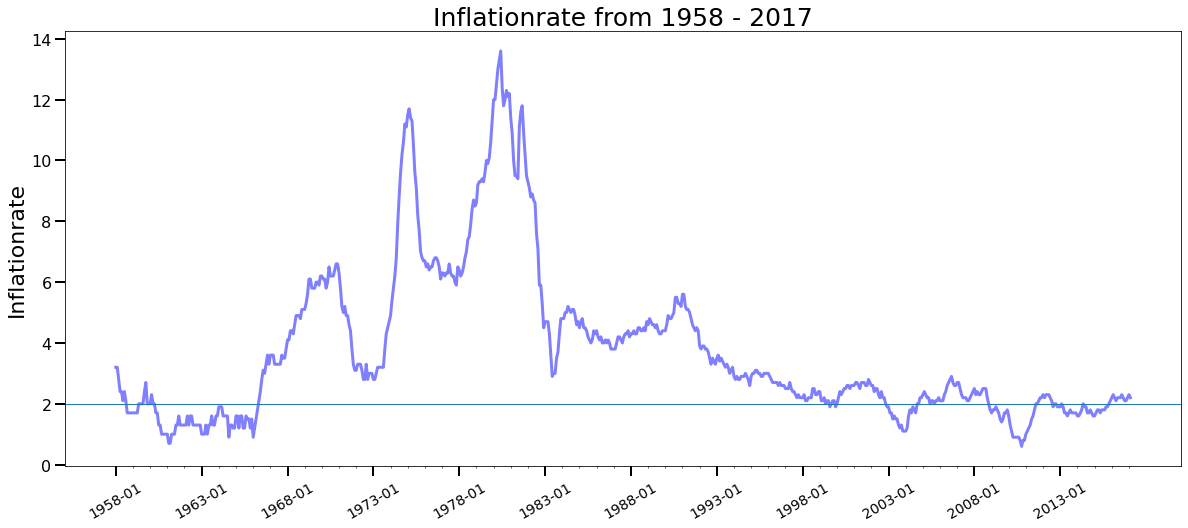

In [91]:
#Inflation
print("\nInflationsrate")

#convert string to float
inflation_rates_float = []
for value in inflation_rates:
    if value != '':
        inflation_rates_float.append(float(value))
    else:
        inflation_rates_float.append(value)


for i in range(len(inflation_rates_float)):
    if inflation_rates_float[i] != '':
        print(f"Ab Index {i} beginnen die Werte")
        start_inflation_data = convert_index_to_date(42)
        print(start_inflation_data)
        break


average_inflation = average_value(inflation_rates_float[42:])
print(f"\nDurchschnittliche Inflationsrate: {average_inflation}")

min_inflation = tiefpunkt(inflation_rates_float[42:-1])
print(f"\nDie niedrigste Inflationsrate beträgt: {min_inflation}")
min_inflation_year_index = inflation_rates_float.index(0.6)
min_inflation_year = convert_index_to_date(min_inflation_year_index)
print(min_inflation_year)

max_inflation = hochpunkt(inflation_rates_float[42:-1])
print(f"\nDie höchste Inflationsrate beträgt: {max_inflation}")
max_inflation_year_index = inflation_rates_float.index(13.6)
max_inflation_year = convert_index_to_date(max_inflation_year_index)
print(max_inflation_year)


plot_a_graph(dates[42:-1], inflation_rates_float[42:-1], "Inflationrate from 1958 - 2017", "Inflationrate", 60, 2)



#print(inflation_rates_float[42:])

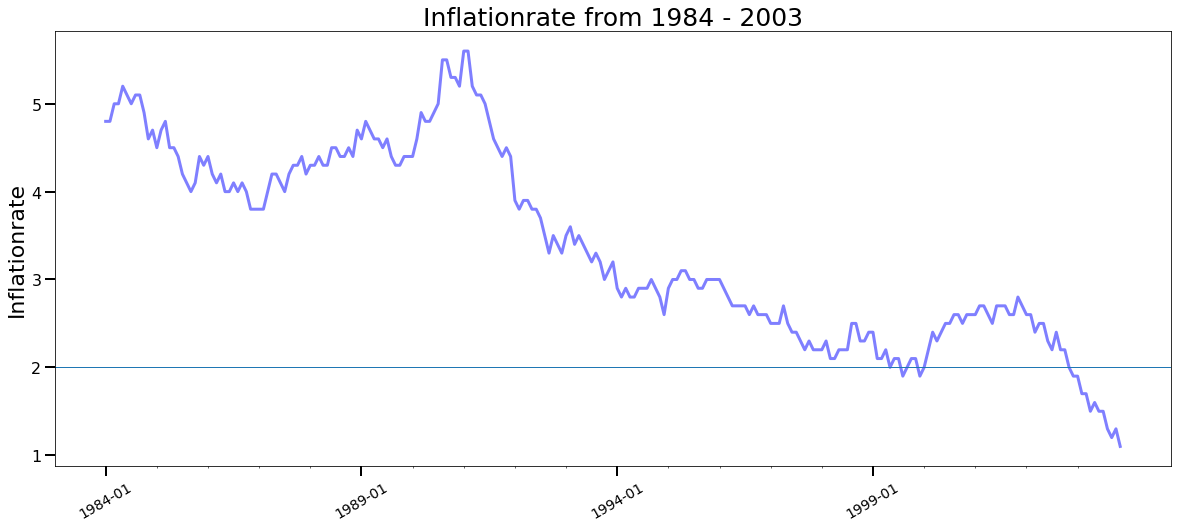

In [92]:
plot_a_graph_timeframe(dates[:-1], inflation_rates_float[:-1], 1984, 2003, "Inflationrate from 1984 - 2003", "Inflationrate", 60, 2)

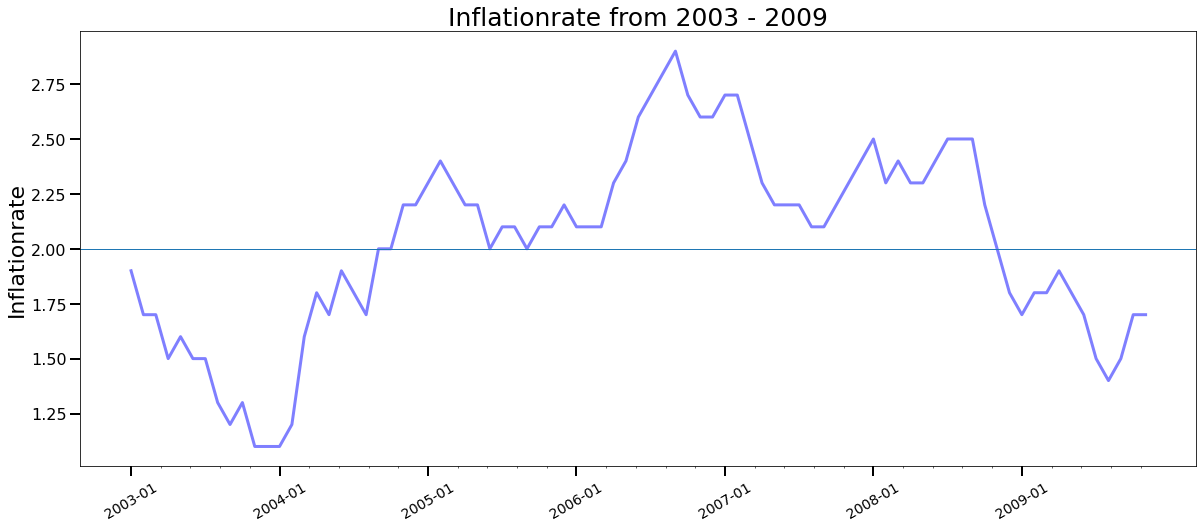

In [93]:
plot_a_graph_timeframe(dates, inflation_rates_float, 2003, 2009, "Inflationrate from 2003 - 2009", "Inflationrate", 12, 2)

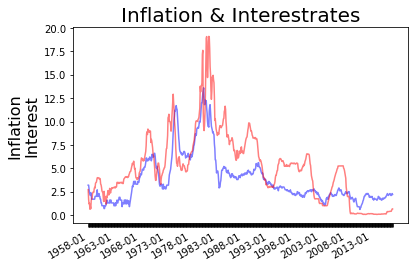

In [94]:
#plot_a_graph_multiple(x_values, y_values_1, y_values_2 title, y_label, set_n,x_label=''):
    
plot_a_graph_multiple(dates[42:-1], inflation_rates_float[42:-1], interest_rates_clean[42:-1], "Inflation & Interestrates", "Inflation\nInterest", 60)

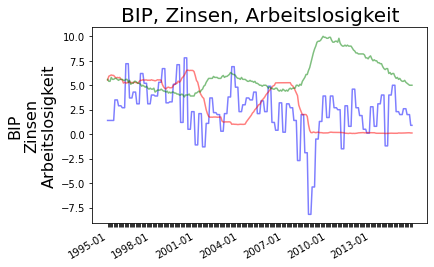

In [95]:
#plot_a_graph_3_timeframe(x_values, y_values_1, y_values_2, y_values_3, start_year, end_year, title, y_label, set_n, x_label=''):
    

plot_a_graph_3_timeframe(dates, real_gdps_clean, interest_rates_clean, unemployment_clean, 1995, 2015, "BIP, Zinsen, Arbeitslosigkeit", "BIP\nZinsen\nArbeitslosigkeit", 36)

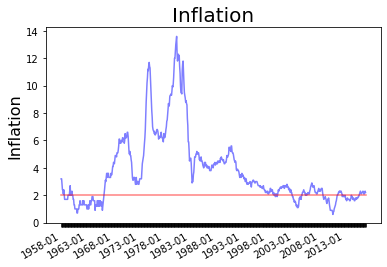

In [96]:
two = [2 for x in range(len(dates[42:-1]))]
plot_a_graph_multiple(dates[42:-1], inflation_rates_float[42:-1], two, "Inflation", "Inflation", 60)

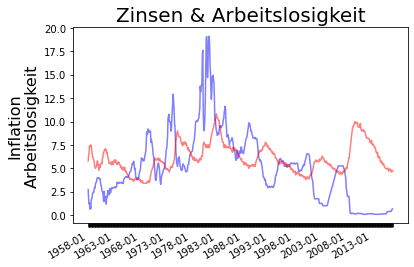

In [97]:
plot_a_graph_multiple(dates[42:-1], interest_rates_clean[42:-1], unemployment_clean[42:-1], "Zinsen & Arbeitslosigkeit", "Inflation\nArbeitslosigkeit", 60)